In [1]:
import numpy as np
import timeit
import viscid
import os
from scipy.special import iv

argsdict=viscid.argsdict
import importlib as imp
from scipy.linalg import eig
from scipy.interpolate import interp1d
from scipy.optimize import minimize_scalar

import matplotlib.pyplot as plt
import json
colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]

argsdict['dim']=2
argsdict['Nx']=3
argsdict['Ny']=3
argsdict['Nt']=3
argsdict['k1x']=np.pi*0.1
argsdict['k1y']=0
argsdict['k2x']=-np.pi*0.05
argsdict['k2y']=3**0.5*0.05*np.pi
argsdict['h0']=1.0
argsdict['As']=0.8
num=50

kxs1=np.arange(1,num+1)/num*argsdict['k1x']/2
kys1=np.arange(1,num+1)/num*0
kxs2=argsdict['k1x']/2+np.arange(1,num+1)/num*((2*argsdict['k1x'] + argsdict['k2x'])/3 - argsdict['k1x']/2)
kys2=argsdict['k1y']/2+np.arange(1,num+1)/num*((2*argsdict['k1y'] + argsdict['k2y'])/3 - argsdict['k1y']/2)
kxs3=np.arange(1,num)/num*((2*argsdict['k1x'] + argsdict['k2x'])/3)
kys3=np.arange(1,num)/num*((2*argsdict['k1y'] + argsdict['k2y'])/3)
ks=np.concatenate([np.transpose([kxs1[-4:],kys1[-4:]]),np.transpose([kxs2[::4],kys2[::4]])])


### Dispersion relations and band gap for the inviscid problem

In [2]:
argsdict['rho']=1.0
argsdict['sigma']=72

imp.reload(viscid)
start=timeit.default_timer()

argsdict['As']=0.0
evalssweep1=[]
revecssweep1=[]
levecssweep1=[]
for i in range(num):
    argsdict['kx']=kxs1[i]
    argsdict['ky']=kys1[i]
    F,G=viscid.inviscid_mat_undriven(argsdict)
    evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
    evalssweep1=evalssweep1+[evals]
    revecssweep1=revecssweep1+[revecs]
    levecssweep1=levecssweep1+[levecs]
stop=timeit.default_timer()
print(stop-start)

start=timeit.default_timer()
evalssweep2=[]
revecssweep2=[]
levecssweep2=[]
for i in range(num-1):
    argsdict['kx']=kxs2[i]
    argsdict['ky']=kys2[i]
    F,G=viscid.inviscid_mat_undriven(argsdict)
    evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
    evalssweep2=evalssweep2+[evals]
    revecssweep2=revecssweep2+[revecs]
    levecssweep2=levecssweep2+[levecs]
    
stop=timeit.default_timer()
print(stop-start)

start=timeit.default_timer()
evalssweep3=[]
revecssweep3=[]
levecssweep3=[]
for i in range(num-1):
    argsdict['kx']=kxs3[i]
    argsdict['ky']=kys3[i]
    F,G=viscid.inviscid_mat_undriven(argsdict)
    evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
    evalssweep3=evalssweep3+[evals]
    revecssweep3=revecssweep3+[revecs]
    levecssweep3=levecssweep3+[levecs]

stop=timeit.default_timer()
print(stop-start)

vals1=np.sort(np.real((np.array(evalssweep1))**0.5/(2*np.pi)),axis=1)
vals2=np.sort(np.real((np.array(evalssweep2))**0.5/(2*np.pi)),axis=1)
vals3=np.flip(np.sort(np.real((np.array(evalssweep3))**0.5/(2*np.pi)),axis=1),axis=0)

argsdict['As']=0.8
evalssweep12=[]
revecssweep12=[]
levecssweep12=[]
for i in range(len(kxs1)):
    argsdict['kx']=kxs1[i]
    argsdict['ky']=kys1[i]
    F,G=viscid.inviscid_mat_undriven(argsdict)
    evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
    evalssweep12=evalssweep12+[evals]
    revecssweep12=revecssweep12+[revecs]
    levecssweep12=levecssweep12+[np.conjugate(levecs)]
    
stop=timeit.default_timer()
print(stop-start)

start=timeit.default_timer()
evalssweep22=[]
revecssweep22=[]
levecssweep22=[]
for i in range(len(kxs2)):
    argsdict['kx']=kxs2[i]
    argsdict['ky']=kys2[i]
    F,G=viscid.inviscid_mat_undriven(argsdict)    
    evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
    evalssweep22=evalssweep22+[evals]
    revecssweep22=revecssweep22+[revecs]
    levecssweep22=levecssweep22+[np.conjugate(levecs)]
    
stop=timeit.default_timer()
print(stop-start)

start=timeit.default_timer()
evalssweep32=[]
revecssweep32=[]
levecssweep32=[]
for i in range(len(kxs3)):
    argsdict['kx']=kxs3[i]
    argsdict['ky']=kys3[i]
    F,G=viscid.inviscid_mat_undriven(argsdict)    
    evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
    evalssweep32=evalssweep32+[evals]
    revecssweep32=revecssweep32+[revecs]
    levecssweep32=levecssweep32+[np.conjugate(levecs)]

stop=timeit.default_timer()
print(stop-start)

vals12=np.sort(np.real((np.array(evalssweep12))**0.5/(2*np.pi)),axis=1)
vals22=np.sort(np.real((np.array(evalssweep22))**0.5/(2*np.pi)),axis=1)
vals32=np.flip(np.sort(np.real((np.array(evalssweep32))**0.5/(2*np.pi)),axis=1),axis=0)


0.09295937800197862
0.08939488799660467
0.08642459899419919
0.43583750299876556
0.3503889960120432
0.34654071199474856


1.790898713446387 1.5602729307919136
[1.56027293 1.56027293]
1.582091321209743 1.6372261930927898
[1.32169416 1.63722619]


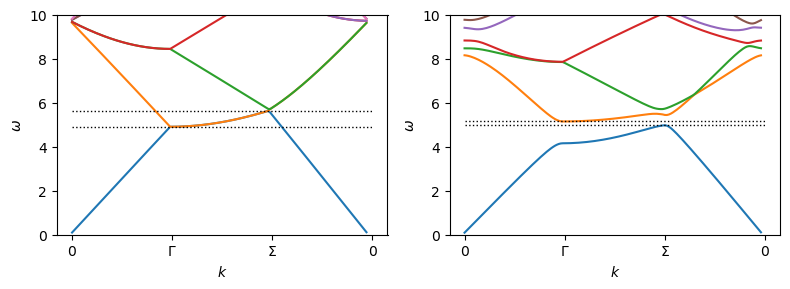

In [3]:
plt.subplots(1,2,figsize=(8,3))

plt.subplot(1,2,1)

plt.ylim(0,10)
plt.plot(np.concatenate([vals1,vals2,vals3])*2*np.pi)
plt.plot([0,150],[np.max(np.concatenate([vals1,vals2,vals3])[:,0]*2*np.pi),np.max(np.concatenate([vals1,vals2,vals3])[:,0]*2*np.pi)],ls=':',lw=1,c='black')
plt.plot([0,150],[np.min(np.concatenate([vals1,vals2,vals3])[:,1]*2*np.pi),np.min(np.concatenate([vals1,vals2,vals3])[:,1]*2*np.pi)],ls=':',lw=1,c='black')

print(2*np.max(np.concatenate([vals1,vals2,vals3])[:,0]),2*np.min(np.concatenate([vals1,vals2,vals3])[:,1]))
print(vals1[-1][:2]*2)
plt.xticks([0,50,100,150],['0','$\Gamma$','$\Sigma$','0'])
plt.xlabel('$k$')
plt.ylabel('$\omega$')
# plt.title('$a_s/h_0=0$')

plt.subplot(1,2,2)
plt.ylim(0,10)
plt.plot(np.concatenate([vals12,vals22,vals32])*2*np.pi)
plt.plot([0,150],[np.max(np.concatenate([vals12,vals22,vals32])[:,0]*2*np.pi),np.max(np.concatenate([vals12,vals22,vals32])[:,0]*2*np.pi)],ls=':',lw=1,c='black')
plt.plot([0,150],[np.min(np.concatenate([vals12,vals22,vals32])[:,1]*2*np.pi),np.min(np.concatenate([vals12,vals22,vals32])[:,1]*2*np.pi)],ls=':',lw=1,c='black')

print(2*np.max(np.concatenate([vals12,vals22,vals32])[:,0]),2*np.min(np.concatenate([vals12,vals22,vals32])[:,1]))
print(vals12[-1][:2]*2)
plt.xticks([0,50,100,150],['0','$\Gamma$','$\Sigma$','0'])
plt.xlabel('$k$')
plt.ylabel('$\omega$')
# plt.title('$a_s/h_0=0.8$')


plt.tight_layout()
plt.savefig('dispersion.pdf')
plt.show()

### Pseudoarclength continuation shows inviscid subharmonic wave mixing and resonance

In [4]:
imp.reload(viscid)
def mat(omega,argsdict):
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    E,F,D=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    return (E.reshape(shape)-(omega+ls*argsdict['freq']*2*np.pi)**2*(F.reshape(shape))+argsdict['ad']*D.reshape(shape)).reshape((n_flat,n_flat))
def mat2(omega,argsdict):
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    E,F,D=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    return (-2*(omega+ls*argsdict['freq']*2*np.pi)*(F.reshape(shape))).reshape((n_flat,n_flat))
def mat3(omega,argsdict):
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    E,F,D=viscid.inviscid_mat(argsdict)
    return D

evalssweeps=[evalssweep12,evalssweep22,np.flip(evalssweep32,axis=0)]
revecssweeps=[revecssweep12,revecssweep22,np.flip(revecssweep32,axis=0)]
levecssweeps=[levecssweep12,levecssweep22,np.flip(levecssweep32,axis=0)]
kxss=[kxs1,kxs2,np.flip(kxs3)]
kyss=[kys1,kys2,np.flip(kys3)]


imp.reload(viscid)
kind=48
argsdict['kx']=np.concatenate(kxss)[kind]
argsdict['ky']=np.concatenate(kyss)[kind]
argsdict['ad']=0
argsdict['freq']=1.3
argsdict['verbose']=1
argsdict['epss']=0
argsdict['dsmin']=1E-12

order=np.argsort(np.concatenate(evalssweeps)[kind])

omega1=np.concatenate(evalssweeps)[kind][order[0]]**0.5+1j*1E-8
v1=np.zeros((2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),np.complex128)
v1[argsdict['Nt']]=np.concatenate(revecssweeps)[kind][:,order[0]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
v1=v1.ravel()
w1=np.zeros((2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),np.complex128)
w1[argsdict['Nt']]=np.concatenate(levecssweeps)[kind][:,order[0]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
w1=w1.ravel()

omegans1,vns1,wns1=viscid.rayleigh_mat(omega1,v1,w1,mat,argsdict)
argsdict['par']='ad'
argsdict['pari']=0
argsdict['parf']=0.05
argsdict['dsmax']=1E-3
argsdict['ds']=1E-3
somegas,svs,sws,spars,sdirs,sdss=viscid.pseudocont(omegans1[-1],vns1[-1],wns1[-1],mat,argsdict,mat2=mat2,mat3=mat3)

n=0 dv=2.645019e-03 dw=2.646323e-03 dl=2.087494e-04
n=1 dv=6.295109e-17 dw=1.259643e-16 dl=2.087328e-04
n=2 dv=1.259022e-16 dw=1.180915e-16 dl=2.704177e-08
newdir=(0.000,-0.000,0.875)
step=0 ds=1.000000e-03 ad=0.000000 lambda=4.143888+i-0.000000 dir=(0.000, -0.000, 0.875)
pre dv=6.641e-03 dlambda=0.000e+00 dmu=8.737e-04 ad=0.000875 lr=4.143888 li=-0.000000 mstp=0.000e+00
n=0 dv=5.093e-05 dlambda=5.353e-06 dmu=4.624e-08 ad=0.000874 lr=4.143861 li=-0.000000 mstp=3.860e-04
deltadir=-3.849e-04 stp=(-0.028,-0.000,0.874) newdir=(-0.055, -0.000, 0.873)
ds=1.000e-03 ad=0.000874 lambda=4.143861+-0.000000i stp=(-0.028,-0.000,0.874) mstp=3.860e-04
step=1 ds=1.000000e-03 ad=0.000874 lambda=4.143861+i-0.000000 dir=(-0.055, -0.000, 0.873)
pre dv=6.633e-03 dlambda=1.069e-05 dmu=8.716e-04 ad=0.001748 lr=4.143806 li=-0.000000 mstp=1.110e-16
n=0 dv=5.058e-05 dlambda=5.313e-06 dmu=1.450e-06 ad=0.001746 lr=4.143778 li=-0.000000 mstp=3.814e-04
deltadir=-3.787e-04 stp=(-0.082,0.000,0.871) newdir=(-0.109, 0.

deltadir=-8.068e-05 stp=(-0.720,0.000,0.584) newdir=(-0.728, 0.000, 0.576)
ds=1.000e-03 ad=0.015006 lambda=4.135142+0.000000i stp=(-0.720,0.000,0.584) mstp=8.335e-05
step=20 ds=1.000000e-03 ad=0.015006 lambda=4.135142+i0.000000 dir=(-0.728, 0.000, 0.576)
pre dv=4.985e-03 dlambda=1.419e-04 dmu=5.668e-04 ad=0.015582 lr=4.134414 li=0.000000 mstp=1.110e-16
n=0 dv=4.726e-05 dlambda=1.590e-06 dmu=8.332e-06 ad=0.015573 lr=4.134406 li=-0.000000 mstp=7.567e-05
deltadir=-7.330e-05 stp=(-0.736,-0.000,0.567) newdir=(-0.744, -0.000, 0.559)
ds=1.000e-03 ad=0.015573 lambda=4.134406+-0.000000i stp=(-0.737,-0.000,0.567) mstp=7.567e-05
step=21 ds=1.000000e-03 ad=0.015573 lambda=4.134406+i-0.000000 dir=(-0.744, -0.000, 0.559)
pre dv=4.897e-03 dlambda=1.450e-04 dmu=5.498e-04 ad=0.016132 lr=4.133661 li=-0.000000 mstp=1.110e-16
n=0 dv=4.581e-05 dlambda=1.474e-06 dmu=8.129e-06 ad=0.016124 lr=4.133654 li=-0.000000 mstp=6.885e-05
deltadir=-6.674e-05 stp=(-0.752,-0.000,0.550) newdir=(-0.759, -0.000, 0.542)
ds=1

n=0 dv=2.454e-05 dlambda=4.225e-07 dmu=5.124e-06 ad=0.023904 lr=4.117499 li=0.000000 mstp=1.774e-05
deltadir=-1.744e-05 stp=(-0.908,0.000,0.301) newdir=(-0.911, 0.000, 0.296)
ds=1.000e-03 ad=0.023904 lambda=4.117499+0.000000i stp=(-0.908,0.000,0.301) mstp=1.774e-05
step=41 ds=1.000000e-03 ad=0.023904 lambda=4.117499+i0.000000 dir=(-0.911, 0.000, 0.296)
pre dv=3.685e-03 dlambda=1.780e-04 dmu=2.887e-04 ad=0.024200 lr=4.116589 li=0.000000 mstp=1.110e-16
n=0 dv=2.383e-05 dlambda=3.985e-07 dmu=5.027e-06 ad=0.024195 lr=4.116587 li=0.000000 mstp=1.687e-05
deltadir=-1.660e-05 stp=(-0.913,-0.000,0.291) newdir=(-0.915, -0.000, 0.285)
ds=1.000e-03 ad=0.024195 lambda=4.116587+0.000000i stp=(-0.913,-0.000,0.291) mstp=1.687e-05
step=42 ds=1.000000e-03 ad=0.024195 lambda=4.116587+i0.000000 dir=(-0.915, -0.000, 0.285)
pre dv=3.644e-03 dlambda=1.788e-04 dmu=2.786e-04 ad=0.024480 lr=4.115672 li=0.000000 mstp=0.000e+00
n=0 dv=2.314e-05 dlambda=3.760e-07 dmu=4.934e-06 ad=0.024475 lr=4.115670 li=-0.000000 

n=0 dv=1.545e-05 dlambda=1.435e-07 dmu=3.969e-06 ad=0.027700 lr=4.100625 li=-0.000000 mstp=9.283e-06
deltadir=-9.215e-06 stp=(-0.956,-0.000,0.137) newdir=(-0.956, -0.000, 0.133)
ds=1.000e-03 ad=0.027700 lambda=4.100625+-0.000000i stp=(-0.956,-0.000,0.137) mstp=9.283e-06
step=59 ds=1.000000e-03 ad=0.027700 lambda=4.100625+i-0.000000 dir=(-0.956, -0.000, 0.133)
pre dv=3.128e-03 dlambda=1.875e-04 dmu=1.292e-04 ad=0.027833 lr=4.099669 li=-0.000000 mstp=-1.110e-16
n=0 dv=1.512e-05 dlambda=1.338e-07 dmu=3.934e-06 ad=0.027829 lr=4.099668 li=0.000000 mstp=9.091e-06
deltadir=-9.141e-06 stp=(-0.957,0.000,0.129) newdir=(-0.958, 0.000, 0.125)
ds=1.000e-03 ad=0.027829 lambda=4.099668+0.000000i stp=(-0.957,0.000,0.129) mstp=9.091e-06
step=60 ds=1.000000e-03 ad=0.027829 lambda=4.099668+i0.000000 dir=(-0.958, 0.000, 0.125)
pre dv=3.105e-03 dlambda=1.878e-04 dmu=1.213e-04 ad=0.027954 lr=4.098711 li=0.000000 mstp=-2.220e-16
n=0 dv=1.481e-05 dlambda=1.245e-07 dmu=3.902e-06 ad=0.027950 lr=4.098710 li=-0.0

deltadir=-7.652e-06 stp=(-0.967,0.000,-0.018) newdir=(-0.967, 0.000, -0.021)
ds=1.000e-03 ad=0.028796 lambda=4.081339+-0.000000i stp=(-0.967,0.000,-0.018) mstp=7.645e-06
step=79 ds=1.000000e-03 ad=0.028796 lambda=4.081339+i-0.000000 dir=(-0.967, 0.000, -0.021)
pre dv=2.839e-03 dlambda=1.904e-04 dmu=2.072e-05 ad=0.028775 lr=4.080371 li=-0.000000 mstp=0.000e+00
n=0 dv=1.175e-05 dlambda=2.087e-08 dmu=3.675e-06 ad=0.028771 lr=4.080372 li=-0.000000 mstp=7.669e-06
deltadir=-7.680e-06 stp=(-0.967,-0.000,-0.025) newdir=(-0.967, 0.000, -0.029)
ds=1.000e-03 ad=0.028771 lambda=4.080372+-0.000000i stp=(-0.967,-0.000,-0.025) mstp=7.669e-06
step=80 ds=1.000000e-03 ad=0.028771 lambda=4.080372+i-0.000000 dir=(-0.967, 0.000, -0.029)
pre dv=2.855e-03 dlambda=1.904e-04 dmu=2.807e-05 ad=0.028742 lr=4.079405 li=-0.000000 mstp=0.000e+00
n=0 dv=1.194e-05 dlambda=2.806e-08 dmu=3.682e-06 ad=0.028739 lr=4.079405 li=0.000000 mstp=7.704e-06
deltadir=-7.717e-06 stp=(-0.967,0.000,-0.033) newdir=(-0.967, -0.000, -0.

n=0 dv=1.629e-05 dlambda=1.646e-07 dmu=4.063e-06 ad=0.027161 lr=4.064037 li=0.000000 mstp=9.816e-06
deltadir=-9.901e-06 stp=(-0.951,0.000,-0.159) newdir=(-0.951, -0.000, -0.163)
ds=1.000e-03 ad=0.027161 lambda=4.064037+0.000000i stp=(-0.951,0.000,-0.159) mstp=9.816e-06
step=97 ds=1.000000e-03 ad=0.027161 lambda=4.064037+i0.000000 dir=(-0.951, -0.000, -0.163)
pre dv=3.202e-03 dlambda=1.877e-04 dmu=1.586e-04 ad=0.026999 lr=4.063087 li=0.000000 mstp=0.000e+00
n=0 dv=1.667e-05 dlambda=1.756e-07 dmu=4.106e-06 ad=0.026994 lr=4.063087 li=-0.000000 mstp=1.008e-05
deltadir=-1.017e-05 stp=(-0.950,-0.000,-0.167) newdir=(-0.949, 0.000, -0.171)
ds=1.000e-03 ad=0.026994 lambda=4.063087+-0.000000i stp=(-0.950,-0.000,-0.167) mstp=1.008e-05
step=98 ds=1.000000e-03 ad=0.026994 lambda=4.063087+i-0.000000 dir=(-0.949, 0.000, -0.171)
pre dv=3.229e-03 dlambda=1.874e-04 dmu=1.668e-04 ad=0.026823 lr=4.062139 li=-0.000000 mstp=0.000e+00
n=0 dv=1.706e-05 dlambda=1.871e-07 dmu=4.153e-06 ad=0.026819 lr=4.062140 l

n=0 dv=2.728e-05 dlambda=5.134e-07 dmu=5.506e-06 ad=0.022414 lr=4.046459 li=-0.000000 mstp=2.123e-05
deltadir=-2.164e-05 stp=(-0.891,-0.000,-0.341) newdir=(-0.888, 0.000, -0.346)
ds=1.000e-03 ad=0.022414 lambda=4.046459+-0.000000i stp=(-0.891,-0.000,-0.341) mstp=2.123e-05
step=116 ds=1.000000e-03 ad=0.022414 lambda=4.046459+i-0.000000 dir=(-0.888, 0.000, -0.346)
pre dv=3.877e-03 dlambda=1.761e-04 dmu=3.388e-04 ad=0.022068 lr=4.045570 li=-0.000000 mstp=0.000e+00
n=0 dv=2.816e-05 dlambda=5.457e-07 dmu=5.629e-06 ad=0.022062 lr=4.045573 li=0.000000 mstp=2.250e-05
deltadir=-2.296e-05 stp=(-0.886,0.000,-0.352) newdir=(-0.883, -0.000, -0.358)
ds=1.000e-03 ad=0.022062 lambda=4.045573+0.000000i stp=(-0.886,0.000,-0.352) mstp=2.250e-05
step=117 ds=1.000000e-03 ad=0.022062 lambda=4.045573+i0.000000 dir=(-0.883, -0.000, -0.358)
pre dv=3.926e-03 dlambda=1.750e-04 dmu=3.502e-04 ad=0.021704 lr=4.044690 li=0.000000 mstp=-2.220e-16
n=0 dv=2.909e-05 dlambda=5.804e-07 dmu=5.759e-06 ad=0.021699 lr=4.04469

n=0 dv=5.010e-05 dlambda=1.765e-06 dmu=8.720e-06 ad=0.014034 lr=4.031822 li=0.000000 mstp=8.596e-05
deltadir=-8.882e-05 stp=(-0.708,0.000,-0.596) newdir=(-0.699, 0.000, -0.604)
ds=1.000e-03 ad=0.014034 lambda=4.031822+0.000000i stp=(-0.708,0.000,-0.596) mstp=8.596e-05
step=134 ds=1.000000e-03 ad=0.014034 lambda=4.031822+i0.000000 dir=(-0.699, 0.000, -0.604)
pre dv=5.122e-03 dlambda=1.390e-04 dmu=5.964e-04 ad=0.013430 lr=4.031123 li=0.000000 mstp=0.000e+00
n=0 dv=5.159e-05 dlambda=1.908e-06 dmu=8.924e-06 ad=0.013421 lr=4.031132 li=0.000000 mstp=9.492e-05
deltadir=-9.814e-05 stp=(-0.690,0.000,-0.613) newdir=(-0.680, -0.000, -0.622)
ds=1.000e-03 ad=0.013421 lambda=4.031132+0.000000i stp=(-0.690,0.000,-0.614) mstp=9.492e-05
step=135 ds=1.000000e-03 ad=0.013421 lambda=4.031132+i0.000000 dir=(-0.680, -0.000, -0.622)
pre dv=5.218e-03 dlambda=1.351e-04 dmu=6.146e-04 ad=0.012798 lr=4.030453 li=0.000000 mstp=-3.331e-16
n=0 dv=5.302e-05 dlambda=2.064e-06 dmu=9.114e-06 ad=0.012789 lr=4.030463 li=0

n=0 dv=5.064e-05 dlambda=5.448e-06 dmu=1.858e-06 ad=0.000308 lr=4.024256 li=-0.000000 mstp=3.834e-04
deltadir=-3.848e-04 stp=(-0.047,-0.000,-0.873) newdir=(-0.019, 0.000, -0.874)
ds=1.000e-03 ad=0.000308 lambda=4.024256+-0.000000i stp=(-0.047,-0.000,-0.874) mstp=3.834e-04
step=152 ds=1.000000e-03 ad=0.000308 lambda=4.024256+i-0.000000 dir=(-0.019, 0.000, -0.874)
pre dv=6.639e-03 dlambda=3.863e-06 dmu=8.738e-04 ad=-0.000566 lr=4.024237 li=-0.000000 mstp=0.000e+00
n=0 dv=5.094e-05 dlambda=5.482e-06 dmu=4.529e-07 ad=-0.000567 lr=4.024264 li=-0.000000 mstp=3.863e-04
deltadir=-3.859e-04 stp=(0.008,-0.000,-0.874) newdir=(0.036, -0.000, -0.874)
ds=1.000e-03 ad=-0.000567 lambda=4.024264+-0.000000i stp=(0.008,-0.000,-0.875) mstp=3.863e-04


### Switch branches at the bifurcation point

In [5]:
imp.reload(viscid)

fomega=interp1d(np.arange(len(somegas)),somegas,kind='cubic')
fv=interp1d(np.arange(len(somegas)),np.array(svs).T,kind='cubic')
fw=interp1d(np.arange(len(somegas)),np.array(sws).T,kind='cubic')
fpar=interp1d(np.arange(len(somegas)),spars,kind='cubic')
fdir=interp1d(np.arange(len(somegas)),np.array(sdirs).T,kind='cubic')


ind=np.where(np.diff(spars)<0)[0][0]
find=minimize_scalar(lambda x: -fpar(x),bracket=(ind-2,ind)).x

omega0=complex(fomega(find))
v0=fv(find)
w0=fw(find)
dir0=fdir(find)
argsdict[argsdict['par']]=float(fpar(find))

s=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
newdir=np.zeros(dir0.shape)
newdir[:s]=dir0[s:2*s]
newdir[s:2*s]=-dir0[:s]
newdir[2*s]=dir0[2*s+1]
newdir[2*s+1]=-dir0[2*s]
newdir[2*s+2]=2*dir0[2*s+2]
dir0=newdir

argsdict['itmax']=5
argsdict['pari']=0.02
argsdict['parf']=0.05
argsdict['ds']=1E-3
argsdict['dsmax']=1E-3
argsdict['dsmin']=1E-10
somegas3,svs3,sws3,spars3,sdirs3,sdss3=viscid.pseudocont(omega0,v0,w0,mat,argsdict,mat2=mat2,mat3=mat3,dir=dir0)
argsdict['ds']*=-1
argsdict[argsdict['par']]=spars3[-2]
somegas4,svs4,sws4,spars4,sdirs4,sdss4=viscid.pseudocont(somegas3[-2],svs3[-2],sws3[-2],mat,argsdict,mat2=mat2,mat3=mat3,dir=sdirs3[-1])


step=0 ds=1.000000e-03 ad=0.028826 lambda=4.084070+i0.000000 dir=(0.000, 0.967, -0.000)
pre dv=2.805e-03 dlambda=1.903e-04 dmu=3.004e-11 ad=0.028826 lr=4.084070 li=0.000967 mstp=-1.253e-10
n=0 dv=1.122e-05 dlambda=8.599e-10 dmu=3.665e-06 ad=0.028830 lr=4.084070 li=0.000967 mstp=7.622e-06
deltadir=-7.620e-06 stp=(0.000,0.967,0.004) newdir=(0.000, 0.967, 0.008)
ds=1.000e-03 ad=0.028830 lambda=4.084070+0.000967i stp=(0.000,0.967,0.004) mstp=7.622e-06
step=1 ds=1.000000e-03 ad=0.028830 lambda=4.084070+i0.000967 dir=(0.000, 0.967, 0.008)
pre dv=2.804e-03 dlambda=1.903e-04 dmu=7.330e-06 ad=0.028838 lr=4.084070 li=0.001935 mstp=0.000e+00
n=0 dv=1.125e-05 dlambda=1.403e-09 dmu=3.663e-06 ad=0.028841 lr=4.084070 li=0.001935 mstp=7.615e-06
deltadir=-7.610e-06 stp=(0.000,0.967,0.011) newdir=(0.000, 0.967, 0.015)
ds=1.000e-03 ad=0.028841 lambda=4.084070+0.001935i stp=(0.000,0.967,0.011) mstp=7.615e-06
step=2 ds=1.000000e-03 ad=0.028841 lambda=4.084070+i0.001935 dir=(0.000, 0.967, 0.015)
pre dv=2.80

n=0 dv=1.537e-05 dlambda=3.784e-08 dmu=3.131e-06 ad=0.030293 lr=4.084070 li=0.019321 mstp=6.181e-06
deltadir=-6.136e-06 stp=(0.000,0.963,0.139) newdir=(0.000, 0.963, 0.143)
ds=1.000e-03 ad=0.030293 lambda=4.084070+0.019321i stp=(0.000,0.963,0.139) mstp=6.181e-06
step=20 ds=1.000000e-03 ad=0.030293 lambda=4.084070+i0.019321 dir=(0.000, 0.963, 0.143)
pre dv=2.525e-03 dlambda=1.895e-04 dmu=1.385e-04 ad=0.030436 lr=4.084070 li=0.020284 mstp=-1.110e-16
n=0 dv=1.557e-05 dlambda=3.950e-08 dmu=3.081e-06 ad=0.030439 lr=4.084070 li=0.020284 mstp=6.046e-06
deltadir=-6.001e-06 stp=(0.000,0.963,0.146) newdir=(0.000, 0.963, 0.149)
ds=1.000e-03 ad=0.030439 lambda=4.084070+0.020284i stp=(0.000,0.963,0.146) mstp=6.046e-06
step=21 ds=1.000000e-03 ad=0.030439 lambda=4.084070+i0.020284 dir=(0.000, 0.963, 0.149)
pre dv=2.500e-03 dlambda=1.894e-04 dmu=1.446e-04 ad=0.030588 lr=4.084070 li=0.021247 mstp=-1.110e-16
n=0 dv=1.576e-05 dlambda=4.111e-08 dmu=3.030e-06 ad=0.030591 lr=4.084070 li=0.021246 mstp=5.909e

n=0 dv=1.607e-05 dlambda=5.766e-08 dmu=2.114e-06 ad=0.034032 lr=4.084070 li=0.037533 mstp=3.482e-06
deltadir=-3.439e-06 stp=(0.000,0.954,0.242) newdir=(0.000, 0.953, 0.244)
ds=1.000e-03 ad=0.034032 lambda=4.084070+0.037533i stp=(0.000,0.954,0.242) mstp=3.482e-06
step=39 ds=1.000000e-03 ad=0.034032 lambda=4.084070+i0.037533 dir=(0.000, 0.953, 0.244)
pre dv=1.974e-03 dlambda=1.875e-04 dmu=2.361e-04 ad=0.034277 lr=4.084070 li=0.038486 mstp=2.220e-16
n=0 dv=1.595e-05 dlambda=5.799e-08 dmu=2.063e-06 ad=0.034279 lr=4.084070 li=0.038486 mstp=3.353e-06
deltadir=-3.311e-06 stp=(0.000,0.953,0.246) newdir=(0.000, 0.953, 0.248)
ds=1.000e-03 ad=0.034279 lambda=4.084070+0.038486i stp=(0.000,0.953,0.246) mstp=3.353e-06
step=40 ds=1.000000e-03 ad=0.034279 lambda=4.084070+i0.038486 dir=(0.000, 0.953, 0.248)
pre dv=1.944e-03 dlambda=1.874e-04 dmu=2.402e-04 ad=0.034527 lr=4.084070 li=0.039438 mstp=1.110e-16
n=0 dv=1.581e-05 dlambda=5.826e-08 dmu=2.012e-06 ad=0.034529 lr=4.084070 li=0.039438 mstp=3.227e-0

n=0 dv=1.258e-05 dlambda=5.515e-08 dmu=1.290e-06 ad=0.039338 lr=4.084070 li=0.055536 mstp=1.582e-06
deltadir=-1.559e-06 stp=(0.000,0.942,0.308) newdir=(0.000, 0.942, 0.309)
ds=1.000e-03 ad=0.039338 lambda=4.084070+0.055536i stp=(0.000,0.942,0.308) mstp=1.582e-06
step=58 ds=1.000000e-03 ad=0.039338 lambda=4.084070+i0.055536 dir=(0.000, 0.942, 0.309)
pre dv=1.453e-03 dlambda=1.853e-04 dmu=2.972e-04 ad=0.039647 lr=4.084070 li=0.056478 mstp=0.000e+00
n=0 dv=1.237e-05 dlambda=5.465e-08 dmu=1.256e-06 ad=0.039649 lr=4.084070 li=0.056478 mstp=1.514e-06
deltadir=-1.492e-06 stp=(0.000,0.942,0.310) newdir=(0.000, 0.941, 0.312)
ds=1.000e-03 ad=0.039649 lambda=4.084070+0.056478i stp=(0.000,0.942,0.310) mstp=1.514e-06
step=59 ds=1.000000e-03 ad=0.039649 lambda=4.084070+i0.056478 dir=(0.000, 0.941, 0.312)
pre dv=1.429e-03 dlambda=1.852e-04 dmu=2.996e-04 ad=0.039960 lr=4.084070 li=0.057419 mstp=2.220e-16
n=0 dv=1.216e-05 dlambda=5.414e-08 dmu=1.223e-06 ad=0.039961 lr=4.084070 li=0.057419 mstp=1.448e-0

n=0 dv=8.850e-06 dlambda=4.374e-08 dmu=7.825e-07 ad=0.045615 lr=4.084070 li=0.073340 mstp=6.780e-07
deltadir=-6.681e-07 stp=(0.000,0.933,0.348) newdir=(0.000, 0.932, 0.348)
ds=1.000e-03 ad=0.045615 lambda=4.084070+0.073340i stp=(0.000,0.933,0.348) mstp=6.780e-07
step=77 ds=1.000000e-03 ad=0.045615 lambda=4.084070+i0.073340 dir=(0.000, 0.932, 0.348)
pre dv=1.062e-03 dlambda=1.834e-04 dmu=3.331e-04 ad=0.045963 lr=4.084070 li=0.074272 mstp=1.110e-16
n=0 dv=8.679e-06 dlambda=4.310e-08 dmu=7.628e-07 ad=0.045964 lr=4.084070 li=0.074272 mstp=6.486e-07
deltadir=-6.391e-07 stp=(0.000,0.932,0.349) newdir=(0.000, 0.932, 0.350)
ds=1.000e-03 ad=0.045964 lambda=4.084070+0.074272i stp=(0.000,0.932,0.349) mstp=6.486e-07
step=78 ds=1.000000e-03 ad=0.045964 lambda=4.084070+i0.074272 dir=(0.000, 0.932, 0.350)
pre dv=1.045e-03 dlambda=1.833e-04 dmu=3.345e-04 ad=0.046314 lr=4.084070 li=0.075204 mstp=-2.220e-16
n=0 dv=8.510e-06 dlambda=4.247e-08 dmu=7.436e-07 ad=0.046315 lr=4.084070 li=0.075204 mstp=6.206e-

n=0 dv=7.664e-06 dlambda=3.938e-08 dmu=6.503e-07 ad=0.047733 lr=4.084070 li=0.078926 mstp=4.910e-07
deltadir=-4.982e-07 stp=(0.000,0.930,0.358) newdir=(0.000, 0.930, 0.357)
ds=-1.000e-03 ad=0.047733 lambda=4.084070+0.078926i stp=(0.000,0.930,0.358) mstp=4.910e-07
step=6 ds=-1.000000e-03 ad=0.047733 lambda=4.084070+i0.078926 dir=(0.000, 0.930, 0.357)
pre dv=9.645e-04 dlambda=1.829e-04 dmu=3.412e-04 ad=0.047375 lr=4.084070 li=0.077997 mstp=0.000e+00
n=0 dv=7.816e-06 dlambda=4.000e-08 dmu=6.667e-07 ad=0.047376 lr=4.084070 li=0.077996 mstp=5.130e-07
deltadir=-5.205e-07 stp=(0.000,0.930,0.357) newdir=(0.000, 0.930, 0.356)
ds=-1.000e-03 ad=0.047376 lambda=4.084070+0.077996i stp=(0.000,0.930,0.357) mstp=5.130e-07
step=7 ds=-1.000000e-03 ad=0.047376 lambda=4.084070+i0.077996 dir=(0.000, 0.930, 0.356)
pre dv=9.800e-04 dlambda=1.830e-04 dmu=3.400e-04 ad=0.047020 lr=4.084070 li=0.077066 mstp=0.000e+00
n=0 dv=7.972e-06 dlambda=4.063e-08 dmu=6.835e-07 ad=0.047021 lr=4.084070 li=0.077066 mstp=5.359e

n=0 dv=1.106e-05 dlambda=5.163e-08 dmu=1.061e-06 ad=0.041237 lr=4.084070 li=0.061178 mstp=1.142e-06
deltadir=-1.159e-06 stp=(0.000,0.938,0.325) newdir=(0.000, 0.939, 0.324)
ds=-1.000e-03 ad=0.041237 lambda=4.084070+0.061178i stp=(0.000,0.938,0.325) mstp=1.142e-06
step=25 ds=-1.000000e-03 ad=0.041237 lambda=4.084070+i0.061178 dir=(0.000, 0.939, 0.324)
pre dv=1.315e-03 dlambda=1.846e-04 dmu=3.109e-04 ad=0.040914 lr=4.084070 li=0.060240 mstp=0.000e+00
n=0 dv=1.126e-05 dlambda=5.225e-08 dmu=1.089e-06 ad=0.040915 lr=4.084070 li=0.060239 mstp=1.194e-06
deltadir=-1.212e-06 stp=(0.000,0.939,0.322) newdir=(0.000, 0.939, 0.321)
ds=-1.000e-03 ad=0.040915 lambda=4.084070+0.060239i stp=(0.000,0.939,0.322) mstp=1.194e-06
step=26 ds=-1.000000e-03 ad=0.040915 lambda=4.084070+i0.060239 dir=(0.000, 0.939, 0.321)
pre dv=1.337e-03 dlambda=1.847e-04 dmu=3.088e-04 ad=0.040593 lr=4.084070 li=0.059300 mstp=-1.110e-16
n=0 dv=1.147e-05 dlambda=5.286e-08 dmu=1.119e-06 ad=0.040595 lr=4.084070 li=0.059300 mstp=1.2

n=0 dv=1.514e-05 dlambda=5.994e-08 dmu=1.801e-06 ad=0.035305 lr=4.084070 li=0.042291 mstp=2.717e-06
deltadir=-2.754e-06 stp=(0.000,0.950,0.266) newdir=(0.000, 0.950, 0.264)
ds=-1.000e-03 ad=0.035305 lambda=4.084070+0.042291i stp=(0.000,0.950,0.266) mstp=2.717e-06
step=45 ds=-1.000000e-03 ad=0.035305 lambda=4.084070+i0.042291 dir=(0.000, 0.950, 0.264)
pre dv=1.826e-03 dlambda=1.869e-04 dmu=2.555e-04 ad=0.035041 lr=4.084070 li=0.041341 mstp=0.000e+00
n=0 dv=1.531e-05 dlambda=5.998e-08 dmu=1.848e-06 ad=0.035043 lr=4.084070 li=0.041341 mstp=2.829e-06
deltadir=-2.867e-06 stp=(0.000,0.951,0.263) newdir=(0.000, 0.951, 0.261)
ds=-1.000e-03 ad=0.035043 lambda=4.084070+0.041341i stp=(0.000,0.951,0.263) mstp=2.829e-06
step=46 ds=-1.000000e-03 ad=0.035043 lambda=4.084070+i0.041341 dir=(0.000, 0.951, 0.261)
pre dv=1.855e-03 dlambda=1.870e-04 dmu=2.518e-04 ad=0.034782 lr=4.084070 li=0.040390 mstp=0.000e+00
n=0 dv=1.547e-05 dlambda=5.996e-08 dmu=1.896e-06 ad=0.034784 lr=4.084070 li=0.040390 mstp=2.94

pre dv=2.363e-03 dlambda=1.889e-04 dmu=1.737e-04 ad=0.031081 lr=4.084070 li=0.024132 mstp=-1.110e-16
n=0 dv=1.637e-05 dlambda=4.957e-08 dmu=2.799e-06 ad=0.031084 lr=4.084070 li=0.024131 mstp=5.287e-06
deltadir=-5.336e-06 stp=(0.000,0.961,0.176) newdir=(0.000, 0.961, 0.173)
ds=-1.000e-03 ad=0.031084 lambda=4.084070+0.024131i stp=(0.000,0.961,0.176) mstp=5.287e-06
step=64 ds=-1.000000e-03 ad=0.031084 lambda=4.084070+i0.024131 dir=(0.000, 0.961, 0.173)
pre dv=2.391e-03 dlambda=1.890e-04 dmu=1.681e-04 ad=0.030911 lr=4.084070 li=0.023170 mstp=0.000e+00
n=0 dv=1.627e-05 dlambda=4.831e-08 dmu=2.853e-06 ad=0.030914 lr=4.084070 li=0.023170 mstp=5.433e-06
deltadir=-5.481e-06 stp=(0.000,0.961,0.170) newdir=(0.000, 0.961, 0.167)
ds=-1.000e-03 ad=0.030914 lambda=4.084070+0.023170i stp=(0.000,0.961,0.170) mstp=5.433e-06
step=65 ds=-1.000000e-03 ad=0.030914 lambda=4.084070+i0.023170 dir=(0.000, 0.961, 0.167)
pre dv=2.419e-03 dlambda=1.891e-04 dmu=1.624e-04 ad=0.030746 lr=4.084070 li=0.022209 mstp=-2.

n=0 dv=1.230e-05 dlambda=1.814e-08 dmu=3.572e-06 ad=0.029011 lr=4.084070 li=0.006771 mstp=7.374e-06
deltadir=-7.395e-06 stp=(0.000,0.967,0.056) newdir=(0.000, 0.967, 0.052)
ds=-1.000e-03 ad=0.029011 lambda=4.084070+0.006771i stp=(0.000,0.967,0.056) mstp=7.374e-06
step=82 ds=-1.000000e-03 ad=0.029011 lambda=4.084070+i0.006771 dir=(0.000, 0.967, 0.052)
pre dv=2.767e-03 dlambda=1.902e-04 dmu=5.095e-05 ad=0.028958 lr=4.084070 li=0.005804 mstp=-2.220e-16
n=0 dv=1.206e-05 dlambda=1.602e-08 dmu=3.594e-06 ad=0.028962 lr=4.084070 li=0.005804 mstp=7.434e-06
deltadir=-7.452e-06 stp=(0.000,0.967,0.049) newdir=(0.000, 0.967, 0.045)
ds=-1.000e-03 ad=0.028962 lambda=4.084070+0.005804i stp=(0.000,0.967,0.049) mstp=7.434e-06
step=83 ds=-1.000000e-03 ad=0.028962 lambda=4.084070+i0.005804 dir=(0.000, 0.967, 0.045)
pre dv=2.777e-03 dlambda=1.902e-04 dmu=4.375e-05 ad=0.028917 lr=4.084070 li=0.004837 mstp=1.110e-16
n=0 dv=1.184e-05 dlambda=1.389e-08 dmu=3.614e-06 ad=0.028921 lr=4.084070 li=0.004837 mstp=7.4

pre dv=2.697e-03 dlambda=1.900e-04 dmu=8.610e-05 ad=0.029452 lr=4.084070 li=-0.012567 mstp=0.000e+00
n=0 dv=1.356e-05 dlambda=2.480e-08 dmu=3.432e-06 ad=0.029456 lr=4.084070 li=-0.012567 mstp=6.997e-06
deltadir=-6.964e-06 stp=(-0.000,0.966,-0.092) newdir=(-0.000, 0.966, -0.096)
ds=-1.000e-03 ad=0.029456 lambda=4.084070+-0.012567i stp=(-0.000,0.966,-0.092) mstp=6.997e-06
step=102 ds=-1.000000e-03 ad=0.029456 lambda=4.084070+i-0.012567 dir=(-0.000, 0.966, -0.096)
pre dv=2.680e-03 dlambda=1.899e-04 dmu=9.294e-05 ad=0.029551 lr=4.084070 li=-0.013532 mstp=0.000e+00
n=0 dv=1.384e-05 dlambda=2.679e-08 dmu=3.395e-06 ad=0.029555 lr=4.084070 li=-0.013532 mstp=6.896e-06
deltadir=-6.862e-06 stp=(-0.000,0.965,-0.099) newdir=(-0.000, 0.965, -0.103)
ds=-1.000e-03 ad=0.029555 lambda=4.084070+-0.013532i stp=(-0.000,0.965,-0.099) mstp=6.896e-06
step=103 ds=-1.000000e-03 ad=0.029555 lambda=4.084070+i-0.013532 dir=(-0.000, 0.965, -0.103)
pre dv=2.661e-03 dlambda=1.899e-04 dmu=9.971e-05 ad=0.029658 lr=4.08

deltadir=-4.551e-06 stp=(-0.000,0.958,-0.204) newdir=(-0.000, 0.958, -0.206)
ds=-1.000e-03 ad=0.032225 lambda=4.084070+-0.029885i stp=(-0.000,0.958,-0.204) mstp=4.600e-06
step=120 ds=-1.000000e-03 ad=0.032225 lambda=4.084070+i-0.029885 dir=(-0.000, 0.958, -0.206)
pre dv=2.216e-03 dlambda=1.884e-04 dmu=1.999e-04 ad=0.032431 lr=4.084070 li=-0.030843 mstp=-2.220e-16
n=0 dv=1.656e-05 dlambda=5.338e-08 dmu=2.489e-06 ad=0.032434 lr=4.084070 li=-0.030843 mstp=4.454e-06
deltadir=-4.406e-06 stp=(-0.000,0.958,-0.209) newdir=(-0.000, 0.957, -0.211)
ds=-1.000e-03 ad=0.032434 lambda=4.084070+-0.030843i stp=(-0.000,0.958,-0.209) mstp=4.454e-06
step=121 ds=-1.000000e-03 ad=0.032434 lambda=4.084070+i-0.030843 dir=(-0.000, 0.957, -0.211)
pre dv=2.186e-03 dlambda=1.883e-04 dmu=2.048e-04 ad=0.032645 lr=4.084070 li=-0.031800 mstp=-1.110e-16
n=0 dv=1.653e-05 dlambda=5.421e-08 dmu=2.434e-06 ad=0.032648 lr=4.084070 li=-0.031800 mstp=4.309e-06
deltadir=-4.262e-06 stp=(-0.000,0.957,-0.214) newdir=(-0.000, 0.95

n=0 dv=1.444e-05 dlambda=5.833e-08 dmu=1.638e-06 ad=0.036672 lr=4.084070 li=-0.047032 mstp=2.335e-06
deltadir=-2.302e-06 stp=(-0.000,0.948,-0.281) newdir=(-0.000, 0.947, -0.282)
ds=-1.000e-03 ad=0.036672 lambda=4.084070+-0.047032i stp=(-0.000,0.948,-0.281) mstp=2.335e-06
step=138 ds=-1.000000e-03 ad=0.036672 lambda=4.084070+i-0.047032 dir=(-0.000, 0.947, -0.282)
pre dv=1.685e-03 dlambda=1.863e-04 dmu=2.722e-04 ad=0.036954 lr=4.084070 li=-0.047979 mstp=-1.110e-16
n=0 dv=1.425e-05 dlambda=5.812e-08 dmu=1.596e-06 ad=0.036956 lr=4.084070 li=-0.047979 mstp=2.238e-06
deltadir=-2.207e-06 stp=(-0.000,0.947,-0.284) newdir=(-0.000, 0.947, -0.286)
ds=-1.000e-03 ad=0.036956 lambda=4.084070+-0.047979i stp=(-0.000,0.947,-0.284) mstp=2.238e-06
step=139 ds=-1.000000e-03 ad=0.036956 lambda=4.084070+i-0.047979 dir=(-0.000, 0.947, -0.286)
pre dv=1.658e-03 dlambda=1.862e-04 dmu=2.753e-04 ad=0.037241 lr=4.084070 li=-0.048926 mstp=0.000e+00
n=0 dv=1.404e-05 dlambda=5.787e-08 dmu=1.554e-06 ad=0.037243 lr=4.0

pre dv=1.251e-03 dlambda=1.843e-04 dmu=3.166e-04 ad=0.042547 lr=4.084070 li=-0.064927 mstp=0.000e+00
n=0 dv=1.052e-05 dlambda=4.947e-08 dmu=9.890e-07 ad=0.042548 lr=4.084070 li=-0.064926 mstp=1.013e-06
deltadir=-9.983e-07 stp=(-0.000,0.937,-0.331) newdir=(-0.000, 0.937, -0.332)
ds=-1.000e-03 ad=0.042548 lambda=4.084070+-0.064926i stp=(-0.000,0.937,-0.331) mstp=1.013e-06
step=157 ds=-1.000000e-03 ad=0.042548 lambda=4.084070+i-0.064926 dir=(-0.000, 0.937, -0.332)
pre dv=1.230e-03 dlambda=1.842e-04 dmu=3.185e-04 ad=0.042880 lr=4.084070 li=-0.065863 mstp=1.110e-16
n=0 dv=1.032e-05 dlambda=4.885e-08 dmu=9.633e-07 ad=0.042881 lr=4.084070 li=-0.065863 mstp=9.689e-07
deltadir=-9.546e-07 stp=(-0.000,0.936,-0.333) newdir=(-0.000, 0.936, -0.334)
ds=-1.000e-03 ad=0.042881 lambda=4.084070+-0.065863i stp=(-0.000,0.936,-0.333) mstp=9.689e-07
step=158 ds=-1.000000e-03 ad=0.042881 lambda=4.084070+i-0.065863 dir=(-0.000, 0.936, -0.334)
pre dv=1.210e-03 dlambda=1.841e-04 dmu=3.203e-04 ad=0.043216 lr=4.08

pre dv=9.200e-04 dlambda=1.826e-04 dmu=3.445e-04 ad=0.049172 lr=4.084070 li=-0.082640 mstp=0.000e+00
n=0 dv=7.271e-06 dlambda=3.755e-08 dmu=6.091e-07 ad=0.049172 lr=4.084070 li=-0.082640 mstp=4.374e-07
deltadir=-4.312e-07 stp=(-0.000,0.929,-0.362) newdir=(-0.000, 0.928, -0.363)
ds=-1.000e-03 ad=0.049172 lambda=4.084070+-0.082640i stp=(-0.000,0.929,-0.362) mstp=4.374e-07
step=176 ds=-1.000000e-03 ad=0.049172 lambda=4.084070+i-0.082640 dir=(-0.000, 0.928, -0.363)
pre dv=9.057e-04 dlambda=1.826e-04 dmu=3.456e-04 ad=0.049535 lr=4.084070 li=-0.083568 mstp=-2.220e-16
n=0 dv=7.129e-06 dlambda=3.696e-08 dmu=5.944e-07 ad=0.049535 lr=4.084070 li=-0.083568 mstp=4.190e-07
deltadir=-4.130e-07 stp=(-0.000,0.928,-0.363) newdir=(-0.000, 0.928, -0.364)
ds=-1.000e-03 ad=0.049535 lambda=4.084070+-0.083568i stp=(-0.000,0.928,-0.363) mstp=4.190e-07
step=177 ds=-1.000000e-03 ad=0.049535 lambda=4.084070+i-0.083568 dir=(-0.000, 0.928, -0.364)
pre dv=8.916e-04 dlambda=1.825e-04 dmu=3.466e-04 ad=0.049899 lr=4.0

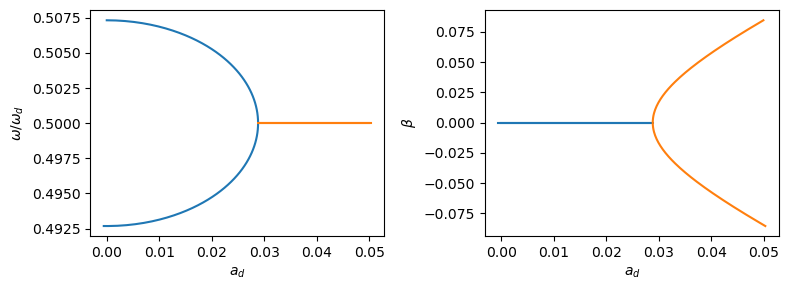

In [6]:
plt.subplots(1,2,figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(spars,np.real(somegas)/(2*np.pi*argsdict['freq']))
plt.plot(spars4,np.real(somegas4)/(2*np.pi*argsdict['freq']))
plt.xlabel('$a_d$')
plt.ylabel(r'$\omega/\omega_d$')
plt.subplot(1,2,2)
plt.ylabel(r'$\beta$')
plt.plot(spars,np.imag(somegas))
plt.plot(spars4,np.imag(somegas4))
plt.xlabel('$a_d$')
plt.tight_layout()
plt.savefig('subharmonic.pdf')
plt.show()

### Inviscid coresonance predicted by degenerate perturbations matrix elements

In [7]:
omegas=[]
gs=[]

for m in range(3):
    for n in range(len(kxss[m])):
        print(m,n,end='\r')
        argsdict['kx']=kxss[m][n]
        argsdict['ky']=kyss[m][n]

        E2,F2=viscid.inviscid_mat_undriven(argsdict)
        evals,evecs=eig(E2,F2)
        U=evecs.reshape((7,7,7,7))
        Uinv=np.linalg.inv(evecs).reshape(7,7,7,7)

        E,F,D=viscid.inviscid_mat(argsdict)
        Eshaped=E.reshape((7,7,7,7,7,7))
        Fshaped=F.reshape((7,7,7,7,7,7))
        Dshaped=D.reshape((7,7,7,7,7,7))
        Finvshaped=np.linalg.inv(F2).reshape((7,7,7,7))
        E2shaped=E2.reshape((7,7,7,7))
        test=np.tensordot(Uinv,np.tensordot(np.tensordot(Finvshaped,E2shaped,axes=((2,3),(0,1))),U,axes=((2,3),(0,1))),axes=((2,3),(0,1)))
        order=np.argsort(np.diag(test.reshape((49,49))))

        test2=np.tensordot(Uinv,np.tensordot(np.tensordot(Finvshaped,Eshaped,axes=((2,3),(1,2))),U,axes=((4,5),(0,1))),axes=((2,3),(0,1)))
        test3=np.tensordot(Uinv,np.tensordot(np.tensordot(Finvshaped,Dshaped,axes=((2,3),(1,2))),U,axes=((4,5),(0,1))),axes=((2,3),(0,1)))
        mat=np.zeros((len(order),len(order)))
        mat[tuple(np.array([np.arange(len(order)),order]))]=1
        newtest2=np.abs(test2.transpose(2,0,1,3,4,5)[3,:,:,3,:,:].reshape(49,49))
        newtest3=test3.transpose(2,0,1,3,4,5)[3,:,:,4,:,:].reshape(49,49)*test3.transpose(2,0,1,3,4,5)[3,:,:,4,:,:].reshape(49,49).T
        omegas=omegas+[(np.diag(mat.dot(newtest2).dot(mat.T)))**0.5]
        gs=gs+[mat.dot(newtest3).dot(mat.T)]


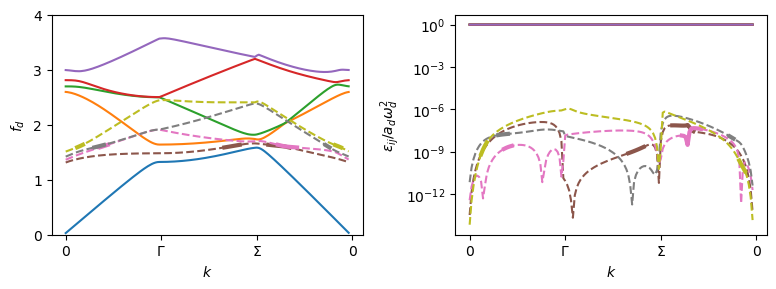

In [13]:
plt.subplots(1,2,figsize=(8,3))

plt.subplot(1,2,1)

plt.subplot(1,2,1)
for i in range(5):
    plt.plot(np.array(omegas)[:,i]*2/(2*np.pi))
ind=5
for i in range(5):
    for j in range(i+1,5):
        if ind<9:
            plt.plot((np.abs(np.array(omegas)[:,i]+np.array(omegas)[:,j]))/(2*np.pi),ls='--',color=colors[np.mod(ind,len(colors))])
            fmin=np.max(np.array(omegas)[:,0]*2)
            fmax=np.min(np.array(omegas)[:,1]*2)
            inds=np.intersect1d(np.where(np.abs(np.array(omegas)[:,i]+np.array(omegas)[:,j])>fmin)[0],np.where(np.abs(np.array(omegas)[:,i]+np.array(omegas)[:,j])<fmax)[0])
            ends=np.concatenate([[0],np.where(np.diff(inds)>1)[0]+1,[len(inds)]])
            for endi in range(len(ends)-1):
                plt.plot(inds[ends[endi]:ends[endi+1]],(np.abs(np.array(omegas)[inds[ends[endi]:ends[endi+1]],i]+np.array(omegas)[inds[ends[endi]:ends[endi+1]],j]))/(2*np.pi),lw=3,color=colors[np.mod(ind,len(colors))])
            ind=ind+1
        
plt.ylim(0,4)
plt.xticks([0,50,100,150],['0','$\Gamma$','$\Sigma$','0'])
plt.xlabel('$k$')
plt.ylabel('$f_d$')


plt.subplot(1,2,2)
for i in range(5):
    plt.plot(np.real(np.array(gs)[:,i,i]*np.array(gs)[:,i,i])**0.5/((np.array(omegas)[:,i]+np.array(omegas)[:,i])**6/2**6*np.array(omegas)[:,i]*np.array(omegas)[:,i])**0.5)
ind=5
for i in range(5):
    for j in range(i+1,5):
        if ind<9:
            plt.plot(np.real(np.array(gs)[:,i,j]*np.array(gs)[:,j,i])**0.5/((np.array(omegas)[:,i]+np.array(omegas)[:,j])**6/2**6*np.array(omegas)[:,i]*np.array(omegas)[:,j])**0.5,ls='--',color=colors[np.mod(ind,len(colors))])
            fmin=np.max(np.array(omegas)[:,0])
            fmax=np.min(np.array(omegas)[:,1])
            inds=np.intersect1d(np.where(np.abs(np.array(omegas)[:,i]+np.array(omegas)[:,j])/2>fmin)[0],np.where(np.abs(np.array(omegas)[:,i]+np.array(omegas)[:,j])/2<fmax)[0])
            ends=np.concatenate([[0],np.where(np.diff(inds)>1)[0]+1,[len(inds)]])
            for endi in range(len(ends)-1):
                plt.plot(inds[ends[endi]:ends[endi+1]],np.real(np.array(gs)[inds[ends[endi]:ends[endi+1]],i,j]*np.array(gs)[inds[ends[endi]:ends[endi+1]],j,i])**0.5/((np.array(omegas)[inds[ends[endi]:ends[endi+1]],i]+np.array(omegas)[inds[ends[endi]:ends[endi+1]],j])**6/2**6*np.array(omegas)[inds[ends[endi]:ends[endi+1]],i]*np.array(omegas)[inds[ends[endi]:ends[endi+1]],j])**0.5,lw=3,color=colors[np.mod(ind,len(colors))])
            ind=ind+1
plt.yscale('log')

plt.xticks([0,50,100,150],['0','$\Gamma$','$\Sigma$','0'])
plt.xlabel('$k$')
plt.ylabel(r'$\varepsilon_{ij}/a_d\omega_d^2$')
plt.tight_layout()
plt.savefig('degenerate.pdf')

plt.show()


### Pseudoarclength continuation confirms weak wave mixing and coresonance

In [152]:
imp.reload(viscid)

def mat(omega,argsdict):
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    E,F,D=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    return (E.reshape(shape)-(omega+ls*argsdict['freq']*2*np.pi)**2*(F.reshape(shape))+argsdict['ad']*D.reshape(shape)).reshape((n_flat,n_flat))
def mat2(omega,argsdict):
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    E,F,D=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    return (-2*(omega+ls*argsdict['freq']*2*np.pi)*(F.reshape(shape))).reshape((n_flat,n_flat))
def mat3(omega,argsdict):
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    E,F,D=viscid.inviscid_mat(argsdict)
    return D


kind=115
print(omegads2[kind][0]/(2*np.pi)*2)
argsdict['kx']=np.concatenate(kxss)[kind]
argsdict['ky']=np.concatenate(kyss)[kind]
argsdict['ad']=0
argsdict['freq']=1.599
# argsdict['freq']=1.6
argsdict['verbose']=1
argsdict['epss']=0

order=np.argsort(np.concatenate(evalssweeps)[kind])

omega1=np.concatenate(evalssweeps)[kind][order[0]]**0.5+1j*1E-8
v1=np.zeros((2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),np.complex128)
v1[argsdict['Nt']]=np.concatenate(revecssweeps)[kind][:,order[0]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
v1=v1.ravel()
w1=np.zeros((2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),np.complex128)
w1[argsdict['Nt']]=np.concatenate(levecssweeps)[kind][:,order[0]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
w1=w1.ravel()

omegans1,vns1,wns1=viscid.rayleigh_mat(omega1,v1,w1,mat,argsdict)
argsdict['par']='ad'
argsdict['pari']=0
argsdict['parf']=0.05
argsdict['dsmax']=1E-3
argsdict['ds']=1E-3
argsdict['dsmin']=1E-10
argsdict['itmax']=5
argsdict['Nsteps']=200
omegas,vs,ws,pars,dirs,dss=viscid.pseudocont(omegans1[-1],vns1[-1],wns1[-1],mat,argsdict,mat2=mat2,mat3=mat3)

(1.5995537437557314+0j)
n=0 dv=2.486216e-03 dw=2.487061e-03 dl=1.415736e-04
n=1 dv=5.582870e-17 dw=3.490481e-17 dl=1.415663e-04
n=2 dv=5.582870e-17 dw=5.584769e-17 dl=1.274669e-08
newdir=(0.000,-0.000,1.000)
step=0 ds=1.000000e-03 ad=0.000000 lambda=3.675649+i-0.000000 dir=(0.000, -0.000, 1.000)
pre dv=2.350e-04 dlambda=0.000e+00 dmu=9.988e-04 ad=0.001000 lr=3.675649 li=-0.000000 mstp=1.110e-16
n=0 dv=1.682e-07 dlambda=2.258e-07 dmu=4.484e-11 ad=0.001000 lr=3.675650 li=0.000000 mstp=5.575e-07
deltadir=-5.576e-07 stp=(0.001,0.000,1.000) newdir=(0.002, -0.000, 1.000)
ds=1.000e-03 ad=0.001000 lambda=3.675650+0.000000i stp=(0.001,0.000,1.000) mstp=5.575e-07
step=1 ds=1.000000e-03 ad=0.001000 lambda=3.675650+i0.000000 dir=(0.002, -0.000, 1.000)
pre dv=2.350e-04 dlambda=4.516e-07 dmu=9.978e-04 ad=0.002000 lr=3.675652 li=0.000000 mstp=0.000e+00
n=0 dv=3.728e-07 dlambda=2.258e-07 dmu=2.405e-09 ad=0.002000 lr=3.675653 li=-0.000000 mstp=5.578e-07
deltadir=-5.580e-07 stp=(0.003,-0.000,1.000) newd

n=0 dv=2.530e-05 dlambda=2.245e-07 dmu=8.301e-08 ad=0.020989 lr=3.676114 li=-0.000000 mstp=2.059e-06
deltadir=-2.315e-06 stp=(0.043,-0.000,0.999) newdir=(0.044, 0.000, 0.999)
ds=1.000e-03 ad=0.020989 lambda=3.676114+-0.000000i stp=(0.043,-0.000,0.999) mstp=2.059e-06
step=21 ds=1.000000e-03 ad=0.020989 lambda=3.676114+i-0.000000 dir=(0.044, 0.000, 0.999)
pre dv=4.266e-04 dlambda=9.468e-06 dmu=9.770e-04 ad=0.021987 lr=3.676158 li=-0.000000 mstp=1.110e-16
n=0 dv=3.222e-05 dlambda=2.241e-07 dmu=1.037e-07 ad=0.021987 lr=3.676159 li=-0.000000 mstp=2.995e-06
deltadir=-3.446e-06 stp=(0.045,0.000,0.998) newdir=(0.046, 0.000, 0.998)
ds=1.000e-03 ad=0.021987 lambda=3.676159+-0.000000i stp=(0.045,0.000,0.998) mstp=2.995e-06
step=22 ds=1.000000e-03 ad=0.021987 lambda=3.676159+i-0.000000 dir=(0.046, 0.000, 0.998)
pre dv=4.939e-04 dlambda=9.916e-06 dmu=9.759e-04 ad=0.022985 lr=3.676205 li=-0.000000 mstp=0.000e+00
n=0 dv=4.184e-05 dlambda=2.236e-07 dmu=1.360e-07 ad=0.022985 lr=3.676207 li=-0.000000 ms

deltadir=-1.336e-04 stp=(0.002,-0.000,0.042) newdir=(0.002, -0.000, 0.037)
ds=1.000e-03 ad=0.032998 lambda=3.676794+-0.000000i stp=(0.002,-0.000,0.042) mstp=1.355e-04
step=40 ds=1.000000e-03 ad=0.032998 lambda=3.676794+i-0.000000 dir=(0.002, -0.000, 0.037)
pre dv=1.423e-02 dlambda=4.452e-07 dmu=3.616e-05 ad=0.033035 lr=3.676796 li=-0.000000 mstp=1.110e-16
n=0 dv=2.413e-04 dlambda=5.305e-08 dmu=3.384e-06 ad=0.033031 lr=3.676796 li=0.000000 mstp=1.307e-04
deltadir=-1.297e-04 stp=(0.002,0.000,0.034) newdir=(0.002, 0.000, 0.031)
ds=1.000e-03 ad=0.033031 lambda=3.676796+0.000000i stp=(0.002,0.000,0.034) mstp=1.307e-04
step=41 ds=1.000000e-03 ad=0.033031 lambda=3.676796+i0.000000 dir=(0.002, 0.000, 0.031)
pre dv=1.416e-02 dlambda=3.438e-07 dmu=2.971e-05 ad=0.033062 lr=3.676798 li=0.000000 mstp=0.000e+00
n=0 dv=2.397e-04 dlambda=4.099e-08 dmu=2.583e-06 ad=0.033059 lr=3.676797 li=0.000000 mstp=1.282e-04
deltadir=-1.277e-04 stp=(0.001,0.000,0.028) newdir=(0.001, 0.000, 0.026)
ds=1.000e-03 ad=0.

pre dv=1.416e-02 dlambda=2.717e-07 dmu=8.347e-08 ad=0.033209 lr=3.676793 li=0.000000 mstp=0.000e+00
n=0 dv=2.137e-04 dlambda=1.789e-08 dmu=3.974e-07 ad=0.033209 lr=3.676793 li=0.000000 mstp=1.250e-04
deltadir=-1.250e-04 stp=(-0.001,-0.000,-0.000) newdir=(-0.001, -0.000, -0.001)
ds=1.000e-03 ad=0.033209 lambda=3.676793+0.000000i stp=(-0.001,-0.000,-0.000) mstp=1.250e-04
step=60 ds=1.000000e-03 ad=0.033209 lambda=3.676793+i0.000000 dir=(-0.001, -0.000, -0.001)
pre dv=1.436e-02 dlambda=3.084e-07 dmu=7.197e-07 ad=0.033208 lr=3.676791 li=0.000000 mstp=2.220e-16
n=0 dv=2.164e-04 dlambda=2.028e-08 dmu=4.252e-07 ad=0.033207 lr=3.676791 li=0.000000 mstp=1.250e-04
deltadir=-1.250e-04 stp=(-0.002,-0.000,-0.001) newdir=(-0.002, -0.000, -0.002)
ds=1.000e-03 ad=0.033207 lambda=3.676791+0.000000i stp=(-0.002,-0.000,-0.001) mstp=1.250e-04
step=61 ds=1.000000e-03 ad=0.033207 lambda=3.676791+i0.000000 dir=(-0.002, -0.000, -0.002)
pre dv=1.456e-02 dlambda=3.501e-07 dmu=1.583e-06 ad=0.033206 lr=3.676790 l

n=0 dv=2.852e-03 dlambda=2.434e-05 dmu=4.254e-04 ad=0.031265 lr=3.676251 li=0.000000 mstp=1.087e-01
n=1 dv=3.355e-04 dlambda=2.241e-06 dmu=3.879e-05 ad=0.031305 lr=3.676262 li=-0.000000 mstp=1.001e-01
deltadir=-2.532e-02 stp=(-0.198,-0.000,-0.743) newdir=(-0.226, 0.000, -0.863)
ds=1.000e-03 ad=0.031305 lambda=3.676262+-0.000000i stp=(-0.217,-0.000,-0.818) mstp=1.001e-01
step=79 ds=1.000000e-03 ad=0.031305 lambda=3.676262+i-0.000000 dir=(-0.198, -0.000, -0.743)
pre dv=1.045e-02 dlambda=4.227e-05 dmu=7.214e-04 ad=0.030562 lr=3.676064 li=-0.000000 mstp=0.000e+00
n=0 dv=4.663e-03 dlambda=1.241e-05 dmu=2.409e-04 ad=0.030314 lr=3.676006 li=-0.000000 mstp=7.050e-02
n=1 dv=5.424e-05 dlambda=7.362e-07 dmu=1.317e-05 ad=0.030327 lr=3.676010 li=-0.000000 mstp=6.906e-02
deltadir=-5.075e-03 stp=(-0.236,0.000,-0.915) newdir=(-0.239, 0.000, -0.943)
ds=1.000e-03 ad=0.030327 lambda=3.676010+-0.000000i stp=(-0.252,0.000,-0.978) mstp=6.906e-02
step=80 ds=1.000000e-03 ad=0.030327 lambda=3.676010+i-0.000000

deltadir=-8.442e-06 stp=(-0.101,0.000,-0.994) newdir=(-0.097, -0.000, -0.994)
ds=1.000e-03 ad=0.011666 lambda=3.672737+0.000000i stp=(-0.101,0.000,-0.994) mstp=8.431e-06
step=99 ds=1.000000e-03 ad=0.011666 lambda=3.672737+i0.000000 dir=(-0.097, -0.000, -0.994)
pre dv=6.975e-04 dlambda=2.071e-05 dmu=9.837e-04 ad=0.010672 lr=3.672640 li=0.000000 mstp=0.000e+00
n=0 dv=2.926e-06 dlambda=8.754e-07 dmu=3.942e-07 ad=0.010672 lr=3.672644 li=-0.000000 mstp=8.463e-06
deltadir=-8.473e-06 stp=(-0.093,-0.000,-0.995) newdir=(-0.089, -0.000, -0.995)
ds=1.000e-03 ad=0.010672 lambda=3.672644+-0.000000i stp=(-0.093,-0.000,-0.995) mstp=8.463e-06
step=100 ds=1.000000e-03 ad=0.010672 lambda=3.672644+i-0.000000 dir=(-0.089, -0.000, -0.995)
pre dv=6.988e-04 dlambda=1.896e-05 dmu=9.854e-04 ad=0.009677 lr=3.672556 li=-0.000000 mstp=2.220e-16
n=0 dv=2.487e-06 dlambda=8.780e-07 dmu=3.618e-07 ad=0.009677 lr=3.672560 li=-0.000000 mstp=8.494e-06
deltadir=-8.504e-06 stp=(-0.084,0.000,-0.995) newdir=(-0.080, 0.000, -

### Switch branches at the bifurcation points

In [153]:
imp.reload(viscid)

fomega=interp1d(np.arange(len(omegas)),omegas,kind='cubic')
fv=interp1d(np.arange(len(omegas)),np.array(vs).T,kind='cubic')
fw=interp1d(np.arange(len(omegas)),np.array(ws).T,kind='cubic')
fpar=interp1d(np.arange(len(omegas)),pars,kind='cubic')
fdir=interp1d(np.arange(len(omegas)),np.array(dirs).T,kind='cubic')


ind=np.where(np.diff(pars)<0)[0][0]
find=minimize_scalar(lambda x: -fpar(x),bracket=(ind-2,ind)).x

omega0=complex(fomega(find))
v0=fv(find)
w0=fw(find)
dir0=fdir(find)
argsdict[argsdict['par']]=float(fpar(find))

s=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
newdir=np.zeros(dir0.shape)
newdir[:s]=dir0[s:2*s]
newdir[s:2*s]=-dir0[:s]
newdir[2*s]=dir0[2*s+1]
newdir[2*s+1]=-dir0[2*s]
newdir[2*s+2]=2*dir0[2*s+2]
dir0=newdir

argsdict['itmax']=5
argsdict['par']='ad'
argsdict['pari']=0.02
argsdict['parf']=0.041
argsdict['ds']=1E-3
argsdict['dsmax']=1E-3
argsdict['dsmin']=1E-14
argsdict['Nsteps']=100
omegas3,vs3,ws3,pars3,dirs3,dss3=viscid.pseudocont(omega0,v0,w0,mat,argsdict,mat2=mat2,mat3=mat3,dir=dir0)


step=0 ds=1.000000e-03 ad=0.033209 lambda=3.676794+i0.000000 dir=(0.000, 0.001, -0.000)
pre dv=1.432e-02 dlambda=2.754e-07 dmu=2.610e-10 ad=0.033209 lr=3.676794 li=0.000001 mstp=-9.319e-10
n=0 dv=2.979e-04 dlambda=1.511e-08 dmu=3.922e-07 ad=0.033209 lr=3.676794 li=0.000001 mstp=1.626e-04
deltadir=-1.656e-04 stp=(0.000,0.001,0.000) newdir=(0.000, 0.001, 0.001)
ds=1.000e-03 ad=0.033209 lambda=3.676794+0.000001i stp=(0.000,0.001,0.000) mstp=1.626e-04
step=1 ds=1.000000e-03 ad=0.033209 lambda=3.676794+i0.000001 dir=(0.000, 0.001, 0.001)
pre dv=1.432e-02 dlambda=2.765e-07 dmu=7.839e-07 ad=0.033210 lr=3.676794 li=0.000003 mstp=0.000e+00
n=0 dv=3.003e-04 dlambda=1.503e-08 dmu=3.904e-07 ad=0.033211 lr=3.676794 li=0.000003 mstp=1.640e-04
deltadir=-1.641e-04 stp=(0.000,0.001,0.001) newdir=(0.000, 0.001, 0.002)
ds=1.000e-03 ad=0.033211 lambda=3.676794+0.000003i stp=(0.000,0.001,0.001) mstp=1.640e-04
step=2 ds=1.000000e-03 ad=0.033211 lambda=3.676794+i0.000003 dir=(0.000, 0.001, 0.002)
pre dv=1.43

pre dv=1.437e-02 dlambda=4.477e-07 dmu=1.137e-05 ad=0.033349 lr=3.676819 li=0.000019 mstp=1.110e-16
n=0 dv=3.000e-04 dlambda=9.765e-09 dmu=1.157e-07 ad=0.033349 lr=3.676819 li=0.000019 mstp=1.639e-04
deltadir=-1.640e-04 stp=(0.002,0.000,0.012) newdir=(0.002, 0.000, 0.012)
ds=1.000e-03 ad=0.033349 lambda=3.676819+0.000019i stp=(0.002,0.000,0.012) mstp=1.639e-04
step=20 ds=1.000000e-03 ad=0.033349 lambda=3.676819+i0.000019 dir=(0.002, 0.000, 0.012)
pre dv=1.437e-02 dlambda=4.535e-07 dmu=1.160e-05 ad=0.033361 lr=3.676821 li=0.000019 mstp=-2.220e-16
n=0 dv=3.000e-04 dlambda=9.511e-09 dmu=9.080e-08 ad=0.033361 lr=3.676821 li=0.000019 mstp=1.639e-04
deltadir=-1.640e-04 stp=(0.002,0.000,0.012) newdir=(0.002, 0.000, 0.012)
ds=1.000e-03 ad=0.033361 lambda=3.676821+0.000019i stp=(0.002,0.000,0.012) mstp=1.639e-04
step=21 ds=1.000000e-03 ad=0.033361 lambda=3.676821+i0.000019 dir=(0.002, 0.000, 0.012)
pre dv=1.438e-02 dlambda=4.581e-07 dmu=1.178e-05 ad=0.033374 lr=3.676823 li=0.000020 mstp=1.110e-

pre dv=1.445e-02 dlambda=3.589e-07 dmu=7.271e-06 ad=0.033556 lr=3.676855 li=0.000011 mstp=-1.110e-16
n=0 dv=2.995e-04 dlambda=1.359e-08 dmu=3.224e-07 ad=0.033556 lr=3.676855 li=0.000011 mstp=1.640e-04
deltadir=-1.641e-04 stp=(0.001,-0.001,0.007) newdir=(0.001, -0.001, 0.007)
ds=1.000e-03 ad=0.033556 lambda=3.676855+0.000011i stp=(0.001,-0.001,0.007) mstp=1.640e-04
step=39 ds=1.000000e-03 ad=0.033556 lambda=3.676855+i0.000011 dir=(0.001, -0.001, 0.007)
pre dv=1.445e-02 dlambda=3.466e-07 dmu=6.625e-06 ad=0.033563 lr=3.676856 li=0.000010 mstp=0.000e+00
n=0 dv=2.995e-04 dlambda=1.393e-08 dmu=3.369e-07 ad=0.033562 lr=3.676856 li=0.000010 mstp=1.640e-04
deltadir=-1.641e-04 stp=(0.001,-0.001,0.007) newdir=(0.001, -0.001, 0.006)
ds=1.000e-03 ad=0.033562 lambda=3.676856+0.000010i stp=(0.001,-0.001,0.006) mstp=1.640e-04
step=40 ds=1.000000e-03 ad=0.033562 lambda=3.676856+i0.000010 dir=(0.001, -0.001, 0.006)
pre dv=1.445e-02 dlambda=3.345e-07 dmu=5.951e-06 ad=0.033569 lr=3.676857 li=0.000009 mstp

deltadir=-1.640e-04 stp=(-0.001,-0.001,-0.008) newdir=(-0.001, -0.001, -0.008)
ds=1.000e-03 ad=0.033538 lambda=3.676852+-0.000013i stp=(-0.001,-0.001,-0.008) mstp=1.640e-04
step=59 ds=1.000000e-03 ad=0.033538 lambda=3.676852+i-0.000013 dir=(-0.001, -0.001, -0.008)
pre dv=1.444e-02 dlambda=3.748e-07 dmu=8.061e-06 ad=0.033530 lr=3.676850 li=-0.000014 mstp=-1.110e-16
n=0 dv=2.995e-04 dlambda=1.274e-08 dmu=2.852e-07 ad=0.033530 lr=3.676850 li=-0.000014 mstp=1.640e-04
deltadir=-1.640e-04 stp=(-0.002,-0.001,-0.009) newdir=(-0.002, -0.001, -0.009)
ds=1.000e-03 ad=0.033530 lambda=3.676850+-0.000014i stp=(-0.002,-0.001,-0.009) mstp=1.640e-04
step=60 ds=1.000000e-03 ad=0.033530 lambda=3.676850+i-0.000014 dir=(-0.002, -0.001, -0.009)
pre dv=1.444e-02 dlambda=3.868e-07 dmu=8.630e-06 ad=0.033521 lr=3.676849 li=-0.000015 mstp=1.110e-16
n=0 dv=2.995e-04 dlambda=1.234e-08 dmu=2.664e-07 ad=0.033521 lr=3.676849 li=-0.000015 mstp=1.640e-04
deltadir=-1.640e-04 stp=(-0.002,-0.001,-0.009) newdir=(-0.002, -0

deltadir=-1.640e-04 stp=(-0.002,0.000,-0.012) newdir=(-0.002, 0.000, -0.012)
ds=1.000e-03 ad=0.033334 lambda=3.676816+-0.000019i stp=(-0.002,0.000,-0.012) mstp=1.639e-04
step=77 ds=1.000000e-03 ad=0.033334 lambda=3.676816+i-0.000019 dir=(-0.002, 0.000, -0.012)
pre dv=1.437e-02 dlambda=4.458e-07 dmu=1.129e-05 ad=0.033322 lr=3.676814 li=-0.000018 mstp=0.000e+00
n=0 dv=3.000e-04 dlambda=1.014e-08 dmu=1.454e-07 ad=0.033322 lr=3.676814 li=-0.000018 mstp=1.639e-04
deltadir=-1.640e-04 stp=(-0.002,0.000,-0.012) newdir=(-0.002, 0.001, -0.011)
ds=1.000e-03 ad=0.033322 lambda=3.676814+-0.000018i stp=(-0.002,0.000,-0.012) mstp=1.639e-04
step=78 ds=1.000000e-03 ad=0.033322 lambda=3.676814+i-0.000018 dir=(-0.002, 0.001, -0.011)
pre dv=1.436e-02 dlambda=4.385e-07 dmu=1.100e-05 ad=0.033311 lr=3.676812 li=-0.000018 mstp=-1.110e-16
n=0 dv=3.001e-04 dlambda=1.048e-08 dmu=1.690e-07 ad=0.033311 lr=3.676812 li=-0.000018 mstp=1.639e-04
deltadir=-1.640e-04 stp=(-0.002,0.001,-0.011) newdir=(-0.002, 0.001, -0.0

deltadir=-1.641e-04 stp=(-0.000,0.001,-0.001) newdir=(-0.000, 0.001, -0.001)
ds=1.000e-03 ad=0.033209 lambda=3.676794+-0.000001i stp=(-0.000,0.001,-0.001) mstp=1.641e-04
step=95 ds=1.000000e-03 ad=0.033209 lambda=3.676794+i-0.000001 dir=(-0.000, 0.001, -0.001)
pre dv=1.432e-02 dlambda=2.759e-07 dmu=5.519e-07 ad=0.033209 lr=3.676794 li=0.000000 mstp=1.110e-16
n=0 dv=3.003e-04 dlambda=1.507e-08 dmu=3.921e-07 ad=0.033209 lr=3.676794 li=0.000000 mstp=1.640e-04
deltadir=-1.641e-04 stp=(-0.000,0.001,-0.000) newdir=(0.000, 0.001, 0.000)
ds=1.000e-03 ad=0.033209 lambda=3.676794+0.000000i stp=(-0.000,0.001,-0.000) mstp=1.640e-04
step=96 ds=1.000000e-03 ad=0.033209 lambda=3.676794+i0.000000 dir=(0.000, 0.001, 0.000)
pre dv=1.432e-02 dlambda=2.755e-07 dmu=2.323e-07 ad=0.033209 lr=3.676794 li=0.000002 mstp=-4.441e-16
n=0 dv=3.003e-04 dlambda=1.506e-08 dmu=3.917e-07 ad=0.033210 lr=3.676794 li=0.000002 mstp=1.640e-04
deltadir=-1.641e-04 stp=(0.000,0.001,0.001) newdir=(0.000, 0.001, 0.001)
ds=1.000e-

In [154]:
imp.reload(viscid)

fomega=interp1d(np.arange(len(omegas3)),omegas3,kind='cubic')
fv=interp1d(np.arange(len(omegas3)),np.array(vs3).T,kind='cubic')
fw=interp1d(np.arange(len(omegas3)),np.array(ws3).T,kind='cubic')
fpar=interp1d(np.arange(len(omegas3)),pars3,kind='cubic')
fdir=interp1d(np.arange(len(omegas3)),np.array(dirs3).T,kind='cubic')

ind=np.where(np.diff(pars3)<0)[0][0]
find=minimize_scalar(lambda x: -fpar(x),bracket=(ind-2,ind)).x

omega0=complex(fomega(find))
v0=fv(find)
w0=fw(find)
dir0=fdir(find)
argsdict[argsdict['par']]=float(fpar(find))

s=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
newdir=np.zeros(dir0.shape)
newdir[:s]=dir0[s:2*s]
newdir[s:2*s]=-dir0[:s]
newdir[2*s]=dir0[2*s+1]
newdir[2*s+1]=-dir0[2*s]
newdir[2*s+2]=2*dir0[2*s+2]
dir0=newdir

imp.reload(viscid)
argsdict['itmax']=5
argsdict['par']='ad'
argsdict['pari']=0.02
argsdict['parf']=0.05
argsdict['epsl']=1E-6
argsdict['epsu']=1E-6
argsdict['ds']=1E-3
argsdict['dsmax']=1E-3
argsdict['dsmin']=1E-12
omegas4,vs4,ws4,pars4,dirs4,dss4=viscid.pseudocont(omega0,v0,w0,mat,argsdict,mat2=mat2,mat3=mat3,dir=dir0)
argsdict['ds']=-1E-3
argsdict['dsmax']=1E-3
argsdict['Nsteps']=500
argsdict[argsdict['par']]=pars4[-2]
argsdict['parf']=pars4[-1]
omegas5,vs5,ws5,pars5,dirs5,dss5=viscid.pseudocont(omegas4[-2],vs4[-2],ws4[-2],mat,argsdict,mat2=mat2,mat3=mat3)

step=0 ds=1.000000e-03 ad=0.033587 lambda=3.676860+i0.000000 dir=(-0.001, -0.000, 0.000)
pre dv=1.461e-02 dlambda=2.785e-07 dmu=1.676e-10 ad=0.033587 lr=3.676859 li=0.000000 mstp=-2.713e-08
n=0 dv=2.077e-04 dlambda=1.731e-08 dmu=3.900e-07 ad=0.033587 lr=3.676859 li=-0.000000 mstp=1.249e-04
n=1 dv=7.085e-06 dlambda=1.215e-10 dmu=3.851e-10 ad=0.033587 lr=3.676859 li=0.000000 mstp=1.251e-04
n=2 dv=1.750e-09 dlambda=3.068e-14 dmu=9.657e-14 ad=0.033587 lr=3.676859 li=0.000000 mstp=1.251e-04
deltadir=-1.251e-04 stp=(-0.001,-0.000,0.000) newdir=(-0.001, -0.000, 0.001)
ds=1.000e-03 ad=0.033587 lambda=3.676859+0.000000i stp=(-0.001,-0.000,0.000) mstp=1.251e-04
step=1 ds=1.000000e-03 ad=0.033587 lambda=3.676859+i0.000000 dir=(-0.001, -0.000, 0.001)
pre dv=1.442e-02 dlambda=2.447e-07 dmu=7.754e-07 ad=0.033588 lr=3.676858 li=0.000000 mstp=-2.220e-16
n=0 dv=2.045e-04 dlambda=1.560e-08 dmu=3.762e-07 ad=0.033589 lr=3.676858 li=-0.000000 mstp=1.249e-04
n=1 dv=7.003e-06 dlambda=1.067e-10 dmu=7.608e-10 

n=2 dv=2.513e-10 dlambda=1.294e-15 dmu=2.420e-13 ad=0.033661 lr=3.676854 li=-0.000000 mstp=1.254e-04
deltadir=-1.254e-04 stp=(0.000,-0.000,0.013) newdir=(0.000, 0.000, 0.014)
ds=1.000e-03 ad=0.033661 lambda=3.676854+-0.000000i stp=(0.000,-0.000,0.013) mstp=1.254e-04
step=13 ds=1.000000e-03 ad=0.033661 lambda=3.676854+i-0.000000 dir=(0.000, 0.000, 0.014)
pre dv=1.350e-02 dlambda=7.400e-08 dmu=1.318e-05 ad=0.033675 lr=3.676855 li=-0.000000 mstp=0.000e+00
n=0 dv=2.333e-04 dlambda=1.835e-08 dmu=1.015e-06 ad=0.033676 lr=3.676855 li=-0.000000 mstp=1.254e-04
n=1 dv=6.863e-06 dlambda=5.581e-11 dmu=7.636e-09 ad=0.033676 lr=3.676855 li=-0.000000 mstp=1.256e-04
n=2 dv=2.574e-10 dlambda=2.168e-15 dmu=2.853e-13 ad=0.033676 lr=3.676855 li=0.000000 mstp=1.256e-04
deltadir=-1.256e-04 stp=(0.000,0.000,0.015) newdir=(0.001, -0.000, 0.016)
ds=1.000e-03 ad=0.033676 lambda=3.676855+0.000000i stp=(0.000,0.000,0.015) mstp=1.256e-04
step=14 ds=1.000000e-03 ad=0.033676 lambda=3.676855+i0.000000 dir=(0.001, -0.

n=2 dv=1.197e-10 dlambda=4.992e-14 dmu=3.135e-12 ad=0.034648 lr=3.676919 li=-0.000000 mstp=6.428e-03
deltadir=-3.498e-03 stp=(0.021,-0.000,0.289) newdir=(0.026, 0.000, 0.366)
ds=1.000e-03 ad=0.034648 lambda=3.676919+-0.000000i stp=(0.021,-0.000,0.290) mstp=6.428e-03
step=26 ds=1.000000e-03 ad=0.034648 lambda=3.676919+i-0.000000 dir=(0.021, -0.000, 0.289)
pre dv=1.388e-02 dlambda=4.403e-06 dmu=2.789e-04 ad=0.034937 lr=3.676939 li=-0.000000 mstp=-2.220e-16
n=0 dv=7.754e-04 dlambda=3.331e-06 dmu=2.005e-04 ad=0.035144 lr=3.676955 li=-0.000000 mstp=2.323e-02
n=1 dv=6.971e-05 dlambda=5.791e-08 dmu=3.551e-06 ad=0.035140 lr=3.676954 li=-0.000000 mstp=2.290e-02
n=2 dv=1.196e-07 dlambda=9.908e-11 dmu=6.077e-09 ad=0.035140 lr=3.676954 li=0.000000 mstp=2.290e-02
deltadir=-1.162e-02 stp=(0.035,0.000,0.481) newdir=(0.045, -0.000, 0.608)
ds=1.000e-03 ad=0.035140 lambda=3.676954+0.000000i stp=(0.036,0.000,0.493) mstp=2.290e-02
step=27 ds=1.000000e-03 ad=0.035140 lambda=3.676954+i0.000000 dir=(0.035, 0

n=0 dv=1.769e-05 dlambda=2.226e-07 dmu=7.748e-08 ad=0.048793 lr=3.678165 li=-0.000000 mstp=1.302e-06
n=1 dv=1.931e-12 dlambda=1.456e-13 dmu=6.292e-12 ad=0.048793 lr=3.678165 li=-0.000000 mstp=1.302e-06
deltadir=-1.208e-06 stp=(0.102,-0.000,0.995) newdir=(0.103, 0.000, 0.994)
ds=1.000e-03 ad=0.048793 lambda=3.678165+-0.000000i stp=(0.102,-0.000,0.995) mstp=1.302e-06
step=41 ds=1.000000e-03 ad=0.048793 lambda=3.678165+i-0.000000 dir=(0.103, 0.000, 0.994)
pre dv=2.900e-04 dlambda=2.194e-05 dmu=9.473e-04 ad=0.049788 lr=3.678268 li=-0.000000 mstp=-2.220e-16
n=0 dv=1.450e-05 dlambda=2.223e-07 dmu=8.575e-08 ad=0.049788 lr=3.678269 li=-0.000000 mstp=1.057e-06
n=1 dv=1.171e-12 dlambda=1.002e-13 dmu=4.235e-12 ad=0.049788 lr=3.678269 li=-0.000000 mstp=1.057e-06
deltadir=-9.972e-07 stp=(0.104,-0.000,0.994) newdir=(0.105, 0.000, 0.994)
ds=1.000e-03 ad=0.049788 lambda=3.678269+-0.000000i stp=(0.104,-0.000,0.994) mstp=1.057e-06
step=42 ds=1.000000e-03 ad=0.049788 lambda=3.678269+i-0.000000 dir=(0.105

n=0 dv=2.346e-03 dlambda=1.103e-06 dmu=3.938e-05 ad=0.035975 lr=3.677017 li=0.000000 mstp=1.376e-02
n=1 dv=3.774e-06 dlambda=7.023e-09 dmu=4.184e-07 ad=0.035974 lr=3.677017 li=-0.000000 mstp=1.378e-02
n=2 dv=8.241e-11 dlambda=1.533e-13 dmu=9.132e-12 ad=0.035974 lr=3.677017 li=-0.000000 mstp=1.378e-02
deltadir=-7.685e-03 stp=(0.070,0.000,0.914) newdir=(0.065, -0.000, 0.857)
ds=-1.000e-03 ad=0.035974 lambda=3.677017+-0.000000i stp=(0.071,0.000,0.926) mstp=1.378e-02
step=14 ds=-1.000000e-03 ad=0.035974 lambda=3.677017+i-0.000000 dir=(0.070, 0.000, 0.914)
pre dv=5.866e-03 dlambda=1.501e-05 dmu=8.827e-04 ad=0.035061 lr=3.676947 li=-0.000000 mstp=0.000e+00
n=0 dv=3.979e-03 dlambda=2.431e-06 dmu=1.231e-04 ad=0.035188 lr=3.676958 li=0.000000 mstp=4.501e-02
n=1 dv=9.889e-05 dlambda=8.638e-08 dmu=5.288e-06 ad=0.035183 lr=3.676958 li=0.000000 mstp=4.585e-02
n=2 dv=1.063e-07 dlambda=9.252e-11 dmu=5.665e-09 ad=0.035183 lr=3.676958 li=-0.000000 mstp=4.585e-02
deltadir=-1.670e-02 stp=(0.057,-0.000,0.

n=2 dv=2.849e-10 dlambda=4.272e-15 dmu=4.275e-13 ad=0.033713 lr=3.676856 li=0.000000 mstp=1.271e-04
deltadir=-1.268e-04 stp=(0.001,-0.000,0.024) newdir=(0.001, -0.000, 0.022)
ds=-1.000e-03 ad=0.033713 lambda=3.676856+0.000000i stp=(0.001,-0.000,0.024) mstp=1.271e-04
step=26 ds=-1.000000e-03 ad=0.033713 lambda=3.676856+i0.000000 dir=(0.001, -0.000, 0.022)
pre dv=1.404e-02 dlambda=2.088e-07 dmu=2.094e-05 ad=0.033691 lr=3.676855 li=0.000000 mstp=-2.220e-16
n=0 dv=2.354e-04 dlambda=2.732e-08 dmu=1.619e-06 ad=0.033693 lr=3.676855 li=0.000000 mstp=1.262e-04
n=1 dv=6.912e-06 dlambda=7.784e-11 dmu=8.899e-09 ad=0.033693 lr=3.676855 li=-0.000000 mstp=1.263e-04
n=2 dv=2.674e-10 dlambda=2.934e-15 dmu=3.454e-13 ad=0.033693 lr=3.676855 li=-0.000000 mstp=1.263e-04
deltadir=-1.262e-04 stp=(0.001,0.000,0.020) newdir=(0.001, -0.000, 0.018)
ds=-1.000e-03 ad=0.033693 lambda=3.676855+-0.000000i stp=(0.001,0.000,0.020) mstp=1.263e-04
step=27 ds=-1.000000e-03 ad=0.033693 lambda=3.676855+i-0.000000 dir=(0.001

n=2 dv=5.597e-10 dlambda=7.415e-15 dmu=9.040e-14 ad=0.033591 lr=3.676857 li=-0.000000 mstp=1.251e-04
deltadir=-1.251e-04 stp=(-0.001,-0.000,0.003) newdir=(-0.001, 0.000, 0.002)
ds=-1.000e-03 ad=0.033591 lambda=3.676857+-0.000000i stp=(-0.001,-0.000,0.003) mstp=1.251e-04
step=39 ds=-1.000000e-03 ad=0.033591 lambda=3.676857+i-0.000000 dir=(-0.001, 0.000, 0.002)
pre dv=1.366e-02 dlambda=1.860e-07 dmu=2.271e-06 ad=0.033588 lr=3.676858 li=-0.000000 mstp=0.000e+00
n=0 dv=2.045e-04 dlambda=1.375e-08 dmu=3.715e-07 ad=0.033589 lr=3.676858 li=0.000000 mstp=1.249e-04
n=1 dv=7.036e-06 dlambda=1.072e-10 dmu=7.656e-10 ad=0.033589 lr=3.676858 li=-0.000000 mstp=1.251e-04
n=2 dv=8.761e-10 dlambda=1.359e-14 dmu=9.397e-14 ad=0.033589 lr=3.676858 li=0.000000 mstp=1.251e-04
deltadir=-1.251e-04 stp=(-0.001,-0.000,0.002) newdir=(-0.001, -0.000, 0.002)
ds=-1.000e-03 ad=0.033589 lambda=3.676858+0.000000i stp=(-0.001,-0.000,0.002) mstp=1.251e-04
step=40 ds=-1.000000e-03 ad=0.033589 lambda=3.676858+i0.000000 dir

deltadir=-1.268e-04 stp=(-0.005,0.000,-0.015) newdir=(-0.006, -0.000, -0.017)
ds=-1.000e-03 ad=0.033649 lambda=3.676888+-0.000000i stp=(-0.005,0.000,-0.015) mstp=1.265e-04
step=52 ds=-1.000000e-03 ad=0.033649 lambda=3.676888+i-0.000000 dir=(-0.006, -0.000, -0.017)
pre dv=1.579e-02 dlambda=1.217e-06 dmu=1.640e-05 ad=0.033666 lr=3.676894 li=-0.000000 mstp=1.110e-16
n=0 dv=2.334e-04 dlambda=1.309e-07 dmu=2.135e-06 ad=0.033668 lr=3.676895 li=-0.000000 mstp=1.274e-04
n=1 dv=7.886e-06 dlambda=7.387e-10 dmu=1.034e-08 ad=0.033668 lr=3.676895 li=-0.000000 mstp=1.276e-04
n=2 dv=4.892e-10 dlambda=4.586e-14 dmu=6.422e-13 ad=0.033668 lr=3.676895 li=-0.000000 mstp=1.276e-04
deltadir=-1.281e-04 stp=(-0.006,0.000,-0.019) newdir=(-0.007, -0.000, -0.022)
ds=-1.000e-03 ad=0.033668 lambda=3.676895+-0.000000i stp=(-0.006,0.000,-0.019) mstp=1.276e-04
step=53 ds=-1.000000e-03 ad=0.033668 lambda=3.676895+i-0.000000 dir=(-0.007, -0.000, -0.022)
pre dv=1.588e-02 dlambda=1.494e-06 dmu=2.091e-05 ad=0.033690 lr=3.

n=1 dv=1.425e-08 dlambda=6.544e-10 dmu=9.143e-09 ad=0.038521 lr=3.678368 li=-0.000000 mstp=2.661e-04
deltadir=-1.799e-04 stp=(-0.302,0.000,-0.947) newdir=(-0.306, -0.000, -0.948)
ds=-1.000e-03 ad=0.038521 lambda=3.678368+-0.000000i stp=(-0.302,0.000,-0.947) mstp=2.661e-04
step=65 ds=-1.000000e-03 ad=0.038521 lambda=3.678368+i-0.000000 dir=(-0.306, -0.000, -0.948)
pre dv=1.422e-03 dlambda=6.530e-05 dmu=9.116e-04 ad=0.039469 lr=3.678673 li=-0.000000 mstp=0.000e+00
n=0 dv=2.089e-04 dlambda=7.996e-07 dmu=8.664e-08 ad=0.039469 lr=3.678677 li=-0.000000 mstp=8.899e-05
n=1 dv=2.956e-09 dlambda=1.907e-10 dmu=2.598e-09 ad=0.039469 lr=3.678677 li=-0.000000 mstp=8.899e-05
deltadir=-6.527e-05 stp=(-0.309,0.000,-0.947) newdir=(-0.313, 0.000, -0.947)
ds=-1.000e-03 ad=0.039469 lambda=3.678677+-0.000000i stp=(-0.309,0.000,-0.947) mstp=8.899e-05
step=66 ds=-1.000000e-03 ad=0.039469 lambda=3.678677+i-0.000000 dir=(-0.313, 0.000, -0.947)
pre dv=1.037e-03 dlambda=6.686e-05 dmu=9.101e-04 ad=0.040416 lr=3.67

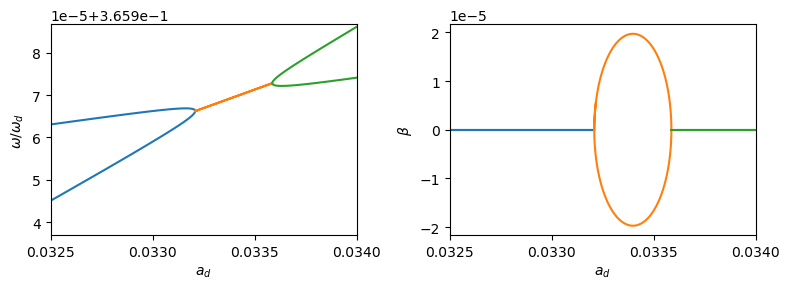

In [155]:
plt.subplots(1,2,figsize=(8,3))
plt.subplot(1,2,1)

plt.plot(pars,np.real(omegas)/(2*np.pi*argsdict['freq']))
plt.plot(pars3,np.real(omegas3)/(2*np.pi*argsdict['freq']))
plt.plot(pars5,np.real(omegas5)/(2*np.pi*argsdict['freq']))

plt.xlabel('$a_d$')
plt.ylabel(r'$\omega/\omega_d$')
plt.xlim(0.0325,0.034)
plt.gca().set_xticks(plt.gca().get_xticks()[::1])
plt.ylim(3.6765/(2*np.pi*argsdict['freq']),3.677/(2*np.pi*argsdict['freq']))

plt.subplot(1,2,2)
plt.ylabel(r'$\beta$')
plt.plot(pars,np.imag(omegas))
plt.plot(pars3,np.imag(omegas3))
plt.plot(pars5,np.imag(omegas5))
plt.xlim(0.0325,0.034)
plt.gca().set_xticks(plt.gca().get_xticks()[::1])


plt.xlabel('$a_d$')
plt.tight_layout()
plt.savefig('anharmonic.pdf')

plt.show()

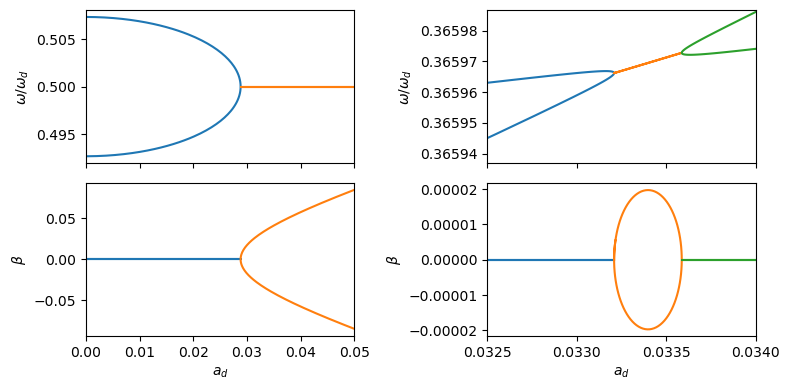

In [178]:
plt.subplots(2,2,figsize=(8,4))

plt.subplot(2,2,1)
plt.plot(spars,np.real(somegas)/(2*np.pi*1.3))
plt.plot(spars4,np.real(somegas4)/(2*np.pi*1.3))
# plt.xlabel('$a_d$')
plt.xlim(0,0.05)
plt.gca().set_xticks(plt.gca().get_xticks()[::1],labels=len(plt.gca().get_xticks()[::1])*[''])
plt.ylabel(r'$\omega/\omega_d$')

plt.subplot(2,2,2)

plt.plot(pars,np.real(omegas)/(2*np.pi*argsdict['freq']))
plt.plot(pars3,np.real(omegas3)/(2*np.pi*argsdict['freq']))
plt.plot(pars5,np.real(omegas5)/(2*np.pi*argsdict['freq']))

plt.ylabel(r'$\omega/\omega_d$')
plt.xlim(0.0325,0.034)
plt.gca().set_xticks(plt.gca().get_xticks()[::1],labels=len(plt.gca().get_xticks()[::1])*[''])
plt.ylim(3.6765/(2*np.pi*argsdict['freq']),3.677/(2*np.pi*argsdict['freq']))
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)


plt.subplot(2,2,3)
plt.ylabel(r'$\beta$')
plt.plot(spars,np.imag(somegas))
plt.plot(spars4,np.imag(somegas4))
plt.xlabel('$a_d$')
plt.xlim(0,0.05)

plt.subplot(2,2,4)
plt.ylabel(r'$\beta$')
plt.plot(pars,np.imag(omegas))
plt.plot(pars3,np.imag(omegas3))
plt.plot(pars5,np.imag(omegas5))
plt.xlim(0.0325,0.034)
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.gca().set_xticks(plt.gca().get_xticks()[::1])


plt.xlabel('$a_d$')



plt.tight_layout()

plt.savefig('continuations.pdf')


## Continuation of subharmonic critical driving

### Inviscid instability boundary

In [153]:
imp.reload(viscid)
k0=kxs1[-4]
argsdict['ad']=0
argsdict['h0']=1.0
argsdict['As']=0.8
argsdict['kx']=k0
argsdict['ky']=0
argsdict['Nx']=3
argsdict['Ny']=3
argsdict['Nt']=3
argsdict['dim']=2
argsdict['verbose']=1
argsdict['dsmin']=1E-12
argsdict['epsl']=1E-6
argsdict['epsu']=1E-6
eta=1E-2
lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)

def mat(ad,argsdict):
    E,F,D=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    omega=argsdict['freq']*2*np.pi/2
    return ((1+1j*eta*omega)*E.reshape(shape)-(omega+ls*argsdict['freq']*2*np.pi)**2*(F.reshape(shape))+ad*D.reshape(shape)).reshape((n_flat,n_flat)).T
def mat2(ad,argsdict):
    E,F,D=viscid.inviscid_mat(argsdict)
    return D.T
def mat3(ad,argsdict):
    E,F,D=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    omega=argsdict['freq']*2*np.pi/2
    return 1j*eta*2*np.pi/2*E.reshape(shape).reshape((n_flat,n_flat)).T+(-2*(2*np.pi/2+ls*2*np.pi)*(omega+ls*argsdict['freq']*2*np.pi)*(F.reshape(shape))).reshape((n_flat,n_flat)).T


[1.29934426 1.65912792]


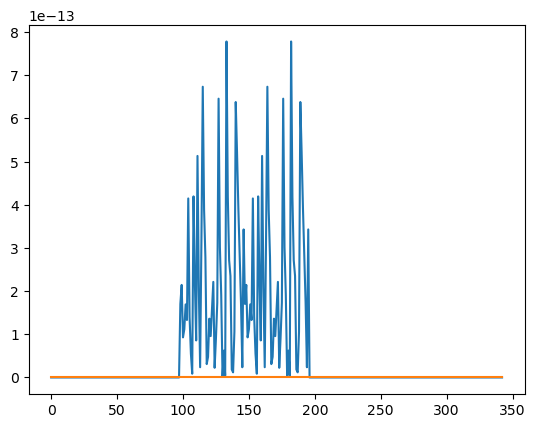

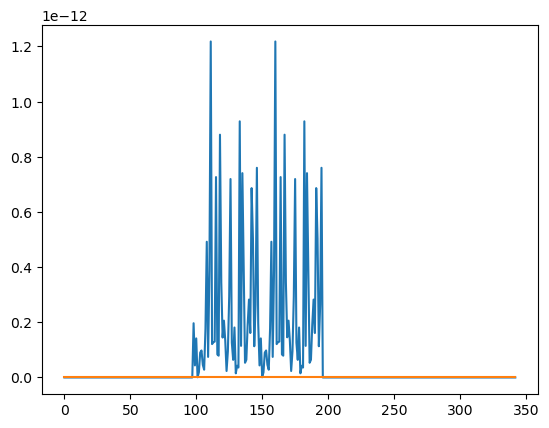

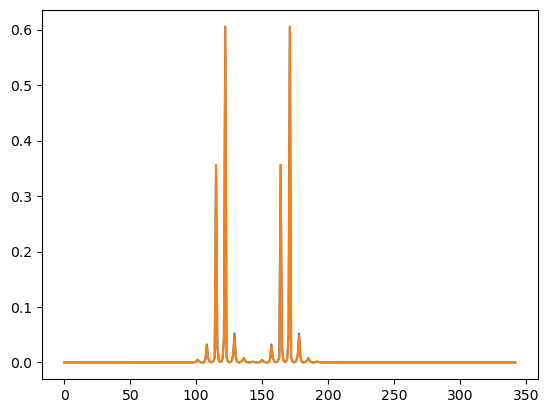

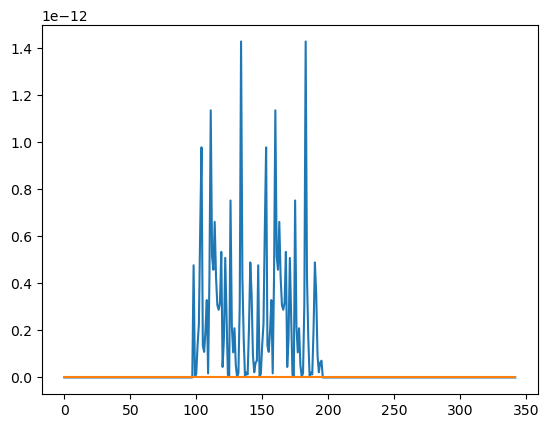

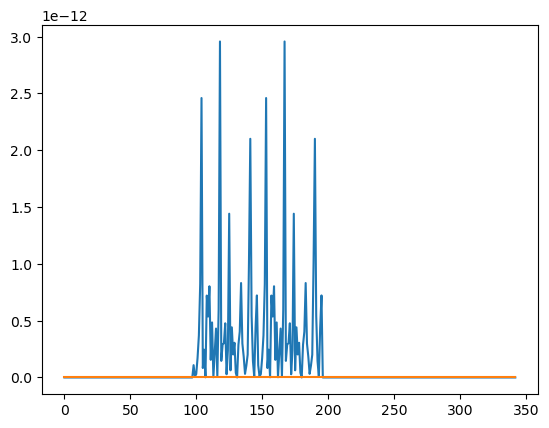

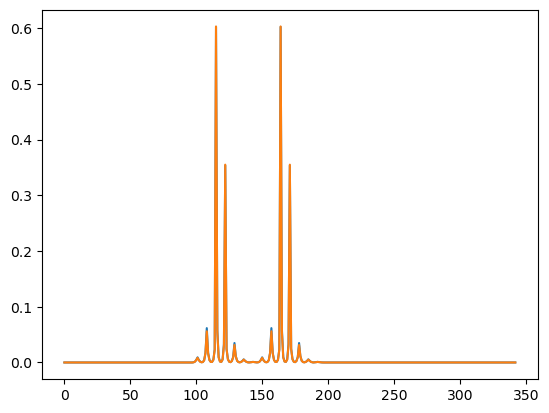

In [154]:
F,G=viscid.inviscid_mat_undriven(argsdict)
evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
order=np.argsort(np.real(evals))
freq0s=np.real(evals[order[:2]]**0.5/(2*np.pi/2))
print(freq0s)

ad0s=[]
vn0s=[]
wn0s=[]
for j in range(2):
    freq0=freq0s[j]
    argsdict['freq']=freq0
    v0=np.zeros((1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),dtype=np.complex128)
    w0=np.zeros((1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),dtype=np.complex128)
    v0[0,argsdict['Nt']]=revecs[:,order[j]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))/2**0.5
    v0[0,argsdict['Nt']-1]=revecs[:,order[j]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))/2**0.5
    w0[0,argsdict['Nt']]=levecs[:,order[j]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))/2**0.5
    w0[0,argsdict['Nt']-1]=levecs[:,order[j]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))/2**0.5
    v0=v0.ravel()
    w0=w0.ravel()
    ad0=0
    E1,F1,D1=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    omega=argsdict['freq']*2*np.pi/2
    E=(E1.reshape(shape)-(omega+ls*argsdict['freq']*2*np.pi)**2*(F1.reshape(shape))).reshape((n_flat,n_flat))
    F=(D1.reshape(shape)).reshape((n_flat,n_flat))

    ad0s=ad0s+[0]
    vn0s=vn0s+[v0]
    wn0s=wn0s+[w0]

    plt.plot(np.abs(E.T.dot(vn0s[j])))
    plt.plot(np.abs(ad0s[j]*F.T.dot(vn0s[j])))
    plt.show()
    plt.plot(np.abs(E.dot(wn0s[j])))
    plt.plot(np.abs(ad0s[j]*F.dot(wn0s[j])))
    plt.show()
    plt.plot(np.abs(vn0s[j]))
    plt.plot(np.abs(wn0s[j]))
    plt.show()

[[0.14765485 0.        ]
 [0.15079645 0.        ]
 [0.15393804 0.        ]
 [0.15707963 0.        ]
 [0.15707963 0.0018138 ]
 [0.15707963 0.009069  ]
 [0.15707963 0.01632419]
 [0.15707963 0.02357939]
 [0.15707963 0.03083459]
 [0.15707963 0.03808979]
 [0.15707963 0.04534498]
 [0.15707963 0.05260018]
 [0.15707963 0.05985538]
 [0.15707963 0.06711058]
 [0.15707963 0.07436577]
 [0.15707963 0.08162097]
 [0.15707963 0.08887617]]
17


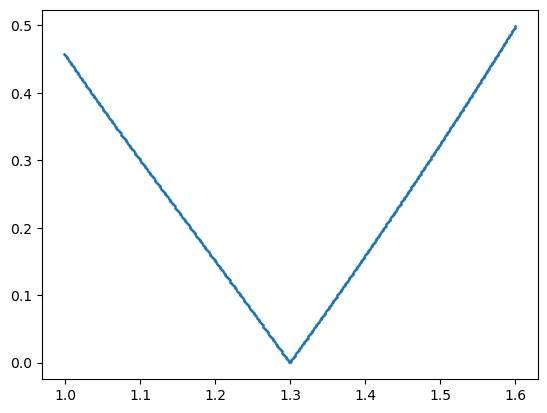

0.43409501897986047


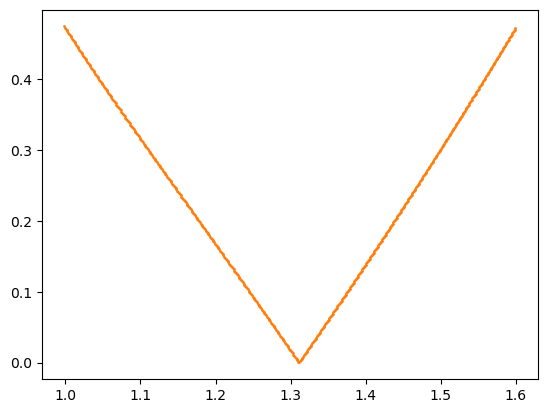

0.5762868849851657


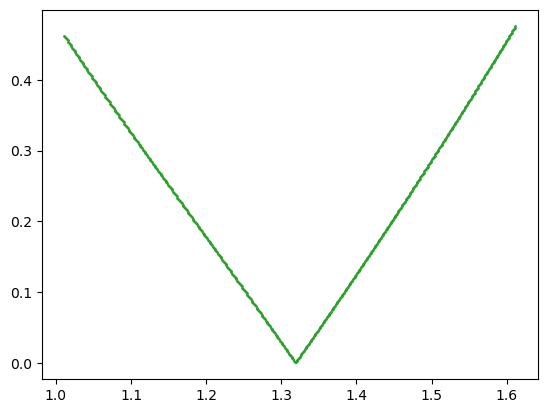

0.7126288449799176


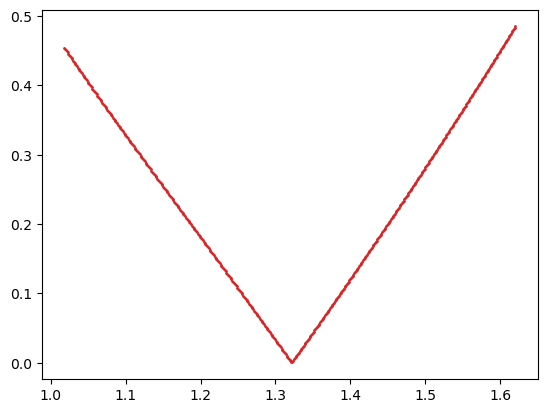

0.857862048986135


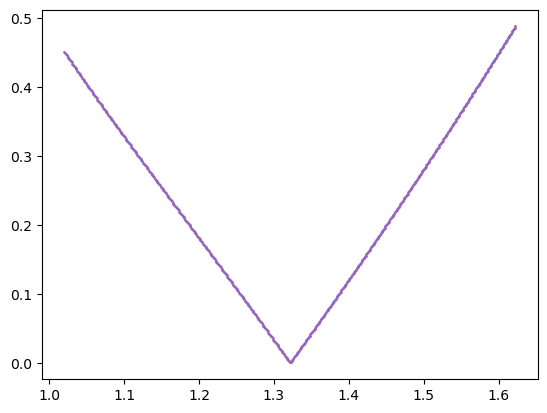

1.0065579299989622


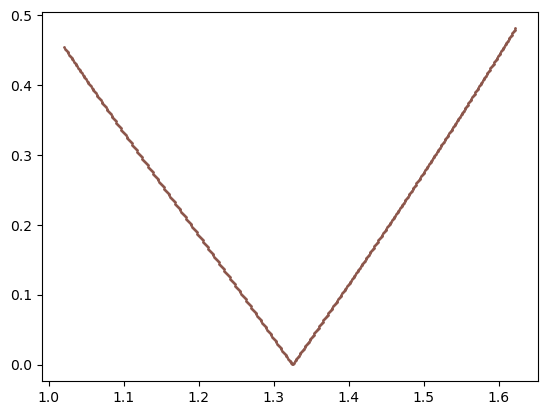

1.1566607219865546


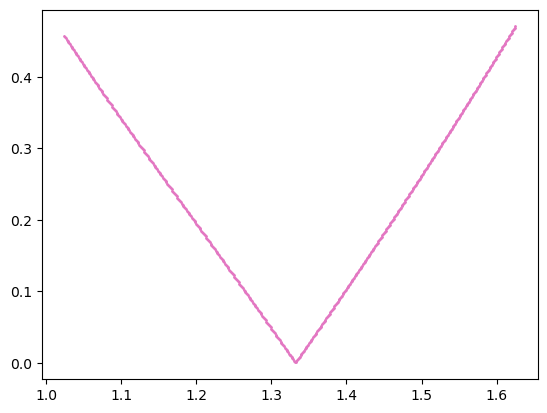

1.2992414079781156


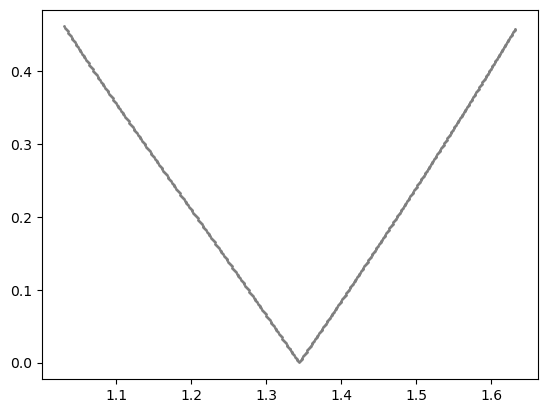

1.4394689689797815


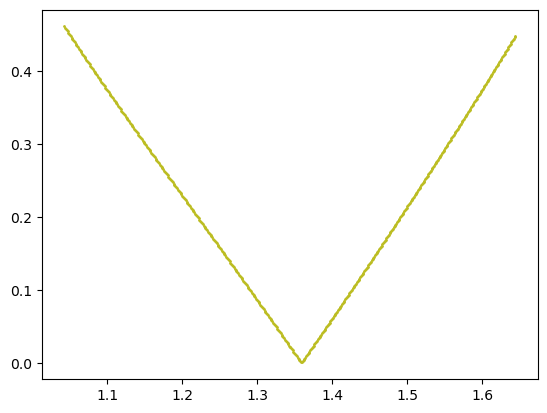

1.584869507001713


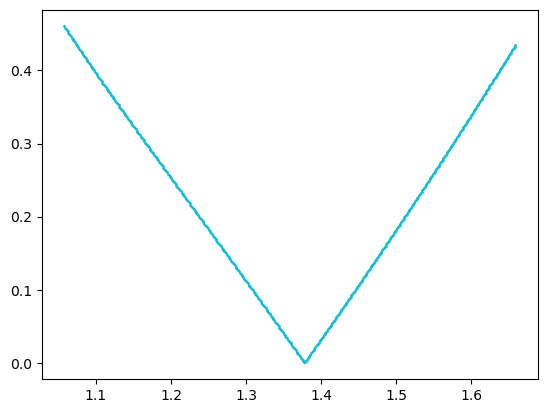

1.7222852249979042


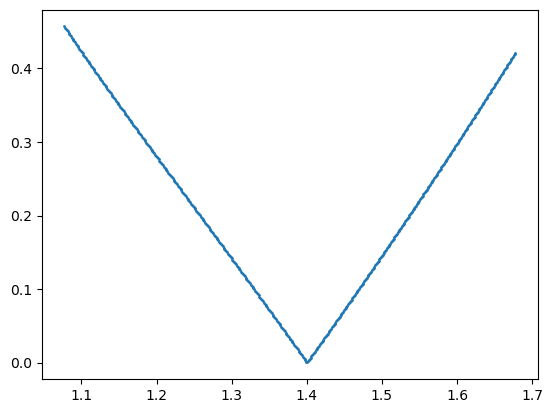

2.087916766991839


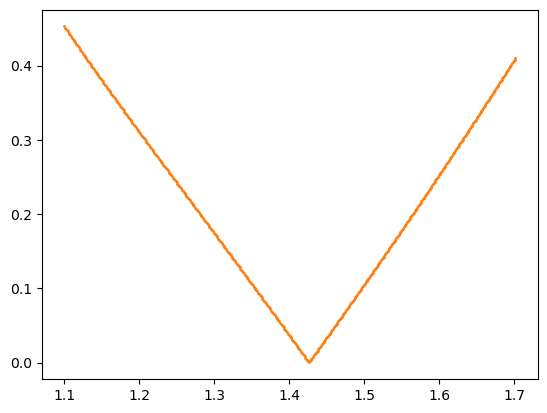

2.227996165980585


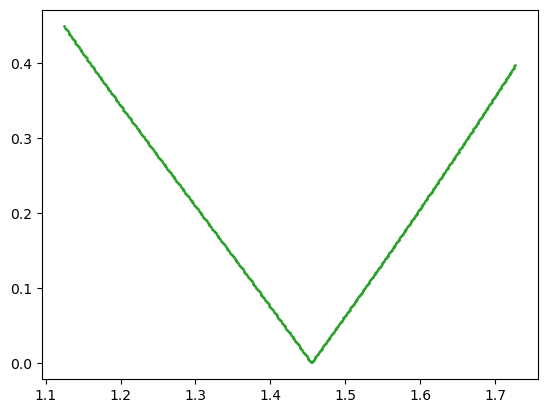

2.3711464630032424


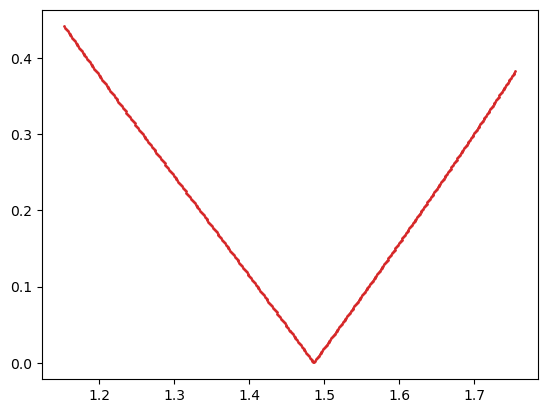

2.5062704279844183


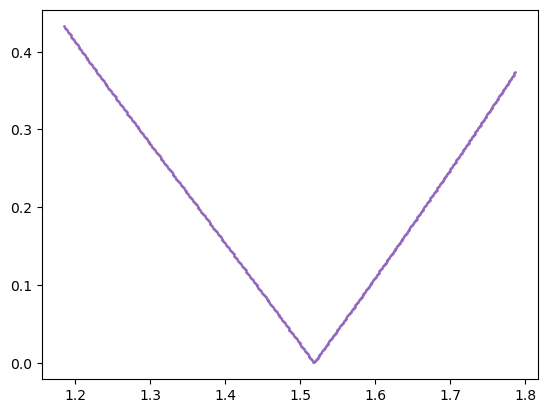

2.6477570429851767


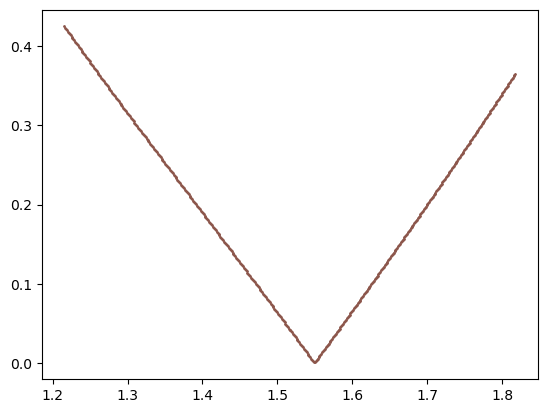

2.7941326269938145


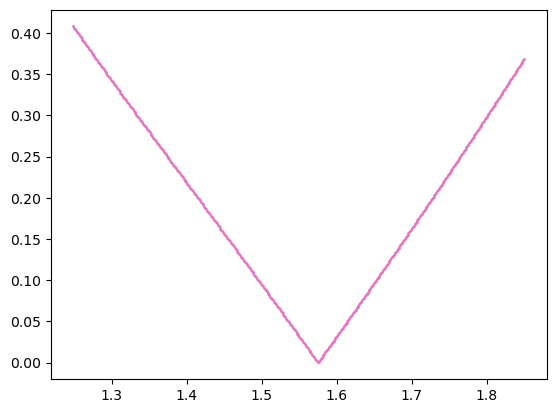

2.942752335977275


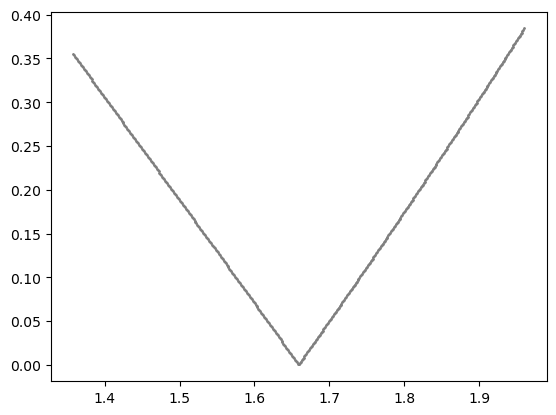

3.1662059599766508


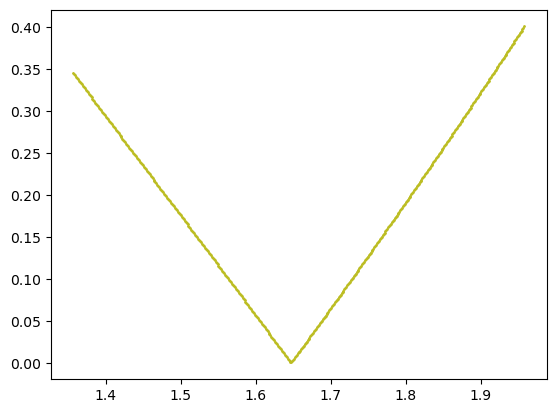

3.3184250749764033


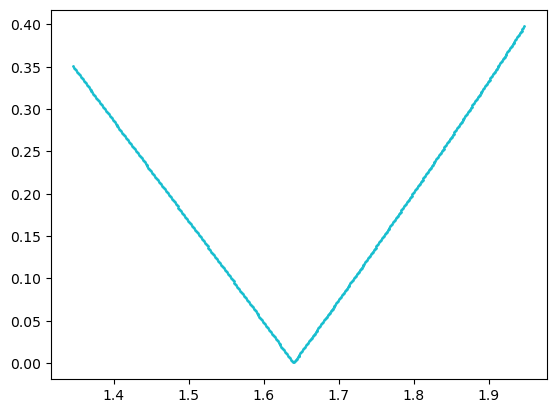

3.473575052979868


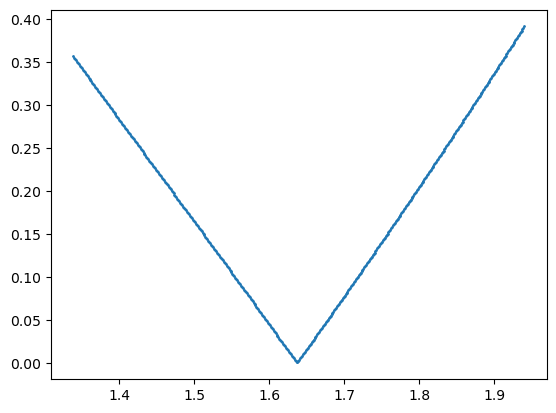

3.6261538569815457


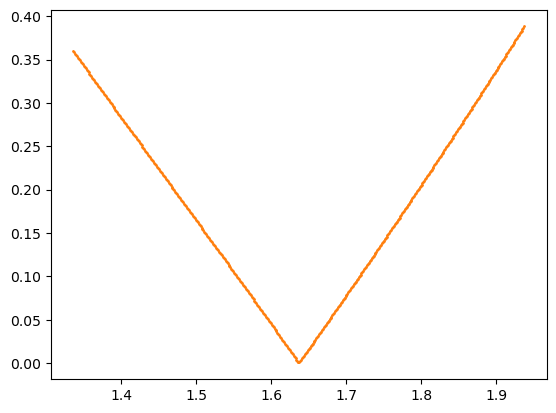

3.7825520549959037


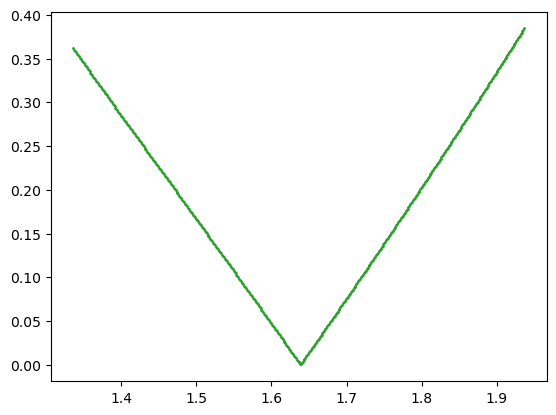

3.93307396597811


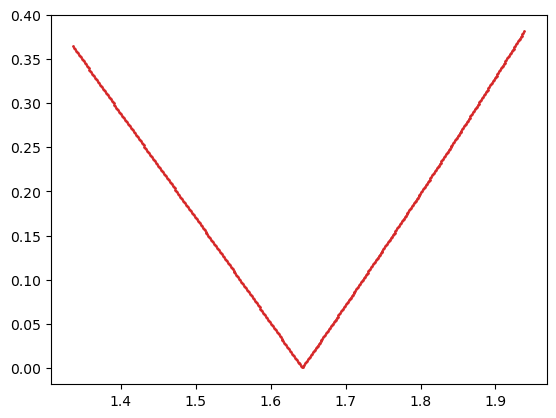

4.088019127986627


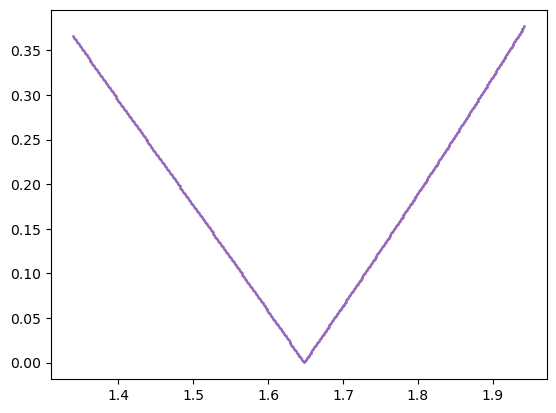

4.244650086999172


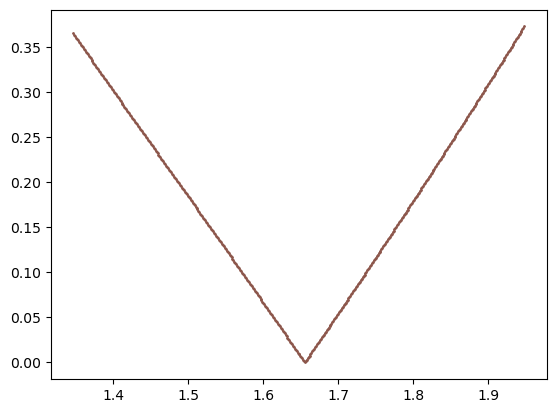

4.395119770983001


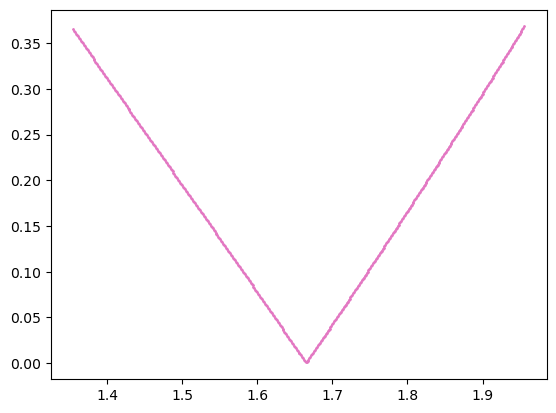

4.539178124978207


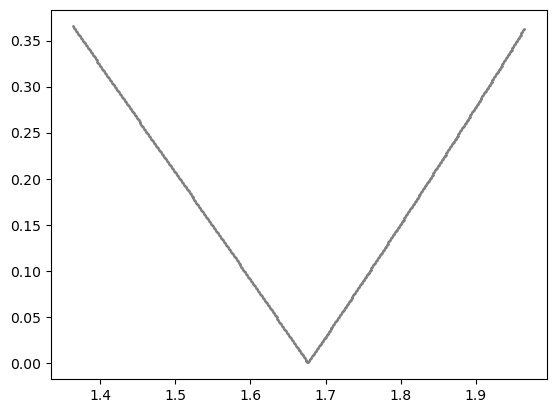

4.68861506797839


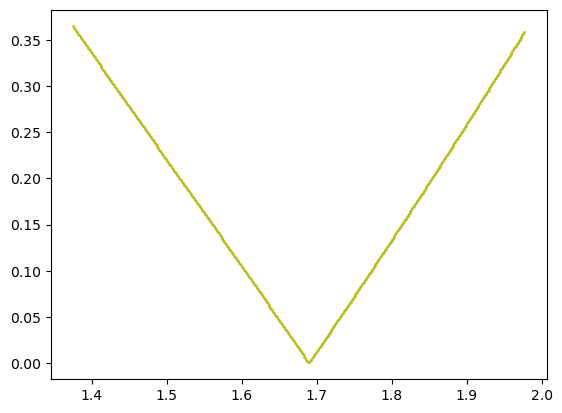

4.838161644991487


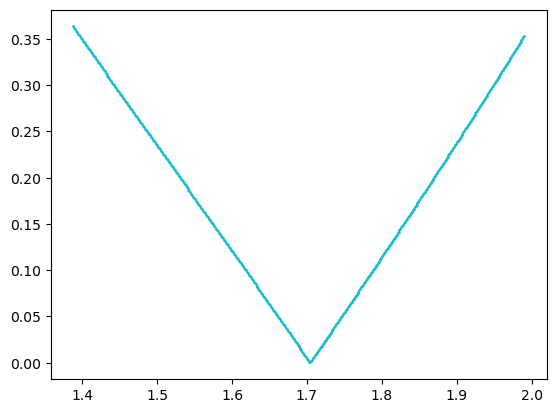

4.996908740984509


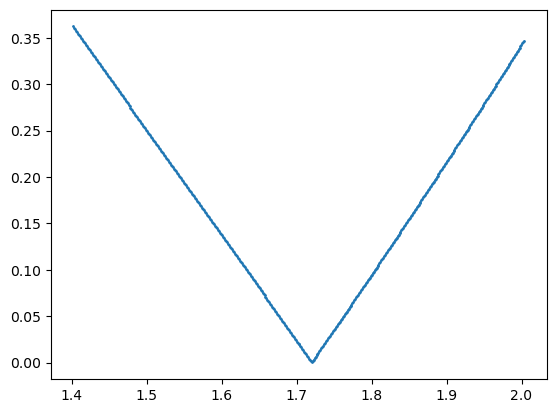

5.1461545579950325


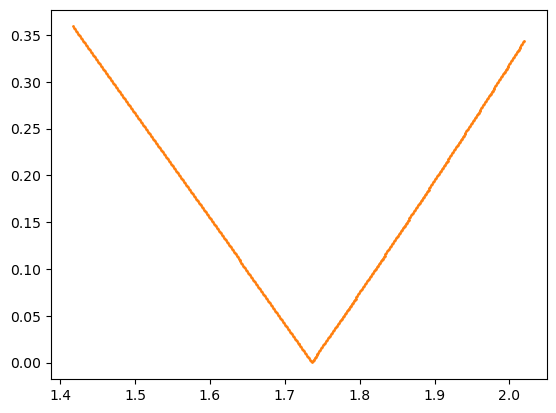

5.294601583998883


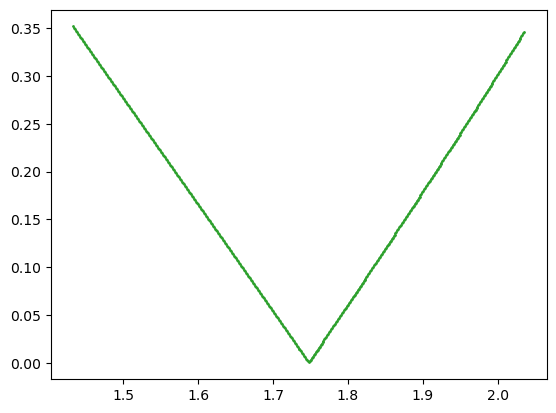

5.4330108760041185


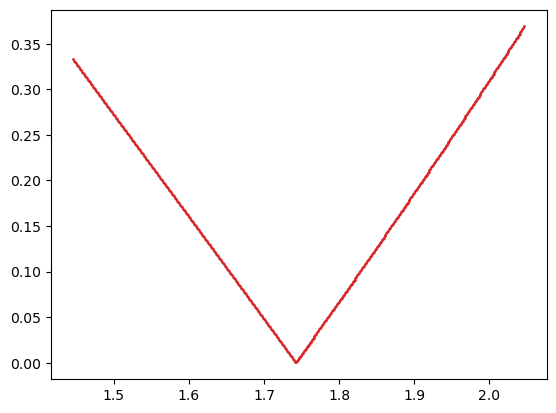

5.5730069739802275


In [157]:
imp.reload(viscid)
start=timeit.default_timer()
iadssweep=[]
ifreqsweep=[]
ivssweep=[]
iwssweep=[]
idirsweep=[]
idssweep=[]
argsdict['verbose']=0
ds=2E-3
argsdict['lambdamax']=0.5
argsdict['dsmax']=ds
argsdict['ds']=ds
argsdict['dsmin']=1E-6
argsdict['epsl']=1E-6
argsdict['epsu']=1E-6
argsdict['epstp']=np.inf
argsdict['epdir']=1E-2
argsdict['Nsteps']=500
overwrite=False
load=True

ks=np.concatenate([np.transpose([kxs1[-4:],kys1[-4:]]),np.transpose([kxs2[::4],kys2[::4]])])
# argsdict['verbose']=1
# ks=ks[:1]
print(ks)
print(len(ks))

l=0
for j in range(2):
    freq0=freq0s[j]
   
    argsdict['freq']=freq0
    argsdict['kx']=ks[0][0]
    argsdict['ky']=ks[0][1]
    
    ads,vs,ws=viscid.rayleigh_mat(ad0s[j], vn0s[j], wn0s[j], mat, argsdict, mat2)
    ad0=ads[-1]
    vs0=vs[-1]
    ws0=ws[-1]

    for i in range(len(ks)):
        if not os.path.exists('data/bandgap/%iads.npy'%(l)) or not load:

            kx=ks[i][0]
            ky=ks[i][1]
            print(i,freq0,kx,ky)
    
            argsdict['freq']=freq0
            if(argsdict['kx']!=kx):
                argsdict['par']='kx'
                argsdict['pari']=np.min([kx,argsdict['kx']])
                argsdict['parf']=np.max([kx,argsdict['kx']])
                argsdict['ds']=np.sign(kx-argsdict['kx'])*1E-3
                ads1,vs1,ws1,pars1,dirs1,dss1=viscid.pseudocont(ad0, vs0, ws0, mat, argsdict, mat2)
                argsdict['kx']=kx
                ads1,vs1,ws1=viscid.rayleigh_mat(ads1[-1], vs1[-1], ws1[-1], mat, argsdict, mat2)
                ad0=ads1[-1]
                vs0=vs1[-1]
                ws0=ws1[-1]
            if(argsdict['ky']!=ky):
                argsdict['par']='ky'
                argsdict['pari']=np.min([ky,argsdict['ky']])
                argsdict['parf']=np.max([ky,argsdict['ky']])
                argsdict['ds']=np.sign(ky-argsdict['ky'])*1E-3
                ads1,vs1,ws1,pars1,dirs1,dss1=viscid.pseudocont(ad0, vs0, ws0, mat, argsdict, mat2)
                argsdict['ky']=ky
                ads1,vs1,ws1=viscid.rayleigh_mat(ads1[-1], vs1[-1], ws1[-1], mat, argsdict, mat2)
                ad0=ads1[-1]
                vs0=vs1[-1]
                ws0=ws1[-1]
    
            argsdict['freq']=freq0
            argsdict['par']='freq'
            argsdict['pari']=freq0-0.3
            argsdict['parf']=freq0+0.3
            argsdict['ds']=ds
            ads2,vs2,ws2,pars2,dirs2,dss2=viscid.pseudocont(ad0, vs0, ws0, mat, argsdict, mat2, mat3)
            argsdict['freq']=freq0
            argsdict['ds']=-ds
            ads3,vs3,ws3,pars3,dirs3,dss3=viscid.pseudocont(ad0, vs0, ws0, mat, argsdict, mat2, mat3)
    
            ifreqsweep=ifreqsweep+[np.flip(pars3).tolist()+pars2]
            iadssweep=iadssweep+[np.flip(ads3).tolist()+ads2]
            ivssweep=ivssweep+[np.flip(vs3,axis=0).tolist()+vs2]
            iwssweep=iwssweep+[np.flip(ws3,axis=0).tolist()+ws2]
            idirsweep=idirsweep+[np.flip(dirs3,axis=0).tolist()+dirs2]
            idssweep=idssweep+[np.flip(dss3,axis=0).tolist()+dss2]
    
            ind=np.argmin(np.abs(iadssweep[-1]))
            ad0=iadssweep[-1][ind]
            vs0=np.array(ivssweep[-1][ind])
            ws0=np.array(iwssweep[-1][ind])
            freq0=ifreqsweep[-1][ind]
            print(ifreqsweep[-1][0],ifreqsweep[-1][-1],freq0,ad0)

            if overwrite:
                np.save('data/bandgap/i%iads.npy'%(l),iadssweep[l])
                np.save('data/bandgap/i%ivs.npy'%(l),ivssweep[l])
                np.save('data/bandgap/i%iws.npy'%(l),iwssweep[l])
                np.save('data/bandgap/i%ifreqs.npy'%(l),ifreqsweep[l])
                np.save('data/bandgap/i%idirs.npy'%(l),idirsweep[l])
                np.save('data/bandgap/i%idss.npy'%(l),idssweep[l])
        else:
            iadssweep=iadssweep+[np.load('data/bandgap/i%iads.npy'%(l))]
            ivssweep=ivssweep+[np.load('data/bandgap/i%ivs.npy'%(l))]
            iwssweep=iwssweep+[np.load('data/bandgap/i%iws.npy'%(l))]
            ifreqsweep=ifreqsweep+[np.load('data/bandgap/i%ifreqs.npy'%(l))]
            idirsweep=idirsweep+[np.load('data/bandgap/i%idirs.npy'%(l))]
            idssweep=idssweep+[np.load('data/bandgap/i%idss.npy'%(l))]
            
        plt.plot(ifreqsweep[l],np.abs(np.real(iadssweep[l])),c=colors[l%len(colors)],lw=0.5)
        plt.scatter(ifreqsweep[l],np.abs(np.real(iadssweep[l])),c=colors[l%len(colors)],s=1)
        plt.show()
        l=l+1

        stop=timeit.default_timer()
        print(stop-start)

### Viscid instability boundary

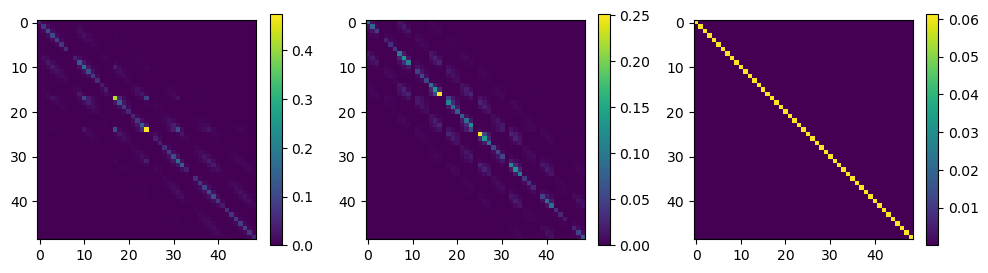

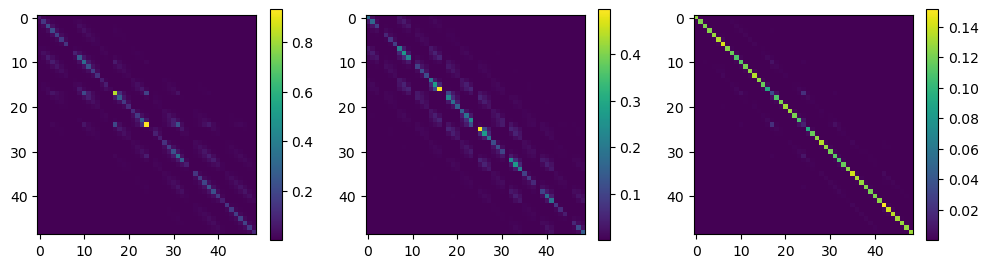

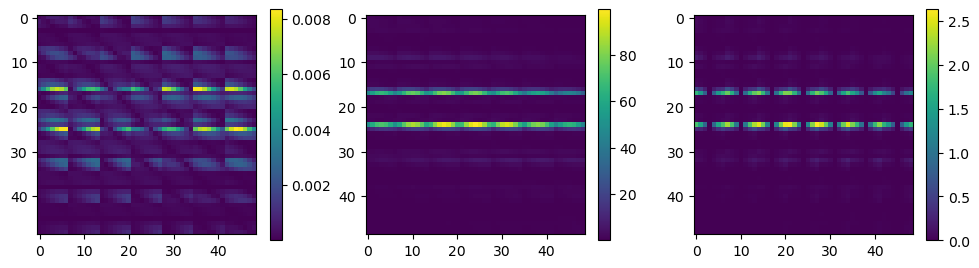

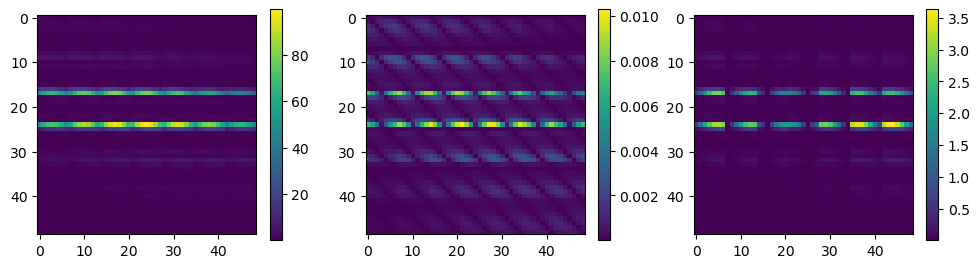

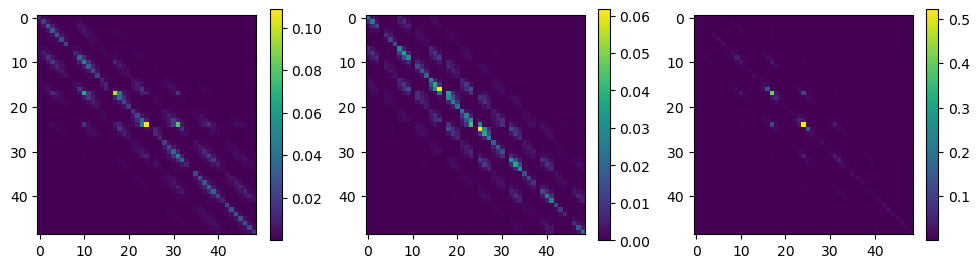

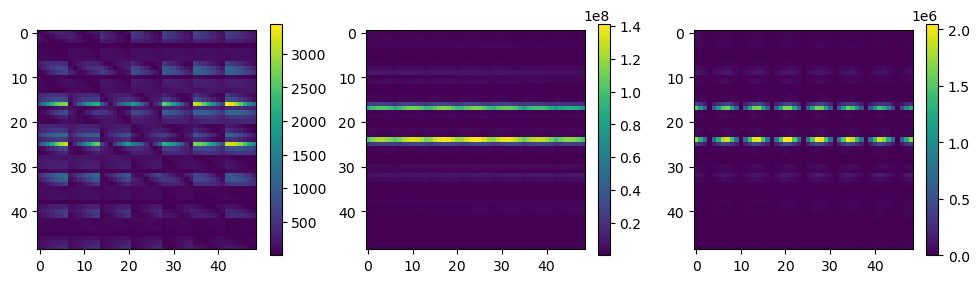

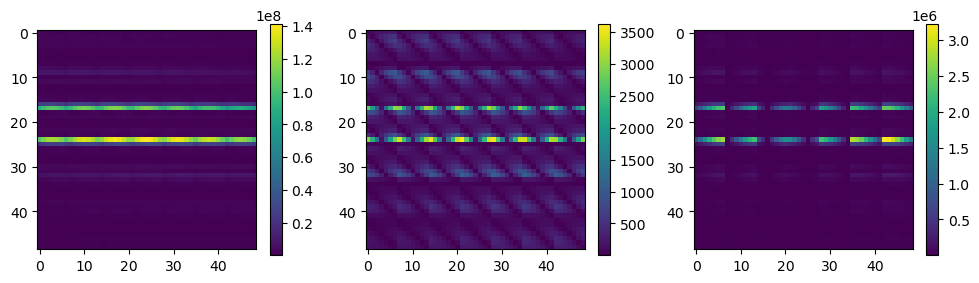

In [26]:
imp.reload(viscid)
argsdict=viscid.argsdict
k0=kxs1[-4]
argsdict['ad']=0
argsdict['h0']=1.0
argsdict['As']=0.8
argsdict['kx']=k0
argsdict['ky']=0
argsdict['Nx']=3
argsdict['Ny']=3
argsdict['Nt']=3
argsdict['dim']=2
argsdict['verbose']=1
argsdict['dsmin']=1E-4


def mat0(omega,argsdict):
        E,F=viscid.viscid_mat2d(omega,argsdict)
        shape=E.shape
        E_shaped=E.reshape((3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1))
        F_shaped=F.reshape((3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1))

        return (np.tensordot(E_shaped,argsdict['preconditioner'],axes=argsdict['precondition_axes'])-argsdict['ad']*np.tensordot(F_shaped,argsdict['preconditioner'],axes=argsdict['precondition_axes'])).transpose(argsdict['precondition_order']).reshape(shape).T
def mat3(omega,argsdict):
        E,F=viscid.viscid_mat2d(omega,argsdict)
        shape=E.shape
        E_shaped=E.reshape((3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1))
        F_shaped=F.reshape((3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1))

        return (-np.tensordot(F_shaped,argsdict['preconditioner'],axes=argsdict['precondition_axes'])).transpose(argsdict['precondition_order']).reshape(shape).T

def mat(ad,argsdict):
    E,F=viscid.viscid_mat2d(2*np.pi*argsdict['freq']/2,argsdict)
    shape=E.shape
    E_shaped=E.reshape((3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1))
    F_shaped=F.reshape((3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1))

    return (np.tensordot(E_shaped,argsdict['preconditioner'],axes=argsdict['precondition_axes'])-ad*np.tensordot(F_shaped,argsdict['preconditioner'],axes=argsdict['precondition_axes'])).transpose(argsdict['precondition_order']).reshape(shape).T
def mat2(ad,argsdict):
    E,F=viscid.viscid_mat2d(2*np.pi*argsdict['freq']/2,argsdict)
    shape=E.shape
    E_shaped=E.reshape((3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1))
    F_shaped=F.reshape((3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1))

    return (-np.tensordot(F_shaped,argsdict['preconditioner'],axes=argsdict['precondition_axes'])).transpose(argsdict['precondition_order']).reshape(shape).T

argsdict['kx']=k0
argsdict['ky']=0
ad=0.0

lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
kappax = (argsdict['kx'] + argsdict['k1x']*ms + argsdict['k2x']*ns)
kappay = (argsdict['ky'] + argsdict['k1y']*ms + argsdict['k2y']*ns)
kappa = (kappax**2+kappay**2)**0.5
kappapx = (argsdict['kx'] + argsdict['k1x']*mps + argsdict['k2x']*nps)
kappapy = (argsdict['ky'] + argsdict['k1y']*mps + argsdict['k2y']*nps)
S = (- np.exp(-kappa*argsdict['h0']) * iv(ms-mps, kappa*argsdict['As']*0.5) * iv(ns-nps, kappa*argsdict['As']*0.5) + np.exp(kappa*argsdict['h0']) * iv(ms-mps, -kappa*argsdict['As']*0.5) * iv(ns-nps, -kappa*argsdict['As']*0.5))
C = (np.exp(-kappa*argsdict['h0']) * iv(ms-mps, kappa*argsdict['As']*0.5) * iv(ns-nps, kappa*argsdict['As']*0.5) + np.exp(kappa*argsdict['h0']) * iv(ms-mps, -kappa*argsdict['As']*0.5) * iv(ns-nps, -kappa*argsdict['As']*0.5))
#right preconditioner
shape_flat=((2*argsdict['Nx']+1)*(2*argsdict['Ny']+1),(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1))
shape2=((2*argsdict['Nx']+1),(2*argsdict['Ny']+1),(2*argsdict['Nx']+1),(2*argsdict['Ny']+1))
# A2=argsdict['g']*(argsdict['rho']**2*(kappax*kappapx+kappay*kappapy)*Ctilde[:,:,:,:,:,argsdict['Nt']:argsdict['Nt']+1])
A2=argsdict['g']*(argsdict['rho']**2*(kappax*kappapx+kappay*kappapy)/kappa*S)
argsdict['preconditioner']=np.linalg.pinv(A2.reshape(shape_flat)).reshape(shape2)

argsdict['precondition_axes']=((6,7),(0,1))
argsdict['precondition_order']=(0,1,2,3,4,5,6,7)

lp=argsdict['Nt']
test=mat2(ad,argsdict).reshape((3,7,7,7,3,7,7,7))
plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(np.abs(test[2,lp,:,:,0,lp+1,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.abs(test[2,lp,:,:,1,lp+1,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(test[2,lp,:,:,2,lp+1,:,:].reshape((49,49))))
plt.colorbar()
plt.show()

lp=argsdict['Nt']
test=mat(ad,argsdict).reshape((3,7,7,7,3,7,7,7))

plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(np.abs(test[2,lp,:,:,0,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.abs(test[2,lp,:,:,1,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(test[2,lp,:,:,2,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.show()

plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(np.abs(test[1,lp,:,:,0,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.abs(test[1,lp,:,:,1,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(test[1,lp,:,:,2,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.show()

plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(np.abs(test[0,lp,:,:,0,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.abs(test[0,lp,:,:,1,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(test[0,lp,:,:,2,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.show()


lp=0
test=mat(ad,argsdict).reshape((3,7,7,7,3,7,7,7))

plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(np.abs(test[2,lp,:,:,0,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.abs(test[2,lp,:,:,1,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(test[2,lp,:,:,2,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.show()

plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(np.abs(test[1,lp,:,:,0,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.abs(test[1,lp,:,:,1,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(test[1,lp,:,:,2,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.show()

plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(np.abs(test[0,lp,:,:,0,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.abs(test[0,lp,:,:,1,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(test[0,lp,:,:,2,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.show()


In [27]:
imp.reload(viscid)
freq0s=[1.3,1.65]

F,G=viscid.inviscid_mat_undriven(argsdict)
evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
order=np.argsort(evals)

argsdict['verbose']=1
argsdict['lambdamax']=np.inf
argsdict['ds']=1E-3
argsdict['dsmax']=1E-2
argsdict['dsmin']=1E-8
argsdict['epsl']=1E-4
argsdict['epsu']=1E-3

ads01=[]
ads02=[]
ads03=[]
vs01=[]
vs02=[]
vs03=[]
ws01=[]
ws02=[]
ws03=[]
omegas01=[]
omegas02=[]
omegas03=[]

start=timeit.default_timer()
for j in range(2):
    omega=evals[order[j]]**0.5+1j*0
    E,F=viscid.viscid_mat2d(omega,argsdict)
    
    v=np.zeros((3,(2*argsdict['Nt']+1),(2*argsdict['Nx']+1),(2*argsdict['Ny']+1)),np.complex128)
    w=np.zeros((3,(2*argsdict['Nt']+1),(2*argsdict['Nx']+1),(2*argsdict['Ny']+1)),np.complex128)
    v[2,argsdict['Nt']]=revecs[:,order[j]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
    w[2,argsdict['Nt']]=levecs[:,order[j]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
    v=v.ravel()
    w=w.ravel()
    
    freq0=freq0s[j]
    omega=evals[order[j]]**0.5+1j*0
    argsdict['freq']=freq0
    argsdict['ad']=0
    
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    kappax = (argsdict['kx'] + argsdict['k1x']*ms + argsdict['k2x']*ns)
    kappay = (argsdict['ky'] + argsdict['k1y']*ms + argsdict['k2y']*ns)
    kappa = (kappax**2+kappay**2)**0.5
    kappapx = (argsdict['kx'] + argsdict['k1x']*mps + argsdict['k2x']*nps)
    kappapy = (argsdict['ky'] + argsdict['k1y']*mps + argsdict['k2y']*nps)
    S = (- np.exp(-kappa*argsdict['h0']) * iv(ms-mps, kappa*argsdict['As']*0.5) * iv(ns-nps, kappa*argsdict['As']*0.5) + np.exp(kappa*argsdict['h0']) * iv(ms-mps, -kappa*argsdict['As']*0.5) * iv(ns-nps, -kappa*argsdict['As']*0.5))
    C = (np.exp(-kappa*argsdict['h0']) * iv(ms-mps, kappa*argsdict['As']*0.5) * iv(ns-nps, kappa*argsdict['As']*0.5) + np.exp(kappa*argsdict['h0']) * iv(ms-mps, -kappa*argsdict['As']*0.5) * iv(ns-nps, -kappa*argsdict['As']*0.5))

    #right preconditioner
    shape_flat=((2*argsdict['Nx']+1)*(2*argsdict['Ny']+1),(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1))
    shape2=((2*argsdict['Nx']+1),(2*argsdict['Ny']+1),(2*argsdict['Nx']+1),(2*argsdict['Ny']+1))
    A2=argsdict['g']*(argsdict['rho']**2*(kappax*kappapx+kappay*kappapy)/kappa*S)
    argsdict['preconditioner']=np.linalg.pinv(A2.reshape(shape_flat)).reshape(shape2)

    argsdict['precondition_axes']=((6,7),(0,1))
    argsdict['precondition_order']=(0,1,2,3,4,5,6,7)


    #starting frequency and driving
    omegas,vs,ws=viscid.rayleigh_mat(omega,v,np.conjugate(w),mat0,argsdict)
    omega0=omegas[-1]
    v0=vs[-1]
    w0=ws[-1]
    argsdict['par']='ad'
    argsdict['pari']=0
    argsdict['parf']=0.2
    omegas,vs,ws,pars,dirs,dss=viscid.pseudocont(omega0,v0,w0,mat0,argsdict,mat3=mat3)
    omegas01=omegas01+[omegas]
    vs01=vs01+[vs]
    ws01=ws01+[ws]
    ads01=ads01+[pars]
    
    ind=np.argmax(pars)
    fomega=interp1d(np.arange(len(omegas)),omegas,kind='cubic')
    fv=interp1d(np.arange(len(omegas)),np.array(vs).T,kind='cubic')
    fw=interp1d(np.arange(len(omegas)),np.array(ws).T,kind='cubic')
    fpar=interp1d(np.arange(len(omegas)),pars,kind='cubic')
    fdir=interp1d(np.arange(len(omegas)),np.array(dirs).T,kind='cubic')

    if pars[ind-2]<pars[ind] and pars[ind+2]<pars[ind]:
        find=minimize_scalar(lambda x: -fpar(x),bracket=(ind-1,ind+1)).x
    else:
        find=minimize_scalar(lambda x: fpar(x),bracket=(ind-1,ind+1)).x

    omega0=complex(fomega(find))
    v0=fv(find)
    w0=fw(find)
    dir0=fdir(find)
    s=3*(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    newdir=np.zeros(dir0.shape)
    newdir[:s]=dir0[s:2*s]
    newdir[s:2*s]=-dir0[:s]
    newdir[2*s]=dir0[2*s+1]
    newdir[2*s+1]=-dir0[2*s]
    newdir[2*s+2]=2*dir0[2*s+2]
    dir0=newdir
    argsdict['ad']=fpar(find)
    print(ind,argsdict['ad'],omega0)
    omegas,vs,ws,pars,dirs,dss=viscid.pseudocont(omega0,v0,w0,mat0,argsdict,mat3=mat3,dir=dir0)
    omegas02=omegas02+[omegas]
    vs02=vs02+[vs]
    ws02=ws02+[ws]
    ads02=ads02+[pars]
    argsdict['ds']=-argsdict['ds']
    argsdict['ad']=fpar(find)
    omegas,vs,ws,pars,dirs,dss=viscid.pseudocont(omega0,v0,w0,mat0,argsdict,mat3=mat3,dir=dir0)
    argsdict['ds']=-argsdict['ds']
    omegas03=omegas03+[omegas]
    vs03=vs03+[vs]
    ws03=ws03+[ws]
    ads03=ads03+[pars]
    
stop=timeit.default_timer()
print(stop-start)

n=0 dv=4.525703e-03 dw=5.980442e-01 dl=9.133157e-05
n=1 dv=1.086476e-03 dw=4.651518e-03 dl=2.927251e-02
n=2 dv=1.899215e-04 dw=7.790359e-04 dl=9.359597e-04
n=3 dv=2.626652e-06 dw=6.687471e-06 dl=4.672271e-05
newdir=(0.000,0.000,0.989)
step=0 ds=1.000000e-03 ad=0.000000 lambda=3.979427+i0.110639 dir=(0.000, 0.000, 0.989)
pre dv=2.127e-03 dlambda=0.000e+00 dmu=9.882e-04 ad=0.000989 lr=3.979427 li=0.110639 mstp=-2.220e-16
n=0 dv=4.926e-06 dlambda=9.324e-07 dmu=4.896e-10 ad=0.000989 lr=3.979432 li=0.110639 mstp=1.084e-05
deltadir=-1.112e-05 stp=(0.005,0.000,0.989) newdir=(0.009, 0.000, 0.989)
ds=1.000e-03 ad=0.000989 lambda=3.979432+0.110639i stp=(0.005,0.000,0.989) mstp=1.084e-05
step=1 ds=1.000000e-03 ad=0.000989 lambda=3.979432+i0.110639 dir=(0.009, 0.000, 0.989)
pre dv=2.127e-03 dlambda=1.877e-06 dmu=9.872e-04 ad=0.001978 lr=3.979441 li=0.110639 mstp=-1.110e-16
n=0 dv=4.925e-06 dlambda=9.413e-07 dmu=4.477e-08 ad=0.001978 lr=3.979446 li=0.110639 mstp=1.105e-05
deltadir=-1.091e-05 stp=(0

n=0 dv=1.071e-03 dlambda=1.341e-04 dmu=6.068e-04 ad=0.082875 lr=4.020138 li=0.110648 mstp=4.444e-03
n=1 dv=5.845e-06 dlambda=2.335e-07 dmu=2.965e-07 ad=0.082875 lr=4.020139 li=0.110648 mstp=4.449e-03
deltadir=-1.103e-03 stp=(0.753,0.000,0.641) newdir=(0.782, 0.000, 0.604)
ds=1.000e-02 ad=0.082875 lambda=4.020139+0.110648i stp=(0.756,0.000,0.644) mstp=4.449e-03
step=17 ds=1.000000e-02 ad=0.082875 lambda=4.020139+i0.110648 dir=(0.753, 0.000, 0.641)
pre dv=2.097e-02 dlambda=1.497e-03 dmu=5.882e-03 ad=0.089283 lr=4.027669 li=0.110650 mstp=-2.220e-16
n=0 dv=1.075e-03 dlambda=1.208e-04 dmu=6.590e-04 ad=0.088565 lr=4.028276 li=0.110649 mstp=4.435e-03
n=1 dv=3.114e-06 dlambda=1.468e-07 dmu=2.858e-07 ad=0.088565 lr=4.028277 li=0.110649 mstp=4.437e-03
deltadir=-1.109e-03 stp=(0.810,0.000,0.567) newdir=(0.836, 0.000, 0.527)
ds=1.000e-02 ad=0.088565 lambda=4.028277+0.110649i stp=(0.814,0.000,0.569) mstp=4.437e-03
step=18 ds=1.000000e-02 ad=0.088565 lambda=4.028277+i0.110649 dir=(0.810, 0.000, 0.56

pre dv=2.019e-02 dlambda=1.555e-03 dmu=5.372e-03 ad=0.076165 lr=4.157207 li=0.110646 mstp=-1.110e-16
n=0 dv=9.689e-04 dlambda=1.068e-04 dmu=7.091e-04 ad=0.075403 lr=4.156656 li=0.110646 mstp=4.441e-03
n=1 dv=2.671e-06 dlambda=1.989e-07 dmu=7.109e-07 ad=0.075402 lr=4.156657 li=0.110646 mstp=4.440e-03
deltadir=-1.106e-03 stp=(0.744,-0.000,-0.652) newdir=(0.712, -0.000, -0.686)
ds=1.000e-02 ad=0.075402 lambda=4.156657+0.110646i stp=(0.747,-0.000,-0.654) mstp=4.440e-03
step=32 ds=1.000000e-02 ad=0.075402 lambda=4.156657+i0.110646 dir=(0.744, -0.000, -0.652)
pre dv=2.041e-02 dlambda=1.440e-03 dmu=6.095e-03 ad=0.068887 lr=4.164094 li=0.110645 mstp=-1.110e-16
n=0 dv=9.756e-04 dlambda=1.202e-04 dmu=6.624e-04 ad=0.068179 lr=4.163473 li=0.110645 mstp=4.448e-03
n=1 dv=9.205e-06 dlambda=1.533e-07 dmu=4.594e-07 ad=0.068179 lr=4.163474 li=0.110645 mstp=4.446e-03
deltadir=-1.101e-03 stp=(0.679,-0.000,-0.719) newdir=(0.644, -0.000, -0.750)
ds=1.000e-02 ad=0.068179 lambda=4.163474+0.110645i stp=(0.682,

pre dv=6.038e-03 dlambda=6.535e-04 dmu=2.689e-04 ad=0.105414 lr=4.084069 li=0.097939 mstp=-2.220e-16
n=0 dv=6.112e-05 dlambda=1.132e-06 dmu=4.640e-05 ad=0.105465 lr=4.084071 li=0.097944 mstp=1.180e-04
deltadir=-1.166e-04 stp=(-0.001,-0.983,0.103) newdir=(0.001, -0.982, 0.118)
ds=3.375e-03 ad=0.105465 lambda=4.084071+0.097944i stp=(-0.001,-0.983,0.103) mstp=1.180e-04
step=7 ds=3.375000e-03 ad=0.105465 lambda=4.084071+i0.097944 dir=(0.001, -0.982, 0.118)
pre dv=5.979e-03 dlambda=6.515e-04 dmu=3.612e-04 ad=0.105865 lr=4.084074 li=0.094631 mstp=2.220e-16
n=0 dv=6.044e-05 dlambda=1.160e-06 dmu=4.623e-05 ad=0.105916 lr=4.084072 li=0.094637 mstp=1.172e-04
deltadir=-1.107e-04 stp=(0.000,-0.980,0.133) newdir=(-0.001, -0.978, 0.148)
ds=5.063e-03 ad=0.105916 lambda=4.084072+0.094637i stp=(0.000,-0.980,0.133) mstp=1.172e-04
step=8 ds=5.062500e-03 ad=0.105916 lambda=4.084072+i0.094637 dir=(-0.001, -0.978, 0.148)
pre dv=8.859e-03 dlambda=9.736e-04 dmu=6.775e-04 ad=0.106666 lr=4.084068 li=0.089686 ms

deltadir=-1.701e-05 stp=(0.000,-0.784,0.618) newdir=(-0.000, -0.781, 0.623)
ds=1.000e-02 ad=0.172547 lambda=4.084070+-0.026295i stp=(0.000,-0.784,0.618) mstp=1.776e-05
step=23 ds=1.000000e-02 ad=0.172547 lambda=4.084070+i-0.026295 dir=(-0.000, -0.781, 0.623)
pre dv=5.460e-03 dlambda=1.536e-03 dmu=5.283e-03 ad=0.178774 lr=4.084069 li=-0.034105 mstp=0.000e+00
n=0 dv=2.053e-04 dlambda=5.925e-06 dmu=3.186e-05 ad=0.178812 lr=4.084071 li=-0.034075 mstp=1.309e-05
deltadir=-1.389e-05 stp=(0.000,-0.778,0.627) newdir=(-0.000, -0.775, 0.630)
ds=1.000e-02 ad=0.178812 lambda=4.084071+-0.034075i stp=(0.000,-0.778,0.626) mstp=1.309e-05
step=24 ds=1.000000e-02 ad=0.178812 lambda=4.084071+i-0.034075 dir=(-0.000, -0.775, 0.630)
pre dv=5.068e-03 dlambda=1.524e-03 dmu=5.320e-03 ad=0.185116 lr=4.084070 li=-0.041826 mstp=0.000e+00
n=0 dv=1.843e-04 dlambda=5.171e-06 dmu=2.685e-05 ad=0.185148 lr=4.084071 li=-0.041800 mstp=9.725e-06
deltadir=-9.889e-06 stp=(-0.000,-0.772,0.634) newdir=(-0.000, -0.770, 0.637)
d

pre dv=1.434e-02 dlambda=1.816e-03 dmu=3.252e-03 ad=0.117497 lr=4.084070 li=0.164615 mstp=0.000e+00
n=0 dv=6.501e-04 dlambda=1.919e-05 dmu=2.355e-04 ad=0.117760 lr=4.084070 li=0.164518 mstp=4.091e-04
n=1 dv=3.551e-06 dlambda=3.709e-07 dmu=1.771e-07 ad=0.117760 lr=4.084071 li=0.164519 mstp=4.078e-04
deltadir=-3.698e-04 stp=(-0.000,-0.914,-0.390) newdir=(-0.000, -0.903, -0.414)
ds=-1.000e-02 ad=0.117760 lambda=4.084071+0.164519i stp=(-0.000,-0.914,-0.390) mstp=4.078e-04
step=13 ds=-1.000000e-02 ad=0.117760 lambda=4.084071+i0.164519 dir=(-0.000, -0.903, -0.414)
pre dv=1.313e-02 dlambda=1.776e-03 dmu=3.691e-03 ad=0.121902 lr=4.084072 li=0.173554 mstp=0.000e+00
n=0 dv=6.198e-04 dlambda=1.829e-05 dmu=1.922e-04 ad=0.122117 lr=4.084071 li=0.173461 mstp=2.895e-04
n=1 dv=4.848e-06 dlambda=1.254e-07 dmu=1.133e-07 ad=0.122117 lr=4.084070 li=0.173461 mstp=2.887e-04
deltadir=-2.637e-04 stp=(0.000,-0.894,-0.436) newdir=(-0.001, -0.884, -0.456)
ds=-1.000e-02 ad=0.122117 lambda=4.084070+0.173461i stp=(

n=0 dv=2.955e-05 dlambda=2.244e-06 dmu=1.598e-08 ad=0.000933 lr=5.131138 li=0.085864 mstp=9.670e-05
deltadir=-9.651e-05 stp=(0.014,-0.000,0.933) newdir=(0.027, 0.000, 0.933)
ds=1.000e-03 ad=0.000933 lambda=5.131138+0.085864i stp=(0.014,-0.000,0.933) mstp=9.670e-05
step=1 ds=1.000000e-03 ad=0.000933 lambda=5.131138+i0.085864 dir=(0.027, 0.000, 0.933)
pre dv=5.205e-03 dlambda=4.484e-06 dmu=9.312e-04 ad=0.001866 lr=5.131165 li=0.085864 mstp=0.000e+00
n=0 dv=2.956e-05 dlambda=2.242e-06 dmu=4.012e-07 ad=0.001866 lr=5.131179 li=0.085864 mstp=9.667e-05
deltadir=-9.618e-05 stp=(0.041,0.000,0.932) newdir=(0.055, 0.000, 0.932)
ds=1.500e-03 ad=0.001866 lambda=5.131179+0.085864i stp=(0.041,0.000,0.933) mstp=9.667e-05
step=2 ds=1.500000e-03 ad=0.001866 lambda=5.131179+i0.085864 dir=(0.055, 0.000, 0.932)
pre dv=7.805e-03 dlambda=1.344e-05 dmu=1.393e-03 ad=0.003264 lr=5.131261 li=0.085864 mstp=0.000e+00
n=0 dv=6.637e-05 dlambda=5.019e-06 dmu=1.775e-06 ad=0.003262 lr=5.131292 li=0.085864 mstp=2.159e-0

deltadir=-2.699e-03 stp=(0.935,0.001,-0.200) newdir=(0.916, 0.000, -0.270)
ds=1.000e-02 ad=0.038133 lambda=5.202246+0.085865i stp=(0.944,0.001,-0.202) mstp=1.023e-02
step=17 ds=1.000000e-02 ad=0.038133 lambda=5.202246+i0.085865 dir=(0.935, 0.001, -0.200)
pre dv=3.594e-02 dlambda=1.504e-03 dmu=1.932e-03 ad=0.036131 lr=5.211591 li=0.085873 mstp=0.000e+00
n=0 dv=3.687e-03 dlambda=5.674e-05 dmu=1.395e-03 ad=0.034688 lr=5.211239 li=0.085865 mstp=1.143e-02
n=1 dv=6.856e-05 dlambda=2.301e-06 dmu=6.685e-06 ad=0.034681 lr=5.211253 li=0.085865 mstp=1.147e-02
deltadir=-3.173e-03 stp=(0.891,-0.000,-0.341) newdir=(0.858, -0.000, -0.413)
ds=1.000e-02 ad=0.034681 lambda=5.211253+0.085865i stp=(0.901,-0.000,-0.345) mstp=1.147e-02
step=18 ds=1.000000e-02 ad=0.034681 lambda=5.211253+i0.085865 dir=(0.891, -0.000, -0.341)
pre dv=3.841e-02 dlambda=1.432e-03 dmu=3.309e-03 ad=0.031269 lr=5.220159 li=0.085864 mstp=0.000e+00
n=0 dv=4.008e-03 dlambda=1.026e-04 dmu=1.460e-03 ad=0.029765 lr=5.219520 li=0.085864 m

deltadir=-3.263e-04 stp=(-0.000,-0.929,0.285) newdir=(-0.000, -0.923, 0.308)
ds=1.000e-02 ad=0.045146 lambda=5.183628+0.060943i stp=(-0.000,-0.929,0.285) mstp=3.524e-04
step=10 ds=1.000000e-02 ad=0.045146 lambda=5.183628+i0.060943 dir=(-0.000, -0.923, 0.308)
pre dv=2.711e-02 dlambda=1.493e-03 dmu=2.935e-03 ad=0.048222 lr=5.183628 li=0.051708 mstp=2.220e-16
n=0 dv=2.272e-03 dlambda=1.449e-05 dmu=3.775e-04 ad=0.048618 lr=5.183628 li=0.051798 mstp=1.007e-03
n=1 dv=4.464e-06 dlambda=2.824e-07 dmu=6.654e-07 ad=0.048619 lr=5.183628 li=0.051796 mstp=1.008e-03
deltadir=-8.504e-04 stp=(0.000,-0.914,0.347) newdir=(0.000, -0.904, 0.382)
ds=1.000e-02 ad=0.048619 lambda=5.183628+0.051796i stp=(0.000,-0.915,0.347) mstp=1.008e-03
step=11 ds=1.000000e-02 ad=0.048619 lambda=5.183628+i0.051796 dir=(0.000, -0.904, 0.382)
pre dv=2.291e-02 dlambda=1.461e-03 dmu=3.631e-03 ad=0.052440 lr=5.183628 li=0.042760 mstp=-2.220e-16
n=0 dv=2.029e-03 dlambda=1.411e-05 dmu=2.721e-04 ad=0.052727 lr=5.183628 li=0.042847 

n=0 dv=1.277e-04 dlambda=1.072e-06 dmu=8.226e-06 ad=0.136099 lr=5.183628 li=-0.081190 mstp=1.229e-06
deltadir=-1.101e-06 stp=(-0.000,-0.803,0.595) newdir=(-0.000, -0.803, 0.596)
ds=1.000e-02 ad=0.136099 lambda=5.183628+-0.081190i stp=(-0.000,-0.803,0.595) mstp=1.229e-06
step=27 ds=1.000000e-02 ad=0.136099 lambda=5.183628+i-0.081190 dir=(-0.000, -0.803, 0.596)
pre dv=2.795e-03 dlambda=1.298e-03 dmu=5.217e-03 ad=0.142057 lr=5.183628 li=-0.089217 mstp=1.110e-16
n=0 dv=1.108e-04 dlambda=1.034e-06 dmu=7.846e-06 ad=0.142066 lr=5.183628 li=-0.089211 mstp=1.078e-06
deltadir=-8.947e-07 stp=(0.000,-0.802,0.597) newdir=(0.000, -0.802, 0.598)
ds=1.000e-02 ad=0.142066 lambda=5.183628+-0.089211i stp=(0.000,-0.802,0.597) mstp=1.078e-06
step=28 ds=1.000000e-02 ad=0.142066 lambda=5.183628+i-0.089211 dir=(0.000, -0.802, 0.598)
pre dv=2.581e-03 dlambda=1.296e-03 dmu=5.205e-03 ad=0.148042 lr=5.183628 li=-0.097226 mstp=-2.220e-16
n=0 dv=9.857e-05 dlambda=8.549e-07 dmu=6.281e-06 ad=0.148049 lr=5.183628 li=-

pre dv=1.121e-02 dlambda=5.193e-04 dmu=4.080e-04 ad=0.041814 lr=5.183628 li=0.098155 mstp=0.000e+00
n=0 dv=2.208e-04 dlambda=9.945e-07 dmu=6.825e-05 ad=0.041885 lr=5.183628 li=0.098149 mstp=2.388e-04
deltadir=-2.320e-04 stp=(-0.000,-0.950,-0.147) newdir=(0.000, -0.947, -0.168)
ds=-3.375e-03 ad=0.041885 lambda=5.183628+0.098149i stp=(-0.000,-0.950,-0.147) mstp=2.388e-04
step=7 ds=-3.375000e-03 ad=0.041885 lambda=5.183628+i0.098149 dir=(0.000, -0.947, -0.168)
pre dv=1.090e-02 dlambda=5.170e-04 dmu=5.428e-04 ad=0.042451 lr=5.183628 li=0.101346 mstp=-2.220e-16
n=0 dv=2.387e-04 dlambda=1.231e-06 dmu=6.443e-05 ad=0.042518 lr=5.183628 li=0.101339 mstp=2.183e-04
deltadir=-2.110e-04 stp=(0.000,-0.945,-0.188) newdir=(-0.000, -0.942, -0.207)
ds=-5.063e-03 ad=0.042518 lambda=5.183628+0.101339i stp=(0.000,-0.945,-0.188) mstp=2.183e-04
step=8 ds=-5.062500e-03 ad=0.042518 lambda=5.183628+i0.101339 dir=(-0.000, -0.942, -0.207)
pre dv=1.578e-02 dlambda=7.713e-04 dmu=1.004e-03 ad=0.043566 lr=5.183628 li

n=0 dv=2.291e-04 dlambda=1.930e-06 dmu=1.589e-05 ad=0.112427 lr=5.183628 li=0.220702 mstp=4.141e-06
deltadir=-3.798e-06 stp=(-0.000,-0.810,-0.585) newdir=(-0.000, -0.809, -0.586)
ds=-1.000e-02 ad=0.112427 lambda=5.183628+0.220702i stp=(-0.000,-0.810,-0.585) mstp=4.141e-06
step=23 ds=-1.000000e-02 ad=0.112427 lambda=5.183628+i0.220702 dir=(-0.000, -0.809, -0.586)
pre dv=4.033e-03 dlambda=1.308e-03 dmu=5.244e-03 ad=0.118291 lr=5.183628 li=0.228795 mstp=1.110e-16
n=0 dv=1.966e-04 dlambda=1.586e-06 dmu=1.293e-05 ad=0.118305 lr=5.183628 li=0.228785 mstp=2.891e-06
deltadir=-2.679e-06 stp=(0.000,-0.808,-0.588) newdir=(0.000, -0.807, -0.589)
ds=-1.000e-02 ad=0.118305 lambda=5.183628+0.228785i stp=(0.000,-0.808,-0.588) mstp=2.891e-06
step=24 ds=-1.000000e-02 ad=0.118305 lambda=5.183628+i0.228785 dir=(0.000, -0.807, -0.589)
pre dv=3.653e-03 dlambda=1.305e-03 dmu=5.241e-03 ad=0.124197 lr=5.183628 li=0.236859 mstp=-1.110e-16
n=0 dv=1.662e-04 dlambda=1.455e-06 dmu=1.142e-05 ad=0.124210 lr=5.183628 

n=0 dv=4.135836e-05 dw=2.553332e-03 dl=1.620870e-03
n=1 dv=1.092440e-06 dw=1.585308e-04 dl=8.049716e-06
n=0 dv=2.236315e-06 dw=9.008661e-04 dl=8.908806e-05


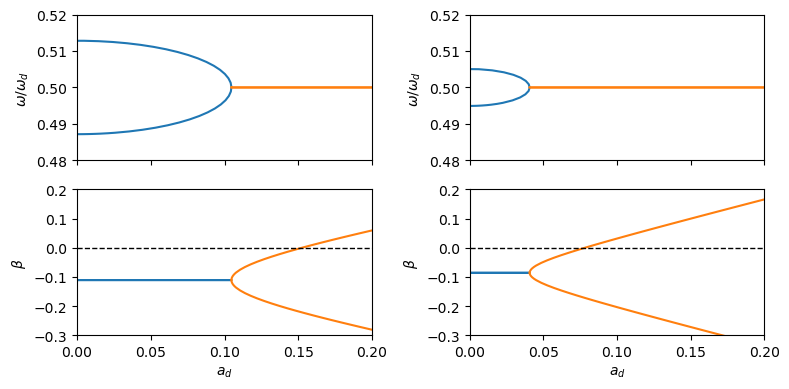

In [29]:
ad0s=[]
vn0s=[]
wn0s=[]
argsdict['epsu']=1E-3

for j in range(2):
    ind=np.argmin(np.abs(np.imag(omegas02[j])))
    argsdict['freq']=freq0s[j]
    ads,vs,ws=viscid.rayleigh_mat(ads02[j][ind],vs02[j][ind],ws02[j][ind],mat,argsdict,mat2)
    ad0s=ad0s+[ads[-1]]
    vn0s=vn0s+[vs[-1]]
    wn0s=wn0s+[ws[-1]]
    
plt.subplots(2,2,figsize=(8,4))

for j in range(2):
    plt.subplot(2,2,j+1)
    plt.plot(ads01[j],np.real(omegas01[j])/(2*np.pi*freq0s[j]),c=colors[0])
    plt.plot(ads02[j],np.real(omegas02[j])/(2*np.pi*freq0s[j]),c=colors[1])
    plt.plot(ads03[j],np.real(omegas03[j])/(2*np.pi*freq0s[j]),c=colors[1])
    plt.xlim(0,0.2)
    plt.ylim(0.48,0.52)

    plt.gca().set_xticks(plt.gca().get_xticks(),['']*len(plt.gca().get_xticks()))
    plt.ylabel(r'$\omega/\omega_d$')

    plt.subplot(2,2,j+3)
    plt.plot(ads01[j],-np.imag(omegas01[j]),c=colors[0])
    plt.plot(ads02[j],-np.imag(omegas02[j]),c=colors[1])
    plt.plot(ads03[j],-np.imag(omegas03[j]),c=colors[1])
    plt.plot([0,0.2],[0,0],ls='--',color='black',lw=1)
    plt.ylabel(r'$\beta$')
    plt.xlim(0,0.2)
    plt.ylim(-0.3,0.2)
    plt.xlabel('$a_d$')


plt.tight_layout()
plt.savefig('viscidresonance.pdf')
plt.show()


[(0.1524364313483676+7.906075844956524e-09j), (0.07819137647326445-2.6067127399959738e-08j)]


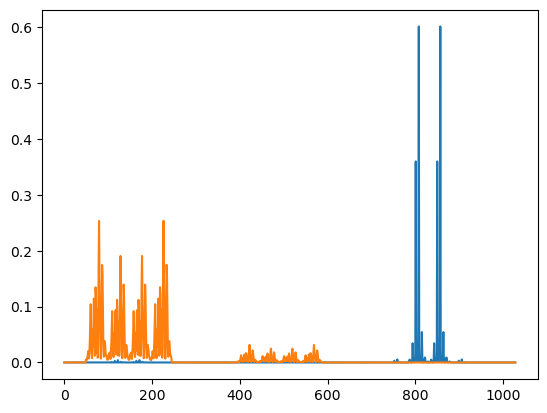

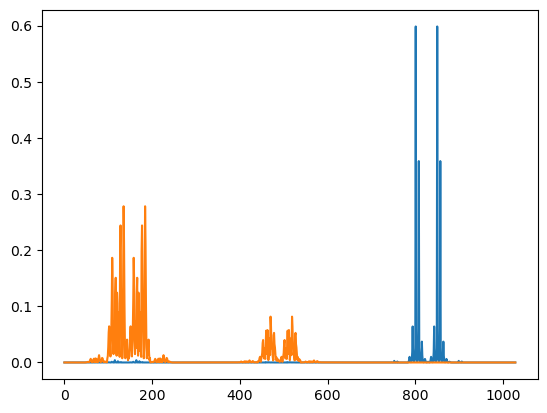

In [79]:
print(ad0s)
for j in range(2):
    plt.plot(np.abs(vn0s[j]))
    plt.plot(np.abs(wn0s[j]))
    plt.show()

[[0.14765485 0.        ]
 [0.15079645 0.        ]
 [0.15393804 0.        ]
 [0.15707963 0.        ]
 [0.15707963 0.0018138 ]
 [0.15707963 0.009069  ]
 [0.15707963 0.01632419]
 [0.15707963 0.02357939]
 [0.15707963 0.03083459]
 [0.15707963 0.03808979]
 [0.15707963 0.04534498]
 [0.15707963 0.05260018]
 [0.15707963 0.05985538]
 [0.15707963 0.06711058]
 [0.15707963 0.07436577]
 [0.15707963 0.08162097]
 [0.15707963 0.08887617]]
17
1.0997058823580064 1.5000573400744222 1.2661966296338159 (0.11003493803876661+4.303082657261413e-08j)


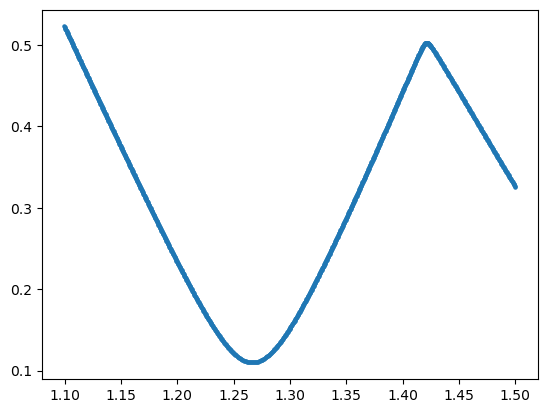

0.4357215380005073
1.1001427753988757 1.4663729452895098 1.2776277039936703 (0.1107376964775268+6.223393534312589e-08j)


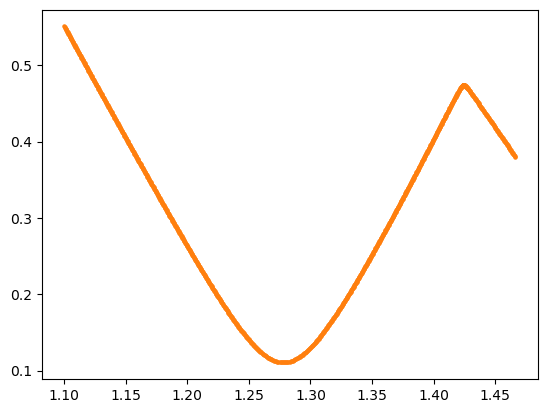

0.626845825012424
1.10658838045175 1.4779197918199747 1.2854804312922976 (0.11124635788284405-2.4174346040173406e-08j)


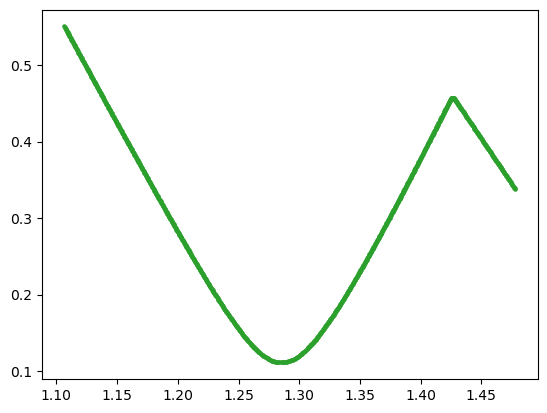

0.8132088470010785
1.1088558679638982 1.4857482687584278 1.2882212754775708 (0.11141689754428212-7.889090767884788e-08j)


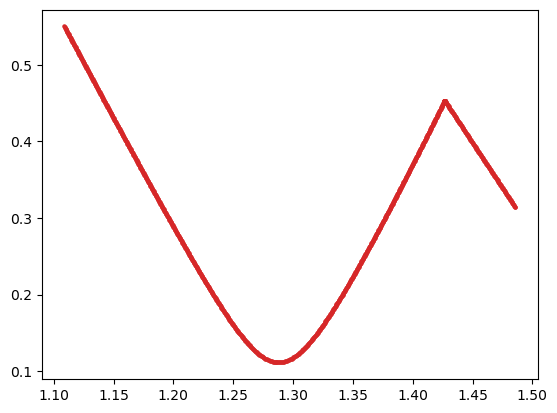

1.0118570380000165
1.1089253975632662 1.4884973127267136 1.2882212754775708 (0.11139857506551826-6.352473641928045e-08j)


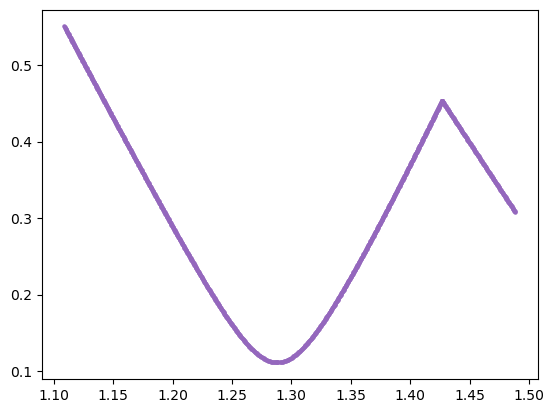

1.1812973490013974
1.1116593630582343 1.4882389960252673 1.2909523207877187 (0.11108037341056111-1.552319248458949e-09j)


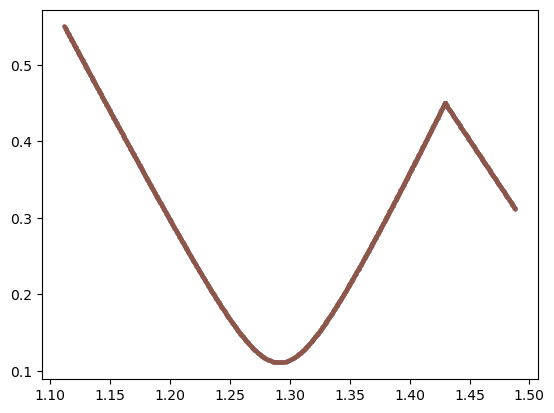

1.3582361200096784
1.1177786419248124 1.491087067223106 1.2979276825685722 (0.11036762185955173+6.630198269950807e-09j)


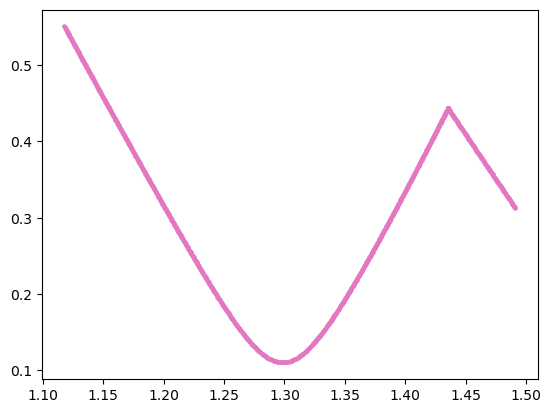

1.5374924800125882
1.127471956994937 1.4983188819094622 1.3094389796316654 (0.10926856902006873+6.792001688934819e-08j)


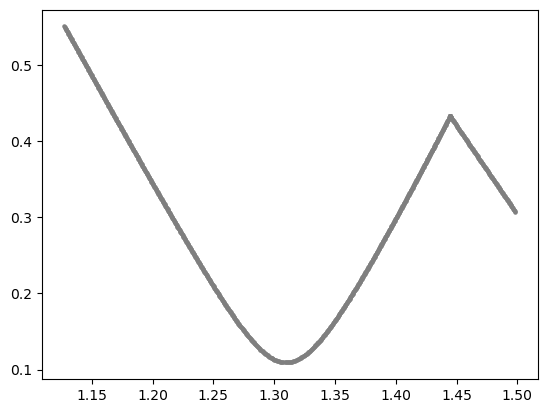

1.7083660760108614
1.1407426054624883 1.5094721661134116 1.325027232768649 (0.1078416091142049+1.7902076141390731e-07j)


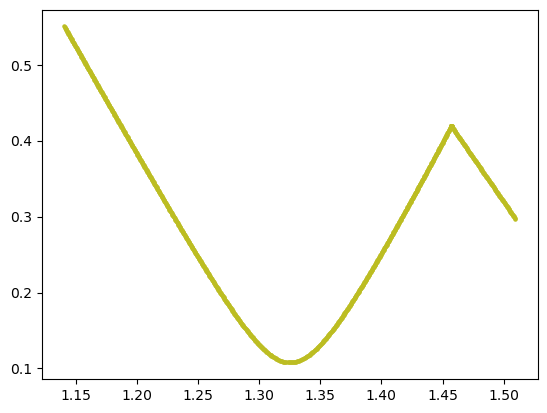

1.8802654420142062
1.1570348199224152 1.525308485888133 1.3443711951748016 (0.10615337926986511-6.066685742112274e-08j)


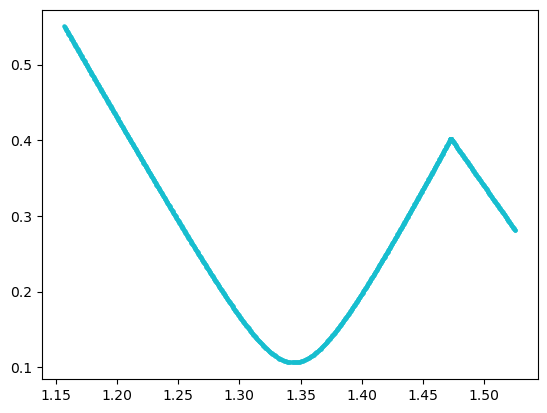

2.045597470001667
1.176557833714102 1.5447386937594532 1.3663694691996198 (0.1042693060982406+3.129516524955443e-08j)


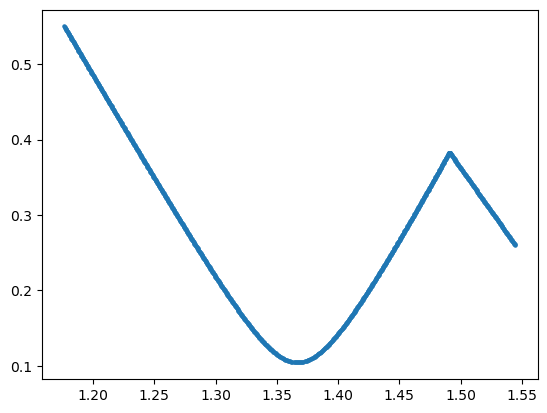

2.213318670008448
1.1984495211101729 1.5665663401497856 1.392200878258679 (0.10225844992148458+4.265603688209502e-08j)


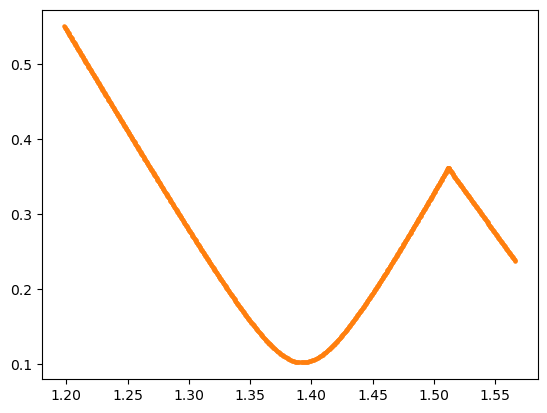

2.3840263430029154
1.2230497821012252 1.5923302644789479 1.421597436195026 (0.1002185434157339-2.4510831721811235e-09j)


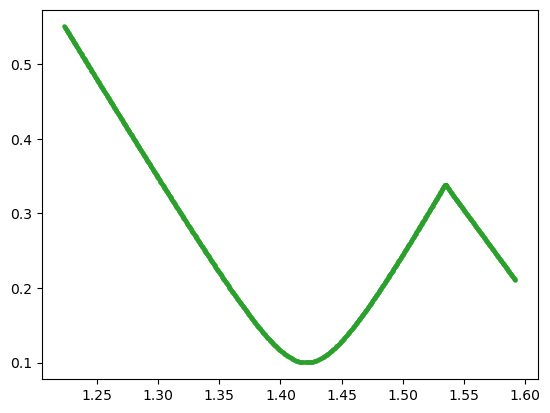

2.5528329710068647
1.2495878313071362 1.6217298495638555 1.452036465601911 (0.09824093703385472-2.054130593544911e-08j)


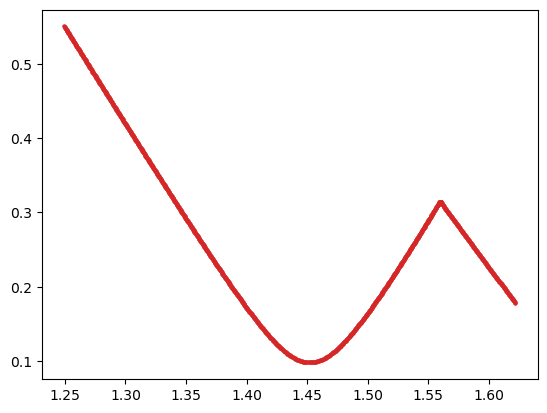

2.7192171560018323
1.2770294501466375 1.6521782253200084 1.4843024054175873 (0.09648679076661038+7.429512681767756e-08j)


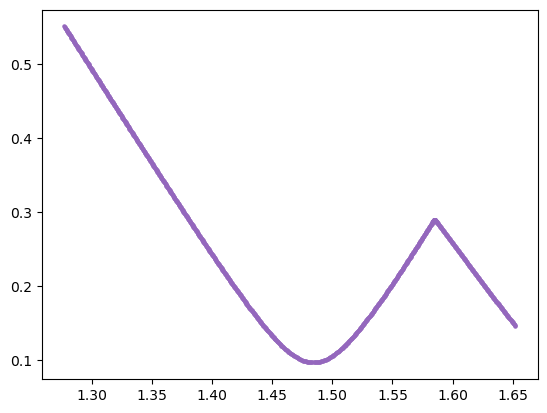

2.882475695005269
1.3041077504361294 1.6846986299776585 1.5151292394271205 (0.09513684902925701-9.208116141236689e-08j)


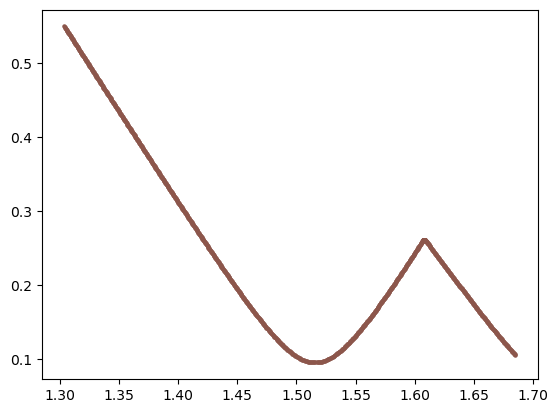

3.0590349650010467
1.3255889743514906 1.7152508399411845 1.7134798919712146 (0.0704063829662836-2.2965731425413384e-07j)


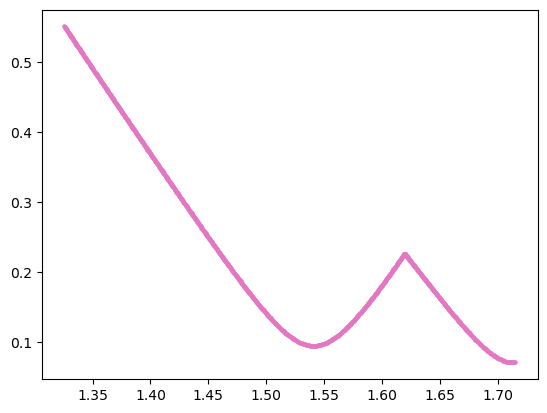

3.216234452003846
1.4499828487102928 1.849500909134536 1.633150360943432 (0.06654038002317397-6.776628251286179e-09j)


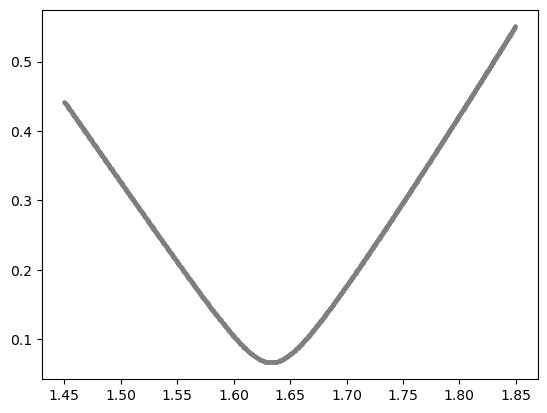

3.3939133280073293
1.4331026289180648 1.6299563725762485 1.6221871234940672 (0.06570284054699864+3.1573031814014933e-09j)


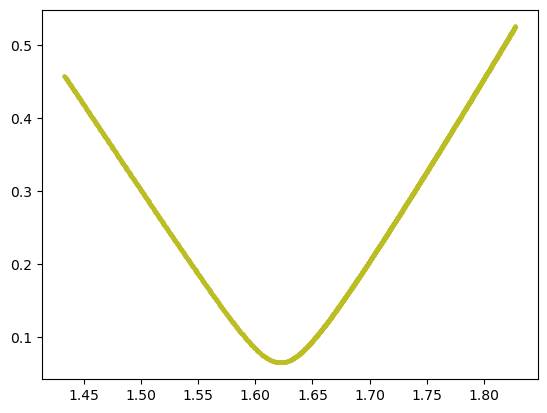

3.566053776012268
1.4219422572616895 1.8222038403079917 1.6148120716630683 (0.06511812145225482-2.7335220638907453e-08j)


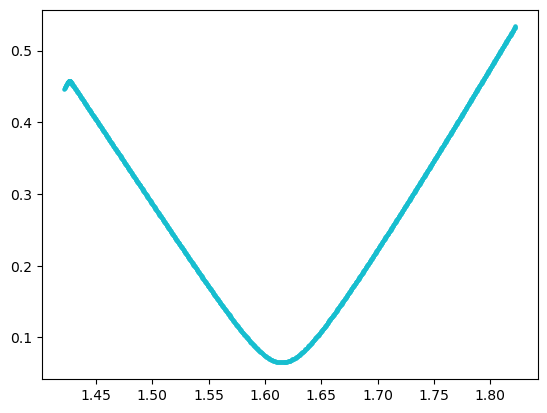

3.73769719300617
1.4146538283412091 1.8150811578755432 1.6122532221337262 (0.0649471018797907+3.160986933835205e-08j)


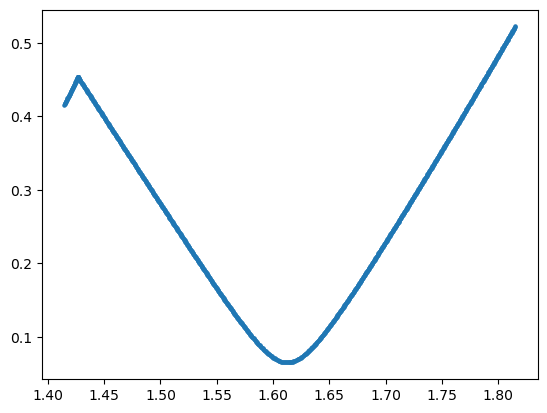

3.912156156002311
1.41217424911275 1.8122922672413215 1.6122532221337262 (0.06495069285994967+5.6615651935065585e-08j)


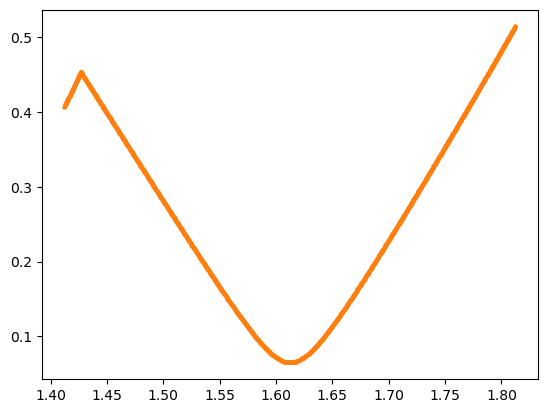

4.0878063940035645
1.4120780784256888 1.812272035625024 1.6139666203195329 (0.06502142558703992-9.195545778817522e-09j)


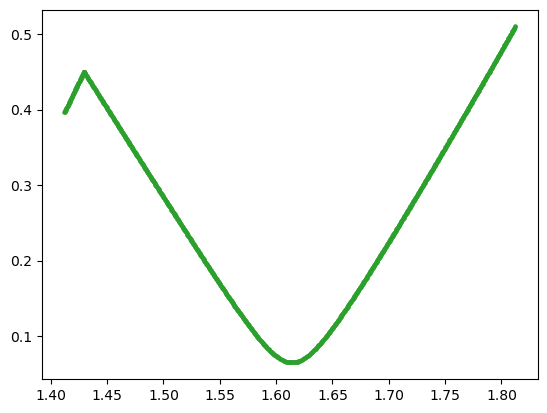

4.26697182400676
1.413959812964584 1.8140464588070184 1.6173703012415892 (0.06518078169159738-1.4510562962748933e-08j)


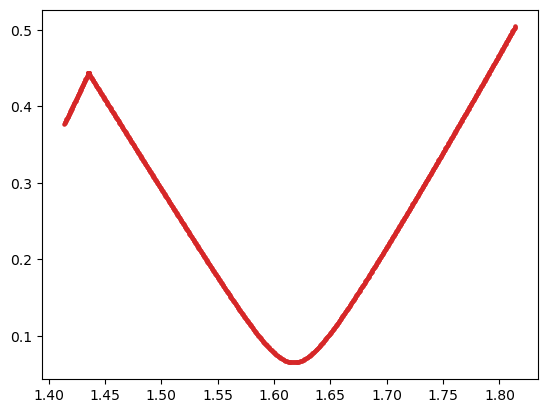

4.436281473012059
1.4173593407526432 1.8173817530550433 1.6223991824406068 (0.0654337227299168+1.8526535615345436e-08j)


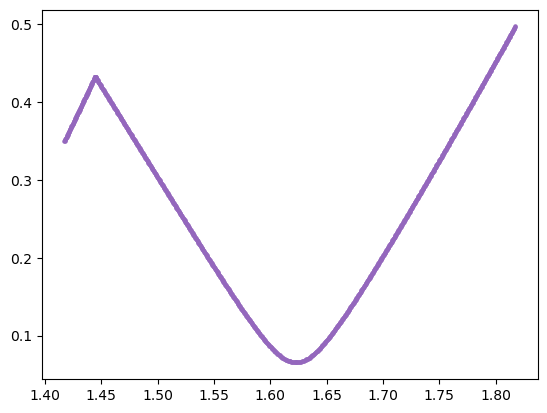

4.6134291580092395
1.4223024632935748 1.8224254109928655 1.6297864751274387 (0.06576173997637749-1.0595827566088016e-08j)


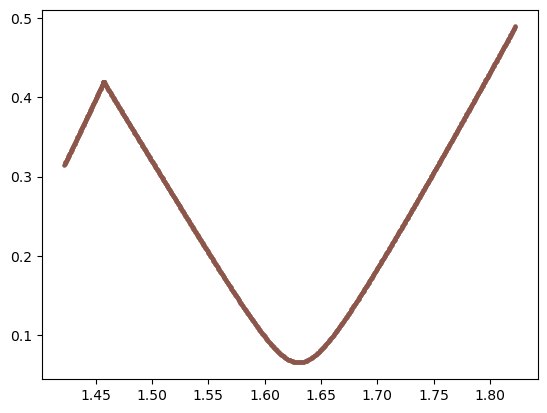

4.783785240011639
1.4297390132410948 1.8300497952584778 1.639494398429715 (0.06616035512689311-5.794885450139868e-09j)


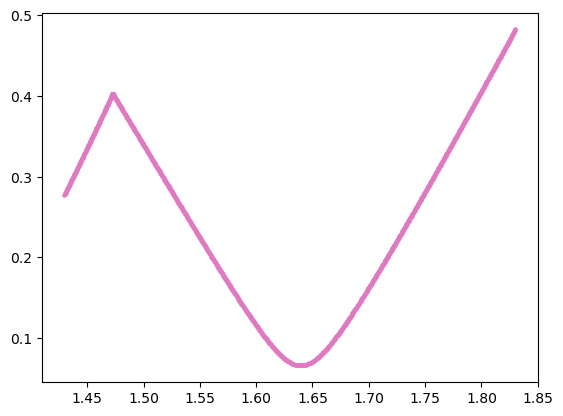

4.954133907012874
1.4394549839779827 1.8395292623416932 1.6507091416833843 (0.06663672117562736-1.1109603971249001e-07j)


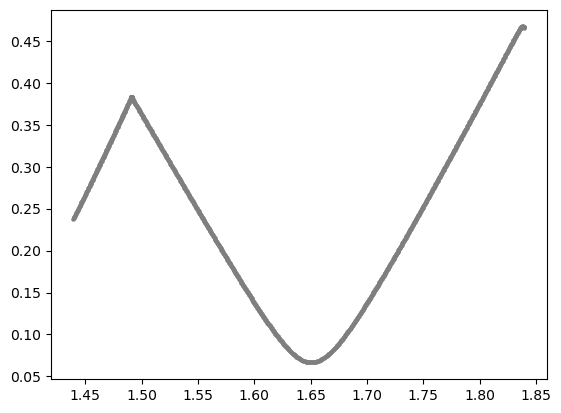

5.143278840012499
1.450464508872332 1.8510466728768937 1.6633606962239178 (0.06717174060050383-5.028752885740405e-08j)


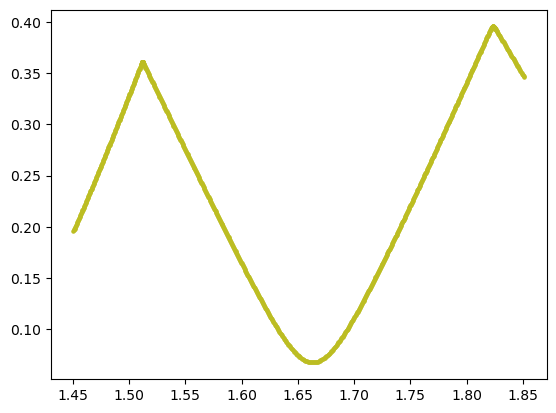

5.324525997013552
1.4633228933355449 1.8636904185697378 1.6774082664689258 (0.06776363889966167-7.064795396076282e-08j)


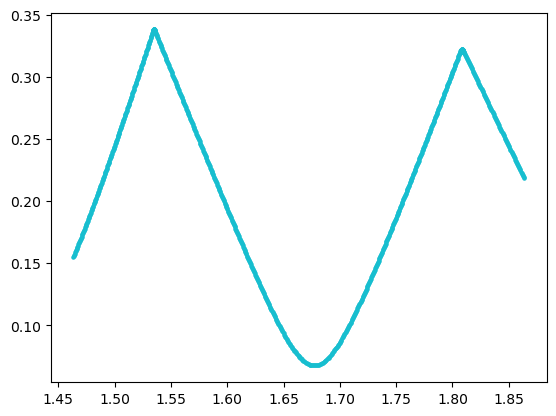

5.497183736006264
1.477232393736791 1.877774790906275 1.6929423889200352 (0.06841476873080399-4.656516800361478e-08j)


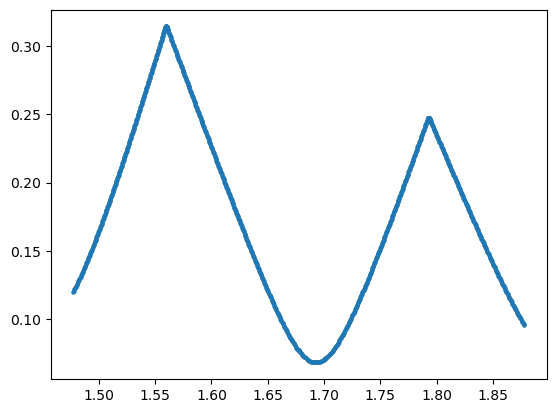

5.663658311008476
1.4929330322150969 1.893241942410192 1.707845270583199 (0.0691237043959104-8.234596209050588e-09j)


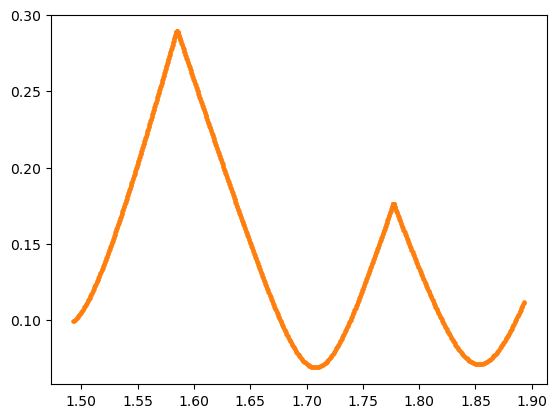

5.835093241010327
1.5075133021683793 1.9081286020859536 1.7194290965382963 (0.06992583872892916-4.652739753678737e-08j)


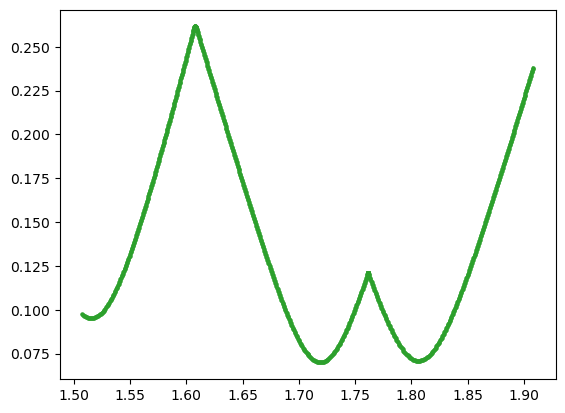

6.24489661201369
1.5191748454267215 1.9195148354460114 1.7133585933864037 (0.07040617543130893-1.2384484713841033e-07j)


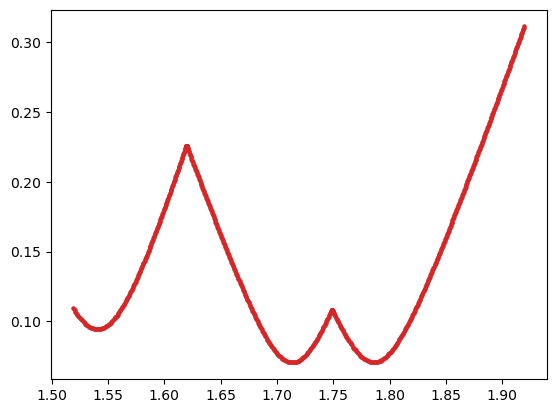

6.439967969010468


In [80]:
import os 
imp.reload(viscid)
start=timeit.default_timer()
adssweep=[]
freqsweep=[]
vssweep=[]
wssweep=[]
dirsweep=[]
dssweep=[]
argsdict['verbose']=0
argsdict['lambdamax']=0.55

# ds=1E-2
ds=1E-3
argsdict['dsmax']=ds
argsdict['ds']=ds/10
argsdict['dsmin']=1E-6

argsdict['epsu']=1E-2
argsdict['epsl']=1E-4
argsdict['dmu_fd']=1E-2
# argsdict['epstp']=1E0
# argsdict['epdir']=1E-1
argsdict['epstp']=np.inf
argsdict['epdir']=np.inf
argsdict['thu']=1E-3

argsdict['itmax']=20

ks=np.concatenate([np.transpose([kxs1[-4:],kys1[-4:]]),np.transpose([kxs2[::4],kys2[::4]])])
# argsdict['verbose']=1
# ks=ks[:2]

print(ks)
print(len(ks))
overwrite=False
load=True

l=0
for j in range(2):
    ad0=ad0s[j]
    vs0=vn0s[j]
    ws0=wn0s[j]
    freq0=freq0s[j]
    
    argsdict['freq']=freq0
    argsdict['kx']=ks[0][0]
    argsdict['ky']=ks[0][1]
    
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    kappax = (argsdict['kx'] + argsdict['k1x']*ms + argsdict['k2x']*ns)
    kappay = (argsdict['ky'] + argsdict['k1y']*ms + argsdict['k2y']*ns)
    kappa = (kappax**2+kappay**2)**0.5
    kappapx = (argsdict['kx'] + argsdict['k1x']*mps + argsdict['k2x']*nps)
    kappapy = (argsdict['ky'] + argsdict['k1y']*mps + argsdict['k2y']*nps)
    S = (- np.exp(-kappa*argsdict['h0']) * iv(ms-mps, kappa*argsdict['As']*0.5) * iv(ns-nps, kappa*argsdict['As']*0.5) + np.exp(kappa*argsdict['h0']) * iv(ms-mps, -kappa*argsdict['As']*0.5) * iv(ns-nps, -kappa*argsdict['As']*0.5))
    C = (np.exp(-kappa*argsdict['h0']) * iv(ms-mps, kappa*argsdict['As']*0.5) * iv(ns-nps, kappa*argsdict['As']*0.5) + np.exp(kappa*argsdict['h0']) * iv(ms-mps, -kappa*argsdict['As']*0.5) * iv(ns-nps, -kappa*argsdict['As']*0.5))

    #right preconditioner
    shape_flat=((2*argsdict['Nx']+1)*(2*argsdict['Ny']+1),(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1))
    shape2=((2*argsdict['Nx']+1),(2*argsdict['Ny']+1),(2*argsdict['Nx']+1),(2*argsdict['Ny']+1))
    A2=argsdict['g']*(argsdict['rho']**2*(kappax*kappapx+kappay*kappapy)/kappa*S)
    argsdict['preconditioner']=np.linalg.pinv(A2.reshape(shape_flat)).reshape(shape2)

    argsdict['precondition_axes']=((6,7),(0,1))
    argsdict['precondition_order']=(0,1,2,3,4,5,6,7)

    for i in range(len(ks)):
        if not os.path.exists('data/bandgap/%iads.npy'%(l)) or not load:
            kx=ks[i][0]
            ky=ks[i][1]

            print(i,freq0,kx,ky)
            argsdict['freq']=freq0
            if(argsdict['kx']!=kx):
                argsdict['par']='kx'
                argsdict['pari']=np.min([kx,argsdict['kx']])
                argsdict['parf']=np.max([kx,argsdict['kx']])

                argsdict['ds']=np.sign(kx-argsdict['kx'])*1E-4
                ads1,vs1,ws1,pars1,dirs1,dss1=viscid.pseudocont(ad0, vs0, ws0, mat, argsdict, mat2)
                argsdict['kx']=kx
                ads1,vs1,ws1=viscid.rayleigh_mat(ads1[-1], vs1[-1], ws1[-1], mat, argsdict, mat2)
                ad0=ads1[-1]
                vs0=vs1[-1]
                ws0=ws1[-1]
            if(argsdict['ky']!=ky):
                argsdict['par']='ky'
                argsdict['pari']=np.min([ky,argsdict['ky']])
                argsdict['parf']=np.max([ky,argsdict['ky']])

                argsdict['ds']=np.sign(ky-argsdict['ky'])*1E-4
                ads1,vs1,ws1,pars1,dirs1,dss1=viscid.pseudocont(ad0, vs0, ws0, mat, argsdict, mat2)
                argsdict['ky']=ky
                ads1,vs1,ws1=viscid.rayleigh_mat(ads1[-1], vs1[-1], ws1[-1], mat, argsdict, mat2)
                ad0=ads1[-1]
                vs0=vs1[-1]
                ws0=ws1[-1]

            lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
            kappax = (argsdict['kx'] + argsdict['k1x']*ms + argsdict['k2x']*ns)
            kappay = (argsdict['ky'] + argsdict['k1y']*ms + argsdict['k2y']*ns)
            kappa = (kappax**2+kappay**2)**0.5
            kappapx = (argsdict['kx'] + argsdict['k1x']*mps + argsdict['k2x']*nps)
            kappapy = (argsdict['ky'] + argsdict['k1y']*mps + argsdict['k2y']*nps)
            S = (- np.exp(-kappa*argsdict['h0']) * iv(ms-mps, kappa*argsdict['As']*0.5) * iv(ns-nps, kappa*argsdict['As']*0.5) + np.exp(kappa*argsdict['h0']) * iv(ms-mps, -kappa*argsdict['As']*0.5) * iv(ns-nps, -kappa*argsdict['As']*0.5))
            C = (np.exp(-kappa*argsdict['h0']) * iv(ms-mps, kappa*argsdict['As']*0.5) * iv(ns-nps, kappa*argsdict['As']*0.5) + np.exp(kappa*argsdict['h0']) * iv(ms-mps, -kappa*argsdict['As']*0.5) * iv(ns-nps, -kappa*argsdict['As']*0.5))

            #right preconditioner
            shape_flat=((2*argsdict['Nx']+1)*(2*argsdict['Ny']+1),(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1))
            shape2=((2*argsdict['Nx']+1),(2*argsdict['Ny']+1),(2*argsdict['Nx']+1),(2*argsdict['Ny']+1))
            A2=argsdict['g']*(argsdict['rho']**2*(kappax*kappapx+kappay*kappapy)/kappa*S)
            argsdict['preconditioner']=np.linalg.pinv(A2.reshape(shape_flat)).reshape(shape2)

            argsdict['precondition_axes']=((6,7),(0,1))
            argsdict['precondition_order']=(0,1,2,3,4,5,6,7)

            argsdict['freq']=freq0
            argsdict['par']='freq'
            argsdict['pari']=freq0-0.2
            argsdict['parf']=freq0+0.2

            argsdict['ds']=ds
            np.random.seed(l)
            ads2,vs2,ws2,pars2,dirs2,dss2=viscid.pseudocont(ad0, vs0, ws0, mat, argsdict, mat2)
            argsdict['freq']=freq0        
            argsdict['ds']=-ds
            np.random.seed(l)
            ads3,vs3,ws3,pars3,dirs3,dss3=viscid.pseudocont(ad0, vs0, ws0, mat, argsdict, mat2) 
            

            freqsweep=freqsweep+[np.flip(pars3).tolist()+pars2]
            adssweep=adssweep+[np.flip(ads3).tolist()+ads2]
            vssweep=vssweep+[np.flip(vs3,axis=0).tolist()+vs2]
            wssweep=wssweep+[np.flip(ws3,axis=0).tolist()+ws2]
            dirsweep=dirsweep+[np.flip(dirs3,axis=0).tolist()+dirs2]
            dssweep=dssweep+[np.flip(dss3,axis=0).tolist()+dss2]
            if overwrite:
                np.save('data/bandgap/%iads.npy'%(l),adssweep[l])
                np.save('data/bandgap/%ivs.npy'%(l),vssweep[l])
                np.save('data/bandgap/%iws.npy'%(l),wssweep[l])
                np.save('data/bandgap/%ifreqs.npy'%(l),freqsweep[l])
                np.save('data/bandgap/%idirs.npy'%(l),dirsweep[l])
                np.save('data/bandgap/%idss.npy'%(l),dssweep[l])

        else:
            adssweep=adssweep+[np.load('data/bandgap/%iads.npy'%(l))]
            vssweep=vssweep+[np.load('data/bandgap/%ivs.npy'%(l))]
            wssweep=wssweep+[np.load('data/bandgap/%iws.npy'%(l))]
            freqsweep=freqsweep+[np.load('data/bandgap/%ifreqs.npy'%(l))]
            dirsweep=dirsweep+[np.load('data/bandgap/%idirs.npy'%(l))]
            dssweep=dssweep+[np.load('data/bandgap/%idss.npy'%(l))]
            
        ind=np.argmin(np.abs(adssweep[-1]))
        ad0=adssweep[-1][ind]
        vs0=np.array(vssweep[-1][ind])
        ws0=np.array(wssweep[-1][ind])
        freq0=freqsweep[-1][ind]
        print(freqsweep[-1][0],freqsweep[-1][-1],freq0,ad0)
        
        
        plt.plot(freqsweep[l],np.abs(np.real(adssweep[l])),c=colors[l%len(colors)])
        plt.scatter(freqsweep[l],np.abs(np.real(adssweep[l])),c=colors[l%len(colors)],s=5)
        plt.show() 
        
        l=l+1

        stop=timeit.default_timer()
        print(stop-start)


In [15]:
# ks=np.concatenate([np.transpose([kxs1[-4:],kys1[-4:]]),np.transpose([kxs2[::4],kys2[::4]])])

iadssweep=[np.load('data/bandgap/i%iads.npy'%(i)) for i in range(2*len(ks))]
ivssweep=[np.load('data/bandgap/i%ivs.npy'%(i)) for i in range(2*len(ks))]
iwssweep=[np.load('data/bandgap/i%iws.npy'%(i)) for i in range(2*len(ks))]
ifreqsweep=[np.load('data/bandgap/i%ifreqs.npy'%(i)) for i in range(2*len(ks))]

adssweep=[np.load('data/bandgap/%iads.npy'%(i)) for i in range(2*len(ks))]
vssweep=[np.load('data/bandgap/%ivs.npy'%(i)) for i in range(2*len(ks))]
wssweep=[np.load('data/bandgap/%iws.npy'%(i)) for i in range(2*len(ks))]
freqsweep=[np.load('data/bandgap/%ifreqs.npy'%(i)) for i in range(2*len(ks))]
dirsweep=[np.load('data/bandgap/%idirs.npy'%(i)) for i in range(2*len(ks))]

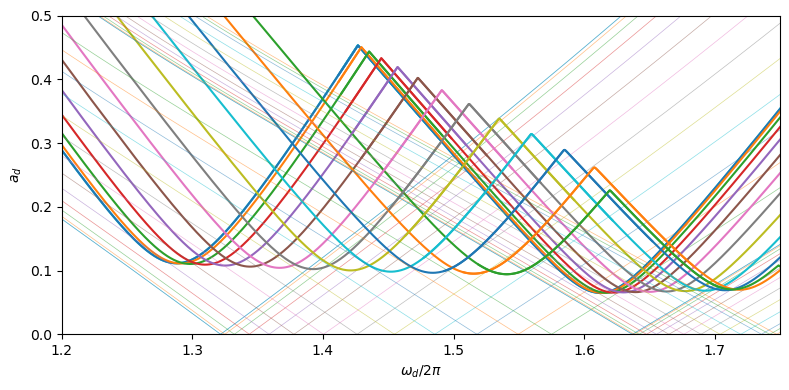

In [16]:
plt.figure(figsize=(8,4))
for i in range(3,len(ks)):
    plt.plot(freqsweep[i],np.abs(np.real(adssweep[i])),c=colors[(i-4)%len(colors)])
    plt.plot(ifreqsweep[i],np.abs(np.real(iadssweep[i])),c=colors[(i-4)%len(colors)],lw=0.5,alpha=0.5)
for i in range(3,len(ks)):
    plt.plot(freqsweep[i+len(ks)],np.abs(np.real(adssweep[i+len(ks)])),c=colors[(i-4)%len(colors)],label='$k_x=%.3f, ky=%.3f$'%(ks[i][0],ks[i][1]))
    plt.plot(ifreqsweep[i+len(ks)],np.abs(np.real(iadssweep[i+len(ks)])),c=colors[(i-4)%len(colors)],lw=0.5,alpha=0.5)

plt.xlabel(r'$\omega_d/2\pi$')
plt.ylabel(r'$a_d$')
plt.ylim(0,0.5)
plt.xlim(1.2,1.75)
# plt.legend(bbox_to_anchor=(1.1,1.1),loc='upper left')
plt.tight_layout()
plt.savefig('boundaries.pdf')

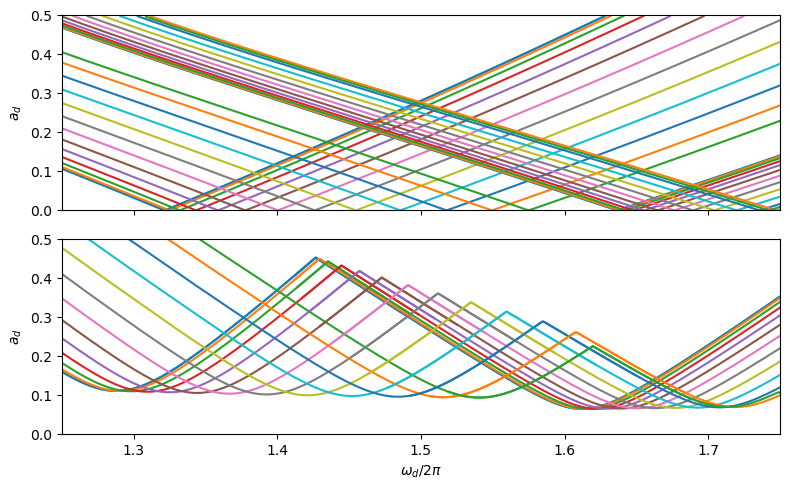

In [25]:
plt.subplots(2,1,figsize=(8,5))
for i in range(3,len(ks)):
    plt.subplot(2,1,2)
    plt.plot(freqsweep[i],np.abs(np.real(adssweep[i])),c=colors[(i-4)%len(colors)])
    plt.subplot(2,1,1)
    plt.plot(ifreqsweep[i],np.abs(np.real(iadssweep[i])),c=colors[(i-4)%len(colors)])
for i in range(3,len(ks)):
    plt.subplot(2,1,2)
    plt.plot(freqsweep[i+len(ks)],np.abs(np.real(adssweep[i+len(ks)])),c=colors[(i-4)%len(colors)],label='$k_x=%.3f, ky=%.3f$'%(ks[i][0],ks[i][1]))
    plt.subplot(2,1,1)
    plt.plot(ifreqsweep[i+len(ks)],np.abs(np.real(iadssweep[i+len(ks)])),c=colors[(i-4)%len(colors)])

plt.subplot(2,1,2)
plt.xlabel(r'$\omega_d/2\pi$')
plt.ylabel(r'$a_d$')
plt.ylim(0,0.5)
plt.xlim(1.25,1.75)
plt.subplot(2,1,1)
plt.ylim(0,0.5)
plt.xlim(1.25,1.75)
plt.ylabel(r'$a_d$')
plt.gca().set_xticks(plt.gca().get_xticks(),['']*len(plt.gca().get_xticks()))
plt.xlim(1.25,1.75)
# plt.legend(bbox_to_anchor=(1.1,1.1),loc='upper left')
plt.tight_layout()
plt.savefig('boundaries.pdf')